In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import ast
import time
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('ggplot')

# Άνοιγμα του Putin_Doc

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
putin_df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/putin.tsv", sep='\t')
putin_df

Unnamed: 0                                              Title  \
0              0  Πούτιν: "Βλέπει" Ρωσία και Λευκορωσία σε "τροχ...   
1              1  Πούτιν: Απαντά στον Τζόνσον για την "τοξική αρ...   
2              2  Ο Πούτιν απάντησε στο "τρολάρισμα" της G7 - "Θ...   
3              3  Πούτιν: Αν αναπτυχθούν υποδομές του ΝΑΤΟ σε Φι...   
4              4  Μπόρις Τζόνσον: "Αν ο Πούτιν ήταν γυναίκα δεν ...   
...          ...                                                ...   
1355        1355  Σε φυλάκιση και χρηματικό πρόστιμο καταδικάστη...   
1356        1356  Πούτιν σε Λεπέν: Δεν επιθυμούμε να επηρεάσουμε...   
1357        1357        Στις 2 Μαΐου το τετ α τετ Μέρκελ - Πούτιν     
1358        1358                    Τη Μόσχα θα επισκεφθεί η Μέρκελ   
1359        1359  Πούτιν: Θεωρούμε την Τουρκία τον σημαντικότερο...   

                 created_at  \
0     01 Ιουλίου 2022 18:56   
1     30 Ιουνίου 2022 15:33   
2     30 Ιουνίου 2022 07:30   
3     30 Ιουνίου 2022 00:09   
4     29 Ιουνίου 2022 14:03   
...                     ...   
1355  27 Μαρτίου 2017 17:56   
1356  24 Μαρτίου 2017 14:10   
1357  16 Μαρτίου 2017 17:36   
1358  15 Μαρτίου 2017 20:51   
1359  10 Μαρτίου 2017 21:30   

                                                    URL  \
0     https://www.news247.gr/kosmos/poytin-i-ensomat...   
1     https://www.news247.gr/kosmos/poytin-apanta-st...   
2     https://www.news247.gr/kosmos/o-poytin-apantis...   
3     https://www.news247.gr/kosmos/poytin-an-anapty...   
4     https://www.news247.gr/kosmos/mporis-tzonson-a...   
...                                                 ...   
1355  https://www.news247.gr/kosmos/se-fylakisi-kai-...   
1356  https://www.news247.gr/kosmos/poytin-se-lepen-...   
1357  https://www.news247.gr/kosmos/stis-2-maioy-to-...   
1358  https://www.news247.gr/kosmos/ti-moscha-tha-ep...   
1359  https://www.news247.gr/kosmos/poytin-theoroyme...   

                                                   text        About_text  \
0     Επιτάχυνση παρουσιάζουν, σύμφωνα με τον Πούτιν...             ΡΩΣΙΑ   
1     Στην επιχείρηση της Μάργκαρετ Θάτσερ στα Φώκλα...            ΠΟΥΤΙΝ   
2     "Αηδιαστικό θέαμα" χαρακτήρισε το ενδεχόμενο ν...            ΠΟΥΤΙΝ   
3     Οπως αναμενόταν,ο Βλαντίμιρ Πούτιν απείλησε αν...             ΡΩΣΙΑ   
4     Αυτή τη φράση χρησιμοποίησε ο Βρετανός πρωθυπο...    ΜΠΟΡΙΣ ΤΖΟΝΣΟΝ   
...                                                 ...               ...   
1355  Ποιος είναι ο πολιτικός ακτιβιστής που «απειλε...             ΡΩΣΙΑ   
1356  Η ανακοίνωση της συνάντησης Πούτιν - Λεπέν προ...  ΓΑΛΛΙΚΕΣ ΕΚΛΟΓΕΣ   
1357  Τη Ρωσία θα επισκεφθεί μετά από δύο χρόνια η Γ...    ΑΝΓΚΕΛΑ ΜΕΡΚΕΛ   
1358  Σύμφωνα με το Κρεμλίνο, το τετ α τετ Πούτιν - ...    ΑΝΓΚΕΛΑ ΜΕΡΚΕΛ   
1359  Πούτιν και Ερντογάν εξέφρασαν την ικανοποίησή ...             ΡΩΣΙΑ   

      Year    Month  Day   Time                 Date  
0     2022  Ιουλίου    1  18:56  2022-07-01 18:56:00  
1     2022  Ιουνίου   30  15:33  2022-06-30 15:33:00  
2     2022  Ιουνίου   30  07:30  2022-06-30 07:30:00  
3     2022  Ιουνίου   30  00:09  2022-06-30 00:09:00  
4     2022  Ιουνίου   29  14:03  2022-06-29 14:03:00  
...    ...      ...  ...    ...                  ...  
1355  2017  Μαρτίου   27  17:56  2017-03-27 17:56:00  
1356  2017  Μαρτίου   24  14:10  2017-03-24 14:10:00  
1357  2017  Μαρτίου   16  17:36  2017-03-16 17:36:00  
1358  2017  Μαρτίου   15  20:51  2017-03-15 20:51:00  
1359  2017  Μαρτίου   10  21:30  2017-03-10 21:30:00  

[1360 rows x 11 columns]

In [4]:
putin = putin_df[['Title', 'URL', 'text', 'About_text', 'created_at', 'Month', 'Day', 'Time', 'Date']]
putin

Title  \
0     Πούτιν: "Βλέπει" Ρωσία και Λευκορωσία σε "τροχ...   
1     Πούτιν: Απαντά στον Τζόνσον για την "τοξική αρ...   
2     Ο Πούτιν απάντησε στο "τρολάρισμα" της G7 - "Θ...   
3     Πούτιν: Αν αναπτυχθούν υποδομές του ΝΑΤΟ σε Φι...   
4     Μπόρις Τζόνσον: "Αν ο Πούτιν ήταν γυναίκα δεν ...   
...                                                 ...   
1355  Σε φυλάκιση και χρηματικό πρόστιμο καταδικάστη...   
1356  Πούτιν σε Λεπέν: Δεν επιθυμούμε να επηρεάσουμε...   
1357        Στις 2 Μαΐου το τετ α τετ Μέρκελ - Πούτιν     
1358                    Τη Μόσχα θα επισκεφθεί η Μέρκελ   
1359  Πούτιν: Θεωρούμε την Τουρκία τον σημαντικότερο...   

                                                    URL  \
0     https://www.news247.gr/kosmos/poytin-i-ensomat...   
1     https://www.news247.gr/kosmos/poytin-apanta-st...   
2     https://www.news247.gr/kosmos/o-poytin-apantis...   
3     https://www.news247.gr/kosmos/poytin-an-anapty...   
4     https://www.news247.gr/kosmos/mporis-tzonson-a...   
...                                                 ...   
1355  https://www.news247.gr/kosmos/se-fylakisi-kai-...   
1356  https://www.news247.gr/kosmos/poytin-se-lepen-...   
1357  https://www.news247.gr/kosmos/stis-2-maioy-to-...   
1358  https://www.news247.gr/kosmos/ti-moscha-tha-ep...   
1359  https://www.news247.gr/kosmos/poytin-theoroyme...   

                                                   text        About_text  \
0     Επιτάχυνση παρουσιάζουν, σύμφωνα με τον Πούτιν...             ΡΩΣΙΑ   
1     Στην επιχείρηση της Μάργκαρετ Θάτσερ στα Φώκλα...            ΠΟΥΤΙΝ   
2     "Αηδιαστικό θέαμα" χαρακτήρισε το ενδεχόμενο ν...            ΠΟΥΤΙΝ   
3     Οπως αναμενόταν,ο Βλαντίμιρ Πούτιν απείλησε αν...             ΡΩΣΙΑ   
4     Αυτή τη φράση χρησιμοποίησε ο Βρετανός πρωθυπο...    ΜΠΟΡΙΣ ΤΖΟΝΣΟΝ   
...                                                 ...               ...   
1355  Ποιος είναι ο πολιτικός ακτιβιστής που «απειλε...             ΡΩΣΙΑ   
1356  Η ανακοίνωση της συνάντησης Πούτιν - Λεπέν προ...  ΓΑΛΛΙΚΕΣ ΕΚΛΟΓΕΣ   
1357  Τη Ρωσία θα επισκεφθεί μετά από δύο χρόνια η Γ...    ΑΝΓΚΕΛΑ ΜΕΡΚΕΛ   
1358  Σύμφωνα με το Κρεμλίνο, το τετ α τετ Πούτιν - ...    ΑΝΓΚΕΛΑ ΜΕΡΚΕΛ   
1359  Πούτιν και Ερντογάν εξέφρασαν την ικανοποίησή ...             ΡΩΣΙΑ   

                 created_at    Month  Day   Time                 Date  
0     01 Ιουλίου 2022 18:56  Ιουλίου    1  18:56  2022-07-01 18:56:00  
1     30 Ιουνίου 2022 15:33  Ιουνίου   30  15:33  2022-06-30 15:33:00  
2     30 Ιουνίου 2022 07:30  Ιουνίου   30  07:30  2022-06-30 07:30:00  
3     30 Ιουνίου 2022 00:09  Ιουνίου   30  00:09  2022-06-30 00:09:00  
4     29 Ιουνίου 2022 14:03  Ιουνίου   29  14:03  2022-06-29 14:03:00  
...                     ...      ...  ...    ...                  ...  
1355  27 Μαρτίου 2017 17:56  Μαρτίου   27  17:56  2017-03-27 17:56:00  
1356  24 Μαρτίου 2017 14:10  Μαρτίου   24  14:10  2017-03-24 14:10:00  
1357  16 Μαρτίου 2017 17:36  Μαρτίου   16  17:36  2017-03-16 17:36:00  
1358  15 Μαρτίου 2017 20:51  Μαρτίου   15  20:51  2017-03-15 20:51:00  
1359  10 Μαρτίου 2017 21:30  Μαρτίου   10  21:30  2017-03-10 21:30:00  

[1360 rows x 9 columns]

In [5]:
#putin.dtypes

In [6]:
putin['Year'] = putin.created_at.apply(lambda dt: dt.split(' ')[2])
putin['Month'] = putin.created_at.apply(lambda dt: dt.split(' ')[1])
putin['Day'] = putin.created_at.apply(lambda dt: dt.split(' ')[0])
putin['Time'] = putin.created_at.apply(lambda dt: dt.split(' ')[3])

months = {
    'Ιανουαρίου' : '01',
    'Φεβρουαρίου' : '02', 
    'Μαρτίου' : '03',
    'Απριλίου' : '04',
    'Μαΐου' : '05',
    'Ιουνίου': '06',
    'Ιουλίου' : '07',
    'Αυγούστου' : '08',
    'Σεπτεμβρίου' : '09',
    'Οκτωβρίου' : '10',
    'Νοεμβρίου' : '11',
    'Δεκεμβρίου' : '12',
     
}

putin['Date'] = putin.apply(lambda row: f'{months[row.Month]}/{row.Day}/{row.Year} {row.Time}', axis='columns',result_type='expand')
putin['Date'] = pd.to_datetime(putin['Date'])


putin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Title  \
0     Πούτιν: "Βλέπει" Ρωσία και Λευκορωσία σε "τροχ...   
1     Πούτιν: Απαντά στον Τζόνσον για την "τοξική αρ...   
2     Ο Πούτιν απάντησε στο "τρολάρισμα" της G7 - "Θ...   
3     Πούτιν: Αν αναπτυχθούν υποδομές του ΝΑΤΟ σε Φι...   
4     Μπόρις Τζόνσον: "Αν ο Πούτιν ήταν γυναίκα δεν ...   
...                                                 ...   
1355  Σε φυλάκιση και χρηματικό πρόστιμο καταδικάστη...   
1356  Πούτιν σε Λεπέν: Δεν επιθυμούμε να επηρεάσουμε...   
1357        Στις 2 Μαΐου το τετ α τετ Μέρκελ - Πούτιν     
1358                    Τη Μόσχα θα επισκεφθεί η Μέρκελ   
1359  Πούτιν: Θεωρούμε την Τουρκία τον σημαντικότερο...   

                                                    URL  \
0     https://www.news247.gr/kosmos/poytin-i-ensomat...   
1     https://www.news247.gr/kosmos/poytin-apanta-st...   
2     https://www.news247.gr/kosmos/o-poytin-apantis...   
3     https://www.news247.gr/kosmos/poytin-an-anapty...   
4     https://www.news247.gr/kosmos/mporis-tzonson-a...   
...                                                 ...   
1355  https://www.news247.gr/kosmos/se-fylakisi-kai-...   
1356  https://www.news247.gr/kosmos/poytin-se-lepen-...   
1357  https://www.news247.gr/kosmos/stis-2-maioy-to-...   
1358  https://www.news247.gr/kosmos/ti-moscha-tha-ep...   
1359  https://www.news247.gr/kosmos/poytin-theoroyme...   

                                                   text        About_text  \
0     Επιτάχυνση παρουσιάζουν, σύμφωνα με τον Πούτιν...             ΡΩΣΙΑ   
1     Στην επιχείρηση της Μάργκαρετ Θάτσερ στα Φώκλα...            ΠΟΥΤΙΝ   
2     "Αηδιαστικό θέαμα" χαρακτήρισε το ενδεχόμενο ν...            ΠΟΥΤΙΝ   
3     Οπως αναμενόταν,ο Βλαντίμιρ Πούτιν απείλησε αν...             ΡΩΣΙΑ   
4     Αυτή τη φράση χρησιμοποίησε ο Βρετανός πρωθυπο...    ΜΠΟΡΙΣ ΤΖΟΝΣΟΝ   
...                                                 ...               ...   
1355  Ποιος είναι ο πολιτικός ακτιβιστής που «απειλε...             ΡΩΣΙΑ   
1356  Η ανακοίνωση της συνάντησης Πούτιν - Λεπέν προ...  ΓΑΛΛΙΚΕΣ ΕΚΛΟΓΕΣ   
1357  Τη Ρωσία θα επισκεφθεί μετά από δύο χρόνια η Γ...    ΑΝΓΚΕΛΑ ΜΕΡΚΕΛ   
1358  Σύμφωνα με το Κρεμλίνο, το τετ α τετ Πούτιν - ...    ΑΝΓΚΕΛΑ ΜΕΡΚΕΛ   
1359  Πούτιν και Ερντογάν εξέφρασαν την ικανοποίησή ...             ΡΩΣΙΑ   

                 created_at    Month Day   Time                Date  Year  
0     01 Ιουλίου 2022 18:56  Ιουλίου  01  18:56 2022-07-01 18:56:00  2022  
1     30 Ιουνίου 2022 15:33  Ιουνίου  30  15:33 2022-06-30 15:33:00  2022  
2     30 Ιουνίου 2022 07:30  Ιουνίου  30  07:30 2022-06-30 07:30:00  2022  
3     30 Ιουνίου 2022 00:09  Ιουνίου  30  00:09 2022-06-30 00:09:00  2022  
4     29 Ιουνίου 2022 14:03  Ιουνίου  29  14:03 2022-06-29 14:03:00  2022  
...                     ...      ...  ..    ...                 ...   ...  
1355  27 Μαρτίου 2017 17:56  Μαρτίου  27  17:56 2017-03-27 17:56:00  2017  
1356  24 Μαρτίου 2017 14:10  Μαρτίου  24  14:10 2017-03-24 14:10:00  2017  
1357  16 Μαρτίου 2017 17:36  Μαρτίου  16  17:36 2017-03-16 17:36:00  2017  
1358  15 Μαρτίου 2017 20:51  Μαρτίου  15  20:51 2017-03-15 20:51:00  2017  
1359  10 Μαρτίου 2017 21:30  Μαρτίου  10  21:30 2017-03-10 21:30:00  2017  

[1360 rows x 10 columns]

In [7]:
#putin.dtypes

In [8]:
putin = putin.rename(columns= {'About_text': 'Keywords'})
putin

Title  \
0     Πούτιν: "Βλέπει" Ρωσία και Λευκορωσία σε "τροχ...   
1     Πούτιν: Απαντά στον Τζόνσον για την "τοξική αρ...   
2     Ο Πούτιν απάντησε στο "τρολάρισμα" της G7 - "Θ...   
3     Πούτιν: Αν αναπτυχθούν υποδομές του ΝΑΤΟ σε Φι...   
4     Μπόρις Τζόνσον: "Αν ο Πούτιν ήταν γυναίκα δεν ...   
...                                                 ...   
1355  Σε φυλάκιση και χρηματικό πρόστιμο καταδικάστη...   
1356  Πούτιν σε Λεπέν: Δεν επιθυμούμε να επηρεάσουμε...   
1357        Στις 2 Μαΐου το τετ α τετ Μέρκελ - Πούτιν     
1358                    Τη Μόσχα θα επισκεφθεί η Μέρκελ   
1359  Πούτιν: Θεωρούμε την Τουρκία τον σημαντικότερο...   

                                                    URL  \
0     https://www.news247.gr/kosmos/poytin-i-ensomat...   
1     https://www.news247.gr/kosmos/poytin-apanta-st...   
2     https://www.news247.gr/kosmos/o-poytin-apantis...   
3     https://www.news247.gr/kosmos/poytin-an-anapty...   
4     https://www.news247.gr/kosmos/mporis-tzonson-a...   
...                                                 ...   
1355  https://www.news247.gr/kosmos/se-fylakisi-kai-...   
1356  https://www.news247.gr/kosmos/poytin-se-lepen-...   
1357  https://www.news247.gr/kosmos/stis-2-maioy-to-...   
1358  https://www.news247.gr/kosmos/ti-moscha-tha-ep...   
1359  https://www.news247.gr/kosmos/poytin-theoroyme...   

                                                   text          Keywords  \
0     Επιτάχυνση παρουσιάζουν, σύμφωνα με τον Πούτιν...             ΡΩΣΙΑ   
1     Στην επιχείρηση της Μάργκαρετ Θάτσερ στα Φώκλα...            ΠΟΥΤΙΝ   
2     "Αηδιαστικό θέαμα" χαρακτήρισε το ενδεχόμενο ν...            ΠΟΥΤΙΝ   
3     Οπως αναμενόταν,ο Βλαντίμιρ Πούτιν απείλησε αν...             ΡΩΣΙΑ   
4     Αυτή τη φράση χρησιμοποίησε ο Βρετανός πρωθυπο...    ΜΠΟΡΙΣ ΤΖΟΝΣΟΝ   
...                                                 ...               ...   
1355  Ποιος είναι ο πολιτικός ακτιβιστής που «απειλε...             ΡΩΣΙΑ   
1356  Η ανακοίνωση της συνάντησης Πούτιν - Λεπέν προ...  ΓΑΛΛΙΚΕΣ ΕΚΛΟΓΕΣ   
1357  Τη Ρωσία θα επισκεφθεί μετά από δύο χρόνια η Γ...    ΑΝΓΚΕΛΑ ΜΕΡΚΕΛ   
1358  Σύμφωνα με το Κρεμλίνο, το τετ α τετ Πούτιν - ...    ΑΝΓΚΕΛΑ ΜΕΡΚΕΛ   
1359  Πούτιν και Ερντογάν εξέφρασαν την ικανοποίησή ...             ΡΩΣΙΑ   

                 created_at    Month Day   Time                Date  Year  
0     01 Ιουλίου 2022 18:56  Ιουλίου  01  18:56 2022-07-01 18:56:00  2022  
1     30 Ιουνίου 2022 15:33  Ιουνίου  30  15:33 2022-06-30 15:33:00  2022  
2     30 Ιουνίου 2022 07:30  Ιουνίου  30  07:30 2022-06-30 07:30:00  2022  
3     30 Ιουνίου 2022 00:09  Ιουνίου  30  00:09 2022-06-30 00:09:00  2022  
4     29 Ιουνίου 2022 14:03  Ιουνίου  29  14:03 2022-06-29 14:03:00  2022  
...                     ...      ...  ..    ...                 ...   ...  
1355  27 Μαρτίου 2017 17:56  Μαρτίου  27  17:56 2017-03-27 17:56:00  2017  
1356  24 Μαρτίου 2017 14:10  Μαρτίου  24  14:10 2017-03-24 14:10:00  2017  
1357  16 Μαρτίου 2017 17:36  Μαρτίου  16  17:36 2017-03-16 17:36:00  2017  
1358  15 Μαρτίου 2017 20:51  Μαρτίου  15  20:51 2017-03-15 20:51:00  2017  
1359  10 Μαρτίου 2017 21:30  Μαρτίου  10  21:30 2017-03-10 21:30:00  2017  

[1360 rows x 10 columns]

In [9]:
ΠΟΛΕΜΟΣ= putin[putin['Keywords']=='ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ']
ΠΟΛΕΜΟΣ

Title  \
6    Κρεμλίνο: Θα σταματήσουμε την επίθεση όταν το ...   
9    Ουκρανία: Ζελένσκι προς Λευκορώσους - "Δεν είσ...   
10   Πούτιν: Το πρώτο του ταξίδι στο εξωτερικό μετά...   
13   G7: Προς απαγόρευση των εισαγωγών ρωσικού χρυσ...   
22   Πούτιν από Παγκόσμιο Οικονομικό Φόρουμ: "Τίποτ...   
..                                                 ...   
537  Πόλεμος στην Ουκρανία: Δεύτερο πακέτο κυρώσεων...   
539  Τζόνσον: "Ο Πούτιν επέλεξε την αιματοχυσία και...   
540  Στόλντενμπεργκ: "Ασύνετη και απρόκλητη η επίθε...   
541  Πόλεμος στην Ουκρανία: Η στιγμή που ο Πούτιν α...   
544  Πόλεμος στην Ουκρανία: Ξεκίνησε η ρωσική εισβο...   

                                                   URL  \
6    https://www.news247.gr/kosmos/kremlino-tha-sta...   
9    https://www.news247.gr/kosmos/oykrania-zelensk...   
10   https://www.news247.gr/kosmos/poytin-to-proto-...   
13   https://www.news247.gr/kosmos/g7-pros-apagorey...   
22   https://www.news247.gr/kosmos/poytin-apo-pagko...   
..                                                 ...   
537  https://www.news247.gr/kosmos/polemos-stin-oyk...   
539  https://www.news247.gr/kosmos/tzonson-o-poytin...   
540  https://www.news247.gr/kosmos/stolntenmpergk-a...   
541  https://www.news247.gr/kosmos/polemos-stin-oyk...   
544  https://www.news247.gr/kosmos/polemos-stin-oyk...   

                                                  text               Keywords  \
6    Ο εκπρόσωπος του Βλαντίμιρ Πούτιν τόνισε πως η...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
9    Κρατιέται ακόμα η Λισιτσάνσκ, παρά το σφυροκόπ...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
10   Ο Πούτιν θα επισκεφθεί το Τατζικιστάν και το Τ...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
13   Βεβαιώσεις ότι η απαγόρευση των εισαγωγών ρωσι...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
22   Επιθέσεων συνέχεια από την πλευρά Πούτιν εναντ...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
..                                                 ...                    ...   
537  Καταδικάζει την ρωσική επίθεση στην Ουκρανία η...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
539  "Απρόκλητη επίθεση" χαρακτήρισε τη ρωσική εισβ...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
540  Ο γγ του NATO Γενς Στόλτενμπεργκ καταδίκασε τη...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
541  Ο Βλαντιμίρ Πούτιν ανακοίνωσε μέσω διαγγέλματο...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
544  Με διάγγελμα Πούτιν ξεκίνησε η επίθεση της Ρωσ...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   

                    created_at        Month Day   Time                Date  \
6        28 Ιουνίου 2022 16:45      Ιουνίου  28  16:45 2022-06-28 16:45:00   
9        27 Ιουνίου 2022 07:41      Ιουνίου  27  07:41 2022-06-27 07:41:00   
10       27 Ιουνίου 2022 01:21      Ιουνίου  27  01:21 2022-06-27 01:21:00   
13       26 Ιουνίου 2022 17:33      Ιουνίου  26  17:33 2022-06-26 17:33:00   
22       17 Ιουνίου 2022 17:08      Ιουνίου  17  17:08 2022-06-17 17:08:00   
..                         ...          ...  ..    ...                 ...   
537  24 Φεβρουαρίου 2022 09:11  Φεβρουαρίου  24  09:11 2022-02-24 09:11:00   
539  24 Φεβρουαρίου 2022 08:14  Φεβρουαρίου  24  08:14 2022-02-24 08:14:00   
540  24 Φεβρουαρίου 2022 07:38  Φεβρουαρίου  24  07:38 2022-02-24 07:38:00   
541  24 Φεβρουαρίου 2022 07:29  Φεβρουαρίου  24  07:29 2022-02-24 07:29:00   
544  24 Φεβρουαρίου 2022 06:09  Φεβρουαρίου  24  06:09 2022-02-24 06:09:00   

     Year  
6    2022  
9    2022  
10   2022  
13   2022  
22   2022  
..    ...  
537  2022  
539  2022  
540  2022  
541  2022  
544  2022  

[333 rows x 10 columns]

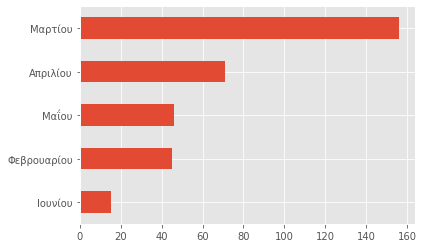

In [10]:
ΠΟΛΕΜΟΣ['Month'].value_counts().head(10).sort_values().plot(kind='barh')

In [12]:
ΟΥΚΡΑΝΙΑ= putin[putin['Keywords']=='ΟΥΚΡΑΝΙΑ']
ΟΥΚΡΑΝΙΑ

Title  \
90   Ο μακρύς πόλεμος του Πούτιν και η αγωνία για τ...   
173  Πούτιν: "Απρόβλεπτη η Ουκρανία στις συνομιλίες...   
207  Πόλεμος στην Ουκρανία: Αιματοχυσία δίχως τέλος...   
219  Ουκρανία: Ο Σίλβιο Μπερλουσκόνι δηλώνει "απογο...   
265  Wagner Group: 1000 "στρατιώτες φαντάσματα" του...   
..                                                 ...   
661  Ουκρανία - Ρωσία: Στα σύνορα μιας επικείμενης ...   
687  Οι ΗΠΑ απειλούν τη Ρωσία με κυρώσεις - Αποκλιμ...   
694    Ουκρανία: Συνομιλία Πούτιν - Μπάιντεν την Τρίτη   
695  Washington Post: Η Ρωσία προετοιμάζει επίθεση ...   
752  Ουκρανία: Οι ΗΠΑ ανακοινώνουν τη χορήγηση επιπ...   

                                                   URL  \
90   https://www.news247.gr/kosmos/o-makrys-polemos...   
173  https://www.news247.gr/kosmos/sarl-misel-ekkli...   
207  https://www.news247.gr/kosmos/polemos-stin-oyk...   
219  https://www.news247.gr/kosmos/oykrania-o-silvi...   
265  https://www.news247.gr/kosmos/wagner-group-100...   
..                                                 ...   
661  https://www.news247.gr/kosmos/oykrania-rosia-s...   
687  https://www.news247.gr/kosmos/oi-ipa-apeiloyn-...   
694  https://www.news247.gr/kosmos/oykrania-synomil...   
695  https://www.news247.gr/kosmos/washington-post-...   
752  https://www.news247.gr/kosmos/oykrania-oi-ipa-...   

                                                  text  Keywords  \
90   Ο πόλεμος δεν θα λήξει ούτε εύκολα για τον Πού...  ΟΥΚΡΑΝΙΑ   
173  Ο Πούτιν επέρριψε ευθύνες στην Ουκρανία για τι...  ΟΥΚΡΑΝΙΑ   
207  Την ώρα που οι Ρώσοι μοιάζουν αποφασισμένοι να...  ΟΥΚΡΑΝΙΑ   
219  "Απογοητευμένος" δηλώνει ο πρώην πρωθυπουργός ...  ΟΥΚΡΑΝΙΑ   
265  Η Ρωσία δείχνει να δυσκολεύεται στις στρατιωτι...  ΟΥΚΡΑΝΙΑ   
..                                                 ...       ...   
661  Οι Ουκρανοί στρατιώτες βρίσκονται παραταγμένοι...  ΟΥΚΡΑΝΙΑ   
687  Ο πρόεδρος των ΗΠΑ υπογράμμισε ότι στηρίζει τη...  ΟΥΚΡΑΝΙΑ   
694  Τηλεδιάσκεψη Πούτιν- Μπάιντεν την ερχόμενη Τρί...  ΟΥΚΡΑΝΙΑ   
695  Η Μόσχα προετοιμάζεται να εξαπολύσει 100 τάγμα...  ΟΥΚΡΑΝΙΑ   
752  Οι ΗΠΑ ανακοινώνουν τη χορήγηση επιπρόσθετης σ...  ΟΥΚΡΑΝΙΑ   

                   created_at       Month Day   Time                Date  Year  
90        11 Μαΐου 2022 14:57       Μαΐου  11  14:57 2022-05-11 14:57:00  2022  
173    22 Απριλίου 2022 15:09    Απριλίου  22  15:09 2022-04-22 15:09:00  2022  
207    12 Απριλίου 2022 22:22    Απριλίου  12  22:22 2022-04-12 22:22:00  2022  
219    09 Απριλίου 2022 23:43    Απριλίου  09  23:43 2022-04-09 23:43:00  2022  
265     29 Μαρτίου 2022 11:04     Μαρτίου  29  11:04 2022-03-29 11:04:00  2022  
..                        ...         ...  ..    ...                 ...   ...  
661  21 Ιανουαρίου 2022 15:43  Ιανουαρίου  21  15:43 2022-01-21 15:43:00  2022  
687  08 Δεκεμβρίου 2021 02:00  Δεκεμβρίου  08  02:00 2021-12-08 02:00:00  2021  
694  04 Δεκεμβρίου 2021 23:35  Δεκεμβρίου  04  23:35 2021-12-04 23:35:00  2021  
695  04 Δεκεμβρίου 2021 13:43  Δεκεμβρίου  04  13:43 2021-12-04 13:43:00  2021  
752     12 Ιουνίου 2021 15:14     Ιουνίου  12  15:14 2021-06-12 15:14:00  2021  

[76 rows x 10 columns]

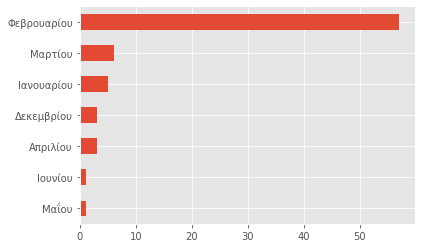

In [13]:
ΟΥΚΡΑΝΙΑ['Month'].value_counts().head(10).sort_values().plot(kind='barh')

In [14]:
putin['text'] = putin ['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


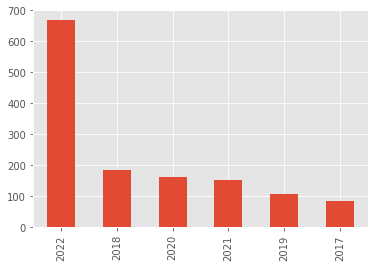

In [15]:
putin['Year'].value_counts().plot(kind='bar')

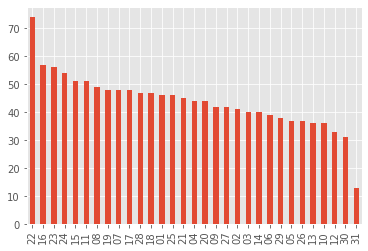

In [16]:
putin['Day'].value_counts().plot(kind='bar')

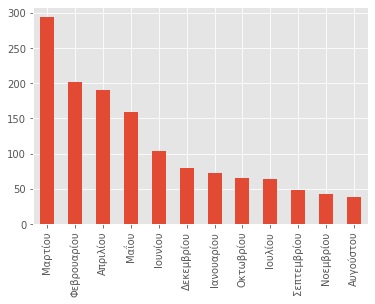

In [17]:

putin['Month'].value_counts().plot(kind='bar')


In [18]:
Keywords_data = putin.groupby(['Keywords']).count()['Title'].sort_values(ascending=False)


day_data = putin.groupby(['Day']).count()['Keywords']
(day_data,Keywords_data)

(Day
 01    46
 02    41
 03    40
 04    44
 05    37
 06    39
 07    48
 08    49
 09    42
 10    36
 11    51
 12    33
 13    36
 14    40
 15    51
 16    57
 17    48
 18    47
 19    48
 20    44
 21    45
 22    74
 23    56
 24    54
 25    46
 26    37
 27    42
 28    47
 29    38
 30    31
 31    13
 Name: Keywords, dtype: int64, Keywords
 ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ    333
 ΡΩΣΙΑ                    251
 ΠΟΥΤΙΝ                   229
 ΟΥΚΡΑΝΙΑ                  76
 ΗΠΑ                       47
                         ... 
 ΚΥΠΡΙΑΚΟ                   1
 ΚΥΠΡΟΣ                     1
 ΜΙΚΗΣ ΘΕΟΔΩΡΑΚΗΣ           1
 ΜΙΧΑΗΛ ΜΙΣΟΥΣΤΙΝ           1
 ΧΟΡΟΣ                      1
 Name: Title, Length: 103, dtype: int64)

In [19]:
Keywords_data.head(13)
keywords_data = Keywords_data.head(13)
keywords_data


Keywords
ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ    333
ΡΩΣΙΑ                    251
ΠΟΥΤΙΝ                   229
ΟΥΚΡΑΝΙΑ                  76
ΗΠΑ                       47
ΤΡΑΜΠ                     44
ΣΥΡΙΑ                     34
ΝΑΒΑΛΝΙ                   30
ΤΖΟ ΜΠΑΙΝΤΕΝ              20
ΕΡΝΤΟΓΑΝ                  18
ΚΟΡΟΝΟΪΟΣ                 18
ΤΟΥΡΚΙΑ                   17
ΦΥΣΙΚΟ ΑΕΡΙΟ              12
Name: Title, dtype: int64

In [20]:
day_data.head(31)
Day_data = day_data.head(31)
Day_data


Day
01    46
02    41
03    40
04    44
05    37
06    39
07    48
08    49
09    42
10    36
11    51
12    33
13    36
14    40
15    51
16    57
17    48
18    47
19    48
20    44
21    45
22    74
23    56
24    54
25    46
26    37
27    42
28    47
29    38
30    31
31    13
Name: Keywords, dtype: int64

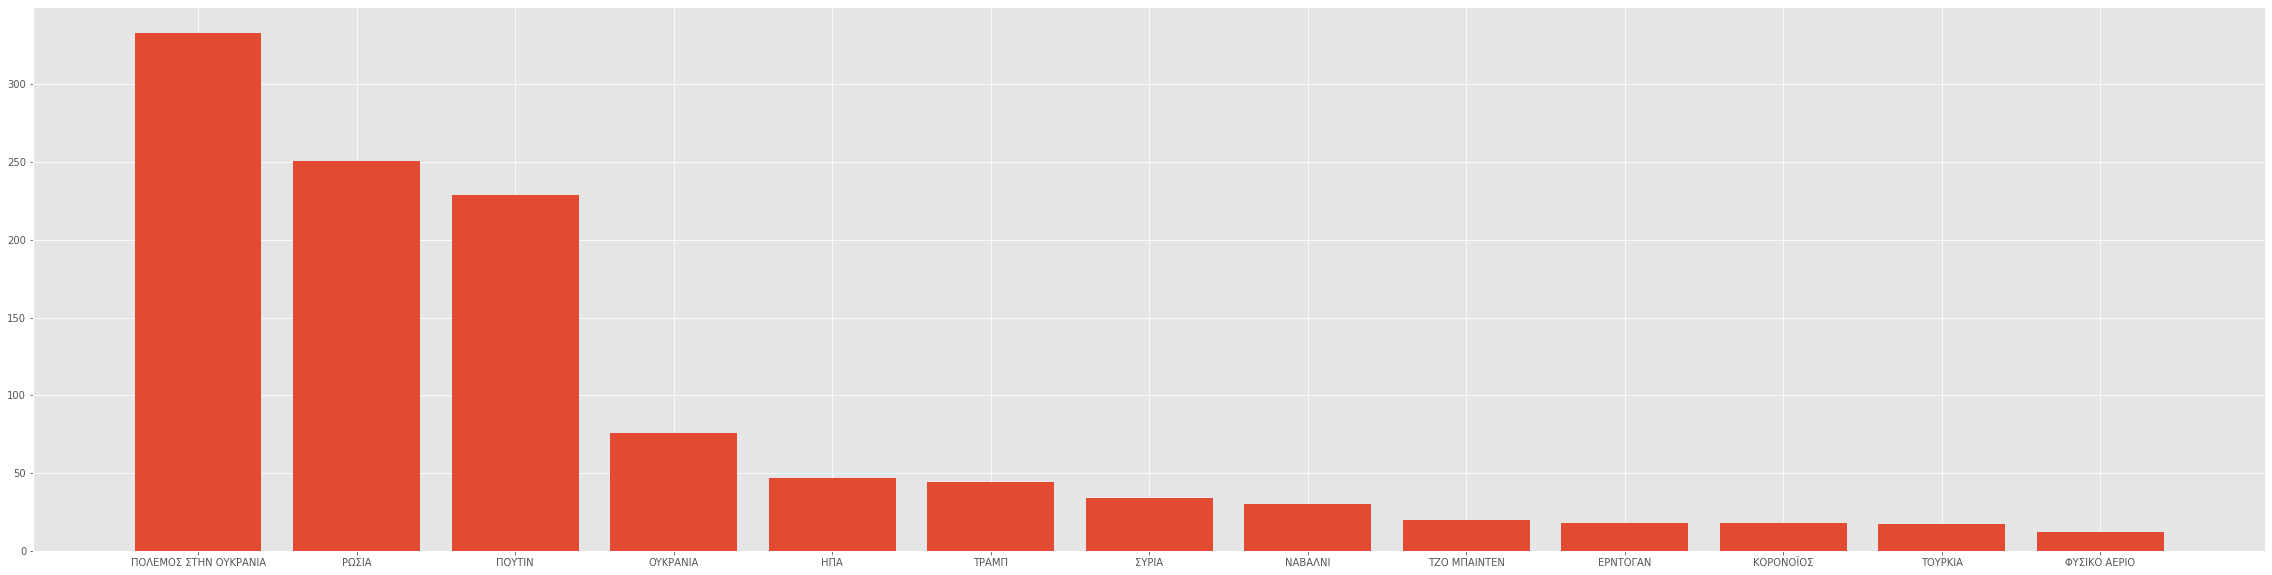

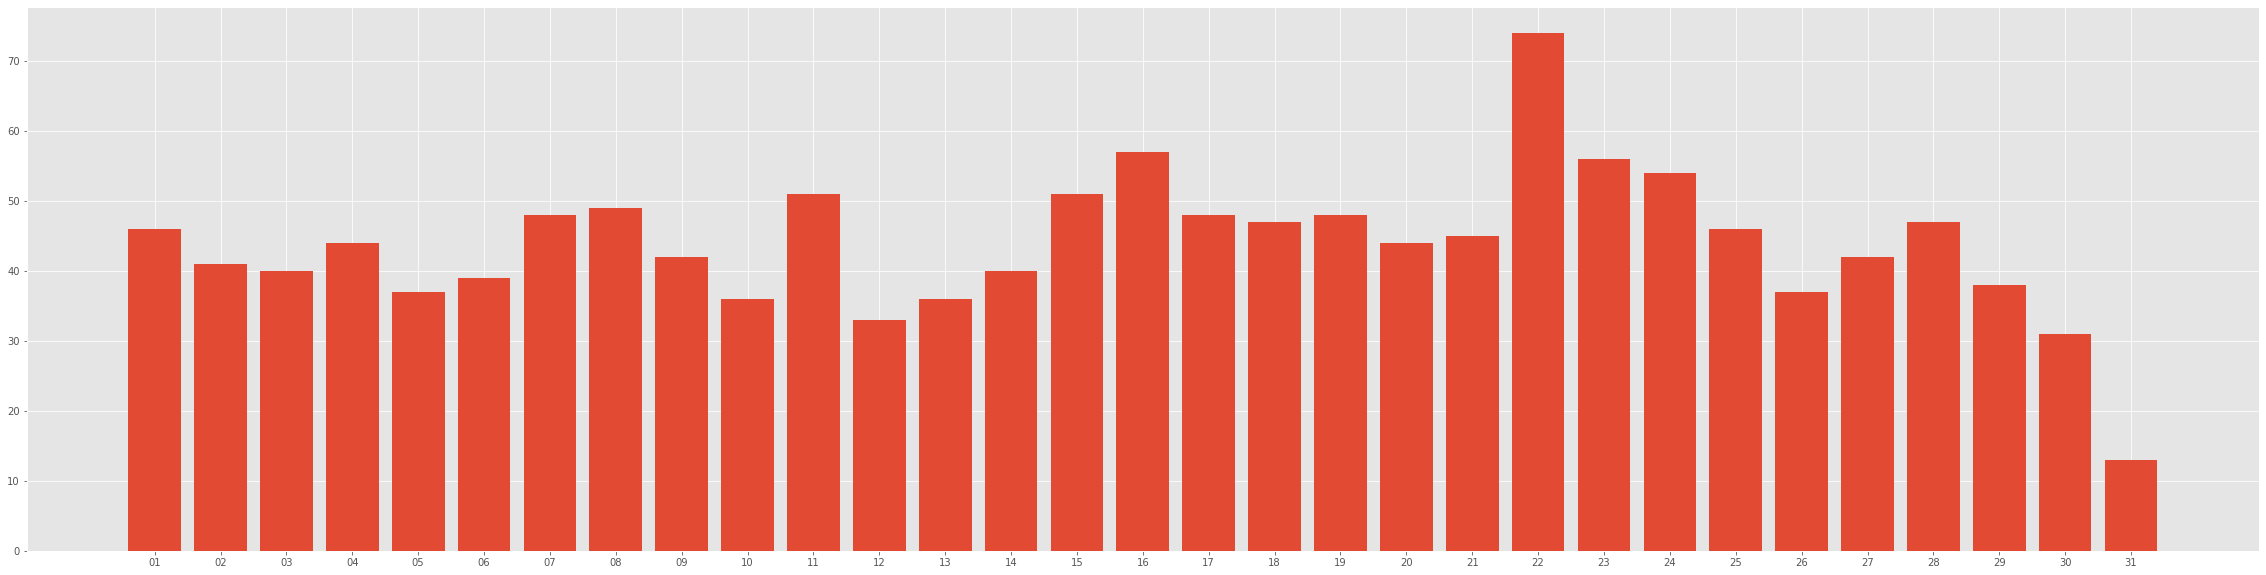

In [21]:
plt.figure(figsize=(40,10))
plt.bar(keywords_data.keys(),keywords_data,)
plt.show()

plt.figure(figsize=(40,10))
plt.bar(Day_data.keys(),Day_data,)
plt.show()

# Wordcloud Putin

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
import spacy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
!python -m spacy download el_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 7.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [24]:
nlp = spacy.load('el_core_news_sm')
list(nlp.Defaults.stop_words)[0:20]

['κάποιας',
 'πια',
 'στην',
 'εκείνοι',
 'κάμποσον',
 'τόσου',
 'κανείς',
 'ολότελα',
 'ιδίως',
 'εναντίον',
 'οποιαδήποτε',
 'πολύ',
 'πουθενά',
 'εκεί',
 'πρώτη',
 'άλλον',
 'μείον',
 'πάρα',
 'ήταν',
 'ίσως']

In [25]:
list(STOPWORDS)[0:20]

['their',
 "wouldn't",
 "weren't",
 'once',
 "mustn't",
 "there's",
 'same',
 'else',
 'ourselves',
 'other',
 'no',
 'be',
 'get',
 "isn't",
 'more',
 'cannot',
 'ever',
 'off',
 'also',
 "they'd"]

In [26]:
text = putin['text'].str.cat(sep = '.').replace('.','').strip()
text = text.replace('amp','').strip()
text = text.replace('rt','').strip()
text = text.replace('\n','').strip()
text = text.replace(':','').strip()
text

'Επιτάχυνση παρουσιάζουν, σύμφωνα με τον Πούτιν, οι διαδικασίες ενοποίησης Ρωσίας - Λευκορωσίας, οι οποίες είχαν αρχίσει το 1997 με την υπογραφή της Συνθήκης της ΈνωσηςΣτην επιχείρηση της Μάργκαρετ Θάτσερ στα Φώκλαντ αναφέρθηκε ο Βλαντιμίρ Πούτιν για να απαντήσει στα περί "μάτσο" εισβολής του Μπόρις Τζόνσον"Αηδιαστικό θέαμα" χαρακτήρισε το ενδεχόμενο να εμφανιστούν χωρίς ρούχα οι G7 ο Βλαντιμίρ Πούτιν Τους συμβούλευσε να πίνουν λιγότερο και να αθλούνται περισσότεροΟπως αναμενόταν,ο Βλαντίμιρ Πούτιν απείλησε ανοιχτά με χτύπημα αν αναπτυχθούν στρατιωτικές υποδομές του ΝΑΤΟ σε Φινλανδία και Σουηδία Αυτή τη φράση χρησιμοποίησε ο Βρετανός πρωθυπουργός για να στηρίξει το επιχείρημα πως "χρειαζόμαστε περισσότερες γυναίκες σε θέσεις εξουσίας"Το "πράσινο φως" της Τουρκίας δίνει "ισχυρή ώθηση" στην ενότητα της Δύσης, δηλώνει η Ουάσινγκτον Σε εγρήγορση η Αθήνα για απάντηση σε κάθε τουρκική αιτίασηΟ εκπρόσωπος του Βλαντίμιρ Πούτιν τόνισε πως η επίθεση θα τελειώσει όταν η Ουκρανία εφαρμόσει όλους τ

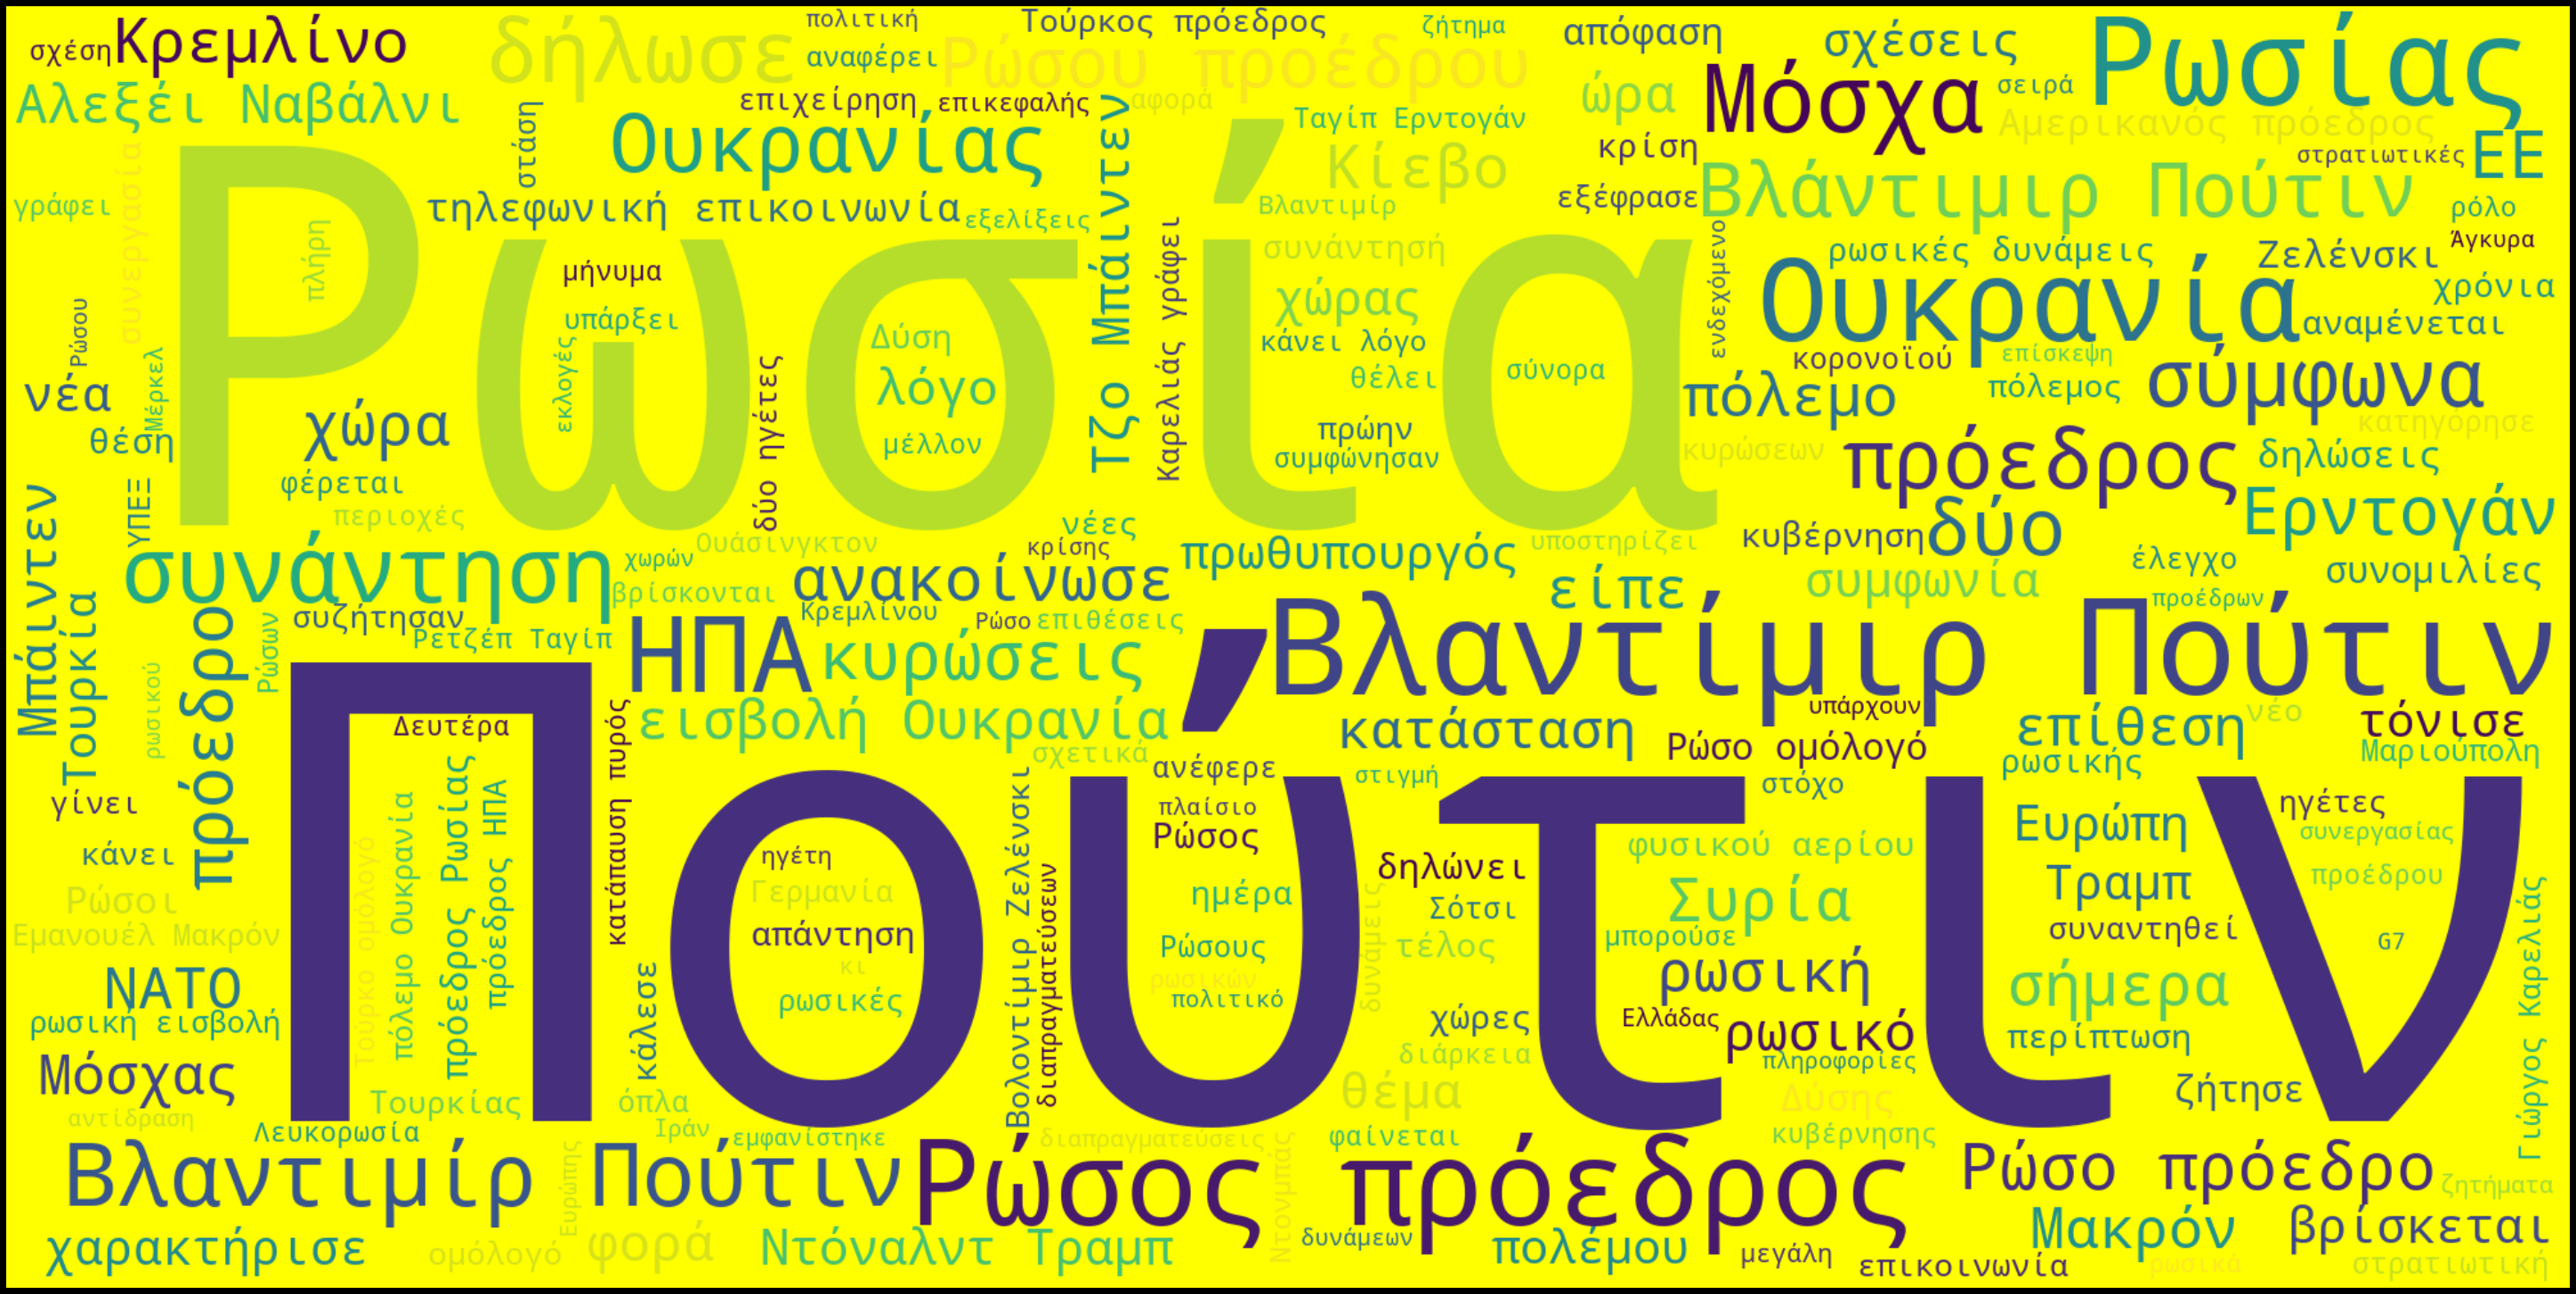

In [27]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'yellow'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [28]:
word_count = Counter(" ".join(putin["text"]).split())
word_count = {word.lower() : count for word, count in word_count.items() if not word.lower() in STOPWORDS}
word_count = pd.DataFrame(data={
    'word': word_count.keys(),
    'count': word_count.values()
})

word_count.sort_values('count',ascending=False).head(15)

word  count
38         του    939
19         της    860
22        στην    424
31      πούτιν    398
124        των    393
29           ο    361
197        ότι    195
94           η    183
59   βλαντίμιρ    165
50        τους    151
136      ρωσία    131
9       ρωσίας    124
464       στις    123
108   ουκρανία    100
79         πως     94

In [30]:
from collections import Counter
Counter(" ".join(putin["text"]).split()).most_common(50)

[('του', 939),
 ('της', 860),
 ('και', 800),
 ('την', 708),
 ('για', 633),
 ('να', 622),
 ('ο', 576),
 ('με', 517),
 ('τον', 497),
 ('το', 455),
 ('στην', 424),
 ('Πούτιν', 398),
 ('η', 398),
 ('των', 393),
 ('τη', 364),
 ('από', 363),
 ('Ο', 361),
 ('που', 343),
 ('σε', 267),
 ('στο', 266),
 ('θα', 264),
 ('στη', 246),
 ('τις', 227),
 ('οι', 223),
 ('πρόεδρος', 223),
 ('ότι', 195),
 ('Η', 183),
 ('τα', 167),
 ('Βλαντίμιρ', 165),
 ('τους', 151),
 ('Ρώσος', 140),
 ('Ρωσία', 131),
 ('δεν', 131),
 ('είναι', 131),
 ('Ρωσίας', 124),
 ('στις', 123),
 ('στον', 111),
 ('κατά', 104),
 ('Ουκρανία', 100),
 ('δύο', 99),
 ('πως', 94),
 ('μετά', 94),
 ('έχει', 93),
 ('Πούτιν.', 90),
 ('Πούτιν,', 87),
 ('Το', 83),
 ('Οι', 83),
 ('ΗΠΑ', 82),
 ('δήλωσε', 79),
 ('Βλαντιμίρ', 77)]

In [31]:
for word in nlp.Defaults.stop_words:
  print(word)
  break

κάποιας


In [32]:
putin['text_no_stopwords'] = putin['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words) and word != ':' and word != '\n' and word != "amp" and word != 'rt' and word != ',']))
putin['text_no_stopwords'] = putin['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words)]))
putin['clean_text_no_stopwords'] = putin['text']
#for stopword in nlp.Defaults.stop_words:
putin['clean_text_no_stopwords'] = putin['clean_text_no_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in nlp.Defaults.stop_words and word != "ή" and word != "ία" and word != "κι"]))
putin['clean_text_no_stopwords'] = putin['clean_text_no_stopwords'].apply(lambda x: x.replace("amp", "").strip())
putin['clean_text_no_stopwords'] = putin['clean_text_no_stopwords'].apply(lambda x: x.replace("rt", "").strip())
putin['clean_text_no_stopwords'] = putin['clean_text_no_stopwords'].apply(lambda x: x.replace(":", "").strip())
putin['clean_text_no_stopwords'] = putin['clean_text_no_stopwords'].apply(lambda x: x.replace(",", "").strip())
putin['clean_text_no_stopwords'] = putin['clean_text_no_stopwords'].apply(lambda x: x.replace("\n", "").strip())
putin['clean_text_no_stopwords'] = putin['clean_text_no_stopwords'].apply(lambda x: x.replace(".", "").strip())

In [34]:
freq = Counter(" ".join(putin["clean_text_no_stopwords"]).split()).most_common(16)
freq

[('Πούτιν', 577),
 ('Ο', 361),
 ('πρόεδρος', 250),
 ('Ουκρανία', 214),
 ('Ρωσία', 190),
 ('Η', 183),
 ('Ρωσίας', 179),
 ('Βλαντίμιρ', 166),
 ('Ρώσος', 140),
 ('ΗΠΑ', 118),
 ('δύο', 99),
 ('Μόσχα', 91),
 ('Το', 83),
 ('Οι', 83),
 ('δήλωσε', 79),
 ('Βλαντιμίρ', 77)]

In [35]:
import numpy as np


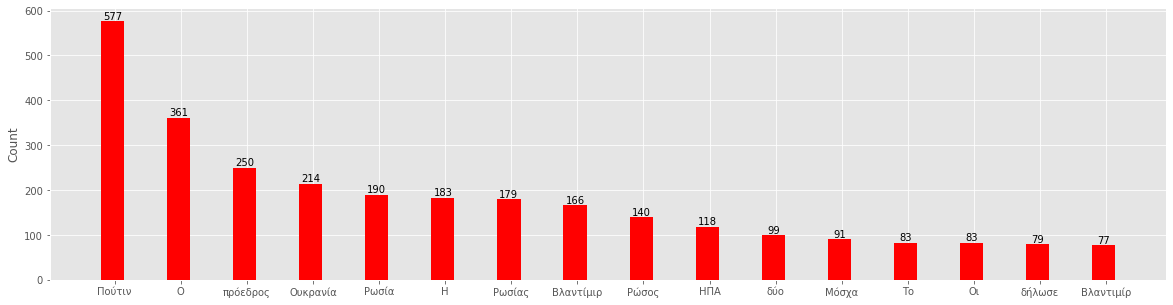

In [36]:
names, values = zip(*freq)
# names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
# values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(freq))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(ind, values, width, color='r')
# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/10.)
ax.set_xticklabels(names)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

In [37]:
putin.resample(rule='D',on='Date').count()

Title  URL  text  Keywords  created_at  Month  Day  Time  Date  \
Date                                                                         
2017-03-10      1    1     1         1           1      1    1     1     1   
2017-03-11      0    0     0         0           0      0    0     0     0   
2017-03-12      0    0     0         0           0      0    0     0     0   
2017-03-13      0    0     0         0           0      0    0     0     0   
2017-03-14      0    0     0         0           0      0    0     0     0   
...           ...  ...   ...       ...         ...    ...  ...   ...   ...   
2022-06-27      4    4     4         4           4      4    4     4     4   
2022-06-28      1    1     1         1           1      1    1     1     1   
2022-06-29      2    2     2         2           2      2    2     2     2   
2022-06-30      3    3     3         3           3      3    3     3     3   
2022-07-01      1    1     1         1           1      1    1     1     1   

            Year  text_no_stopwords  clean_text_no_stopwords  
Date                                                          
2017-03-10     1                  1                        1  
2017-03-11     0                  0                        0  
2017-03-12     0                  0                        0  
2017-03-13     0                  0                        0  
2017-03-14     0                  0                        0  
...          ...                ...                      ...  
2022-06-27     4                  4                        4  
2022-06-28     1                  1                        1  
2022-06-29     2                  2                        2  
2022-06-30     3                  3                        3  
2022-07-01     1                  1                        1  

[1940 rows x 12 columns]

# Vectorizing Putin

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [39]:
count_vector = cv.fit_transform(putin['text'])

In [40]:
count_vector.shape

(1360, 6806)

In [41]:
cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00  000  02  03  06  09  10  100  100η  101  ...  ύστερα  ύφεσης  ύψη  \
0   0    0   0   0   0   0   0    0     0    0  ...       0       0    0   
1   0    0   0   0   0   0   0    0     0    0  ...       0       0    0   
2   0    0   0   0   0   0   0    0     0    0  ...       0       0    0   
3   0    0   0   0   0   0   0    0     0    0  ...       0       0    0   
4   0    0   0   0   0   0   0    0     0    0  ...       0       0    0   

   ύψος  ύψους  ώθηση  ώρα  ώρας  ώρες  ώστε  
0     0      0      0    0     0     0     0  
1     0      0      0    0     0     0     0  
2     0      0      0    0     0     0     0  
3     0      0      0    0     0     0     0  
4     0      0      0    0     0     0     0  

[5 rows x 6806 columns]

In [42]:
#cv.vocabulary_

In [43]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [44]:
count_vector = cv.fit_transform(putin['text'])

In [45]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


έλεγχο  αέριο  αερίου  αλεξέι  αμάχων  αμερικανό  αμερικανός  ανέφερε  \
0       0      0       0       0       0          0           0        0   
1       0      0       0       0       0          0           0        0   
2       0      0       0       0       0          0           0        0   
3       0      0       0       0       0          0           0        0   
4       0      0       0       0       0          0           0        0   

   ανακοίνωσε  αναμένεται  ...  φορά  φυσικού  χαρακτήρισε  χρόνια  χωρών  \
0           0           0  ...     0        0            0       0      0   
1           0           0  ...     0        0            0       0      0   
2           0           0  ...     0        0            1       0      0   
3           0           0  ...     0        0            0       0      0   
4           0           0  ...     0        0            0       0      0   

   χώρα  χώρας  χώρες  όπλα  ώρα  
0     0      0      0     0    0  
1     0      0      0     0    0  
2     0      0      0     0    0  
3     0      0      0     0    0  
4     0      0      0     0    0  

[5 rows x 160 columns]

In [46]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [47]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(putin['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκασε ο', 'έτερα', 'έτερων', 'ήσω', 'ίσιος', 'αλλιώ', 'αλλιώτικος', 'αλλοιώ', 'αρκετός', 'γίνομαι', 'γρήγορο', 'διο', 'είχος', 'εαυτής', 'εαυτός', 'εκάστος', 'επόμενος', 'εσένος', 'ετέραις', 'ετού', 'ετούε ο', 'εχτής', 'ιδίο', 'κάνενς', 'κάνω', 'κανενό', 'λοιπός', 'μέλλω', 'μερικός', 'μπορώ', 'μόνας', 'ολωσδιόλος', 'ορισμένος', 'οριόμενσς', 'ποία', 'πολύς', 'προτός', 'προχτής', 'σε ο', 'ταύ', 'τουλάχισε ο', 'τρίτος', 'τός', 'χωριστό'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


...  Αμερικανός  ΗΠΑ  Κρεμλίνο  ΟΗΕ  Ρωσία  Συρία  άγκυρα  άνθρωπος  \
0    0           0    0         0    0      0      0       0         0   
1    0           0    0         0    0      0      0       0         0   
2    0           0    0         0    0      0      0       0         0   
3    0           0    0         0    0      0      0       0         0   
4    0           0    0         0    0      0      0       0         0   

   έλεγχος  ...  υπουργός  φέρω  φορά  φυσικός  χαρακτηρίζω  χρησιμοποιώ  \
0        0  ...         0     0     0        0            0            0   
1        0  ...         0     0     0        0            0            0   
2        0  ...         0     0     0        0            1            0   
3        0  ...         0     0     0        0            0            0   
4        0  ...         0     0     0        0            0            1   

   χρόνος  χώρα  όπλο  ώρα  
0       0     0     0    0  
1       0     0     0    0  
2       0     0     0    0  
3       0     0     0    0  
4       0     0     0    0  

[5 rows x 207 columns]

In [48]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(putin['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


βλάντιμιρ  βλαντίμιρ  βλαντιμίρ  δήλωσε  δύο  ερντογάν  ηπα  μόσχα  \
0          0          0          0       0    0         0    0      0   
1          0          0          1       0    0         0    0      0   
2          0          0          1       0    0         0    0      0   
3          0          1          0       0    0         0    0      0   
4          0          0          0       0    0         0    0      0   

   ουκρανία  ουκρανίας  πούτιν  προέδρου  πρόεδρο  πρόεδρος  ρωσία  ρωσίας  \
0         0          0       1         0        0         0      0       1   
1         0          0       1         0        0         0      0       0   
2         0          0       1         0        0         0      0       0   
3         0          0       1         0        0         0      0       0   
4         0          0       0         0        0         0      0       0   

   ρώσο  ρώσος  συνάντηση  σύμφωνα  
0     0      0          0        1  
1     0      0          0        0  
2     0      0          0        0  
3     0      0          0        0  
4     0      0          0        0

In [49]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bουκ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(putin['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ουκρανή  ουκρανία  ουκρανίας  ουκρανικά  ουκρανικές  ουκρανική  ουκρανικής  \
0        0         0          0          0           0          0           0   
1        0         0          0          0           0          0           0   
2        0         0          0          0           0          0           0   
3        0         0          0          0           0          0           0   
4        0         0          0          0           0          0           0   

   ουκρανικού  ουκρανικό  ουκρανικός  ουκρανικών  ουκρανοί  ουκρανορωσική  \
0           0          0           0           0         0              0   
1           0          0           0           0         0              0   
2           0          0           0           0         0              0   
3           0          0           0           0         0              0   
4           0          0           0           0         0              0   

   ουκρανού  ουκρανούς  ουκρανό  ουκρανός  ουκρανών  
0         0          0        0         0         0  
1         0          0        0         0         0  
2         0          0        0         0         0  
3         0          0        0         0         0  
4         0          0        0         0         0

In [50]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bουκ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(putin['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


αλεξέι ναβάλνι  αμερικανός πρόεδρος  βλάντιμιρ πούτιν  βλαντίμιρ πούτιν  \
0               0                    0                 0                 0   
1               0                    0                 0                 0   
2               0                    0                 0                 0   
3               0                    0                 0                 1   
4               0                    0                 0                 0   

   βλαντιμίρ πούτιν  βολοντίμιρ ζελένσκι  εισβολή ουκρανία  εμανουέλ μακρόν  \
0                 0                    0                 0                0   
1                 1                    0                 0                0   
2                 1                    0                 0                0   
3                 0                    0                 0                0   
4                 0                    0                 0                0   

   ντόναλντ τραμπ  πρόεδρος ρωσίας  πόλεμο ουκρανία  ρωσικές δυνάμεις  \
0               0                0                0                 0   
1               0                0                0                 0   
2               0                0                0                 0   
3               0                0                0                 0   
4               0                0                0                 0   

   ρωσική εισβολή  ρώσο ομόλογό  ρώσο πρόεδρο  ρώσος πρόεδρος  ρώσου προέδρου  \
0               0             0             0               0               0   
1               0             0             0               0               0   
2               0             0             0               0               0   
3               0             0             0               0               0   
4               0             0             0               0               0   

   τζο μπάιντεν  τηλεφωνική επικοινωνία  φυσικού αερίου  
0             0                       0               0  
1             0                       0               0  
2             0                       0               0  
3             0                       0               0  
4             0                       0               0

In [57]:
results.sum(axis =0).sort_values(ascending = False)


βλαντίμιρ πούτιν          165
ρώσος πρόεδρος            131
βλαντιμίρ πούτιν           77
βλάντιμιρ πούτιν           60
ρώσου προέδρου             48
ρώσο πρόεδρο               42
τηλεφωνική επικοινωνία     32
εισβολή ουκρανία           31
αλεξέι ναβάλνι             29
τζο μπάιντεν               28
ντόναλντ τραμπ             27
πόλεμο ουκρανία            22
αμερικανός πρόεδρος        22
πρόεδρος ρωσίας            21
ρώσο ομόλογό               20
βολοντίμιρ ζελένσκι        20
φυσικού αερίου             20
ρωσική εισβολή             19
εμανουέλ μακρόν            18
ρωσικές δυνάμεις           17
dtype: int64

In [58]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

βλαντίμιρ πούτιν    165
ρώσος πρόεδρος      131
βλαντιμίρ πούτιν     77
βλάντιμιρ πούτιν     60
ρώσου προέδρου       48
dtype: int64

In [62]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bουκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\br[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(putin['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


rbk  reuters  ria  rifaat  riot  roscosmos  russia  ryanair
0    0        0    0       0     0          0       0        0
1    0        0    0       0     0          0       0        0
2    0        0    0       0     0          0       0        0
3    0        0    0       0     0          0       0        0
4    0        0    0       0     0          0       0        0

In [63]:
results.sum(axis =0).sort_values(ascending = False)

riot         3
rbk          1
reuters      1
ria          1
rifaat       1
roscosmos    1
russia       1
ryanair      1
dtype: int64

In [64]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['ουκρανια', 'ρωσια', 'πολεμος']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(putin['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ουκρανια  ρωσια  πολεμος
0         0      0        0
1         0      0        0
2         0      0        0
3         0      0        0
4         0      0        0

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(putin['text'])  #finds the tfidf score with normalization

In [67]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


000  100   18   24   27  400  g20        g7  news  nord  ...  χωρών  χώρα  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   0.0   0.0  ...    0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   0.0   0.0  ...    0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.545593   0.0   0.0  ...    0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   0.0   0.0  ...    0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   0.0   0.0  ...    0.0   0.0   

   χώρας  χώρες  χώρο  όλαφ  όπλα  όπλων  ώρα  ώρες  
0    0.0    0.0   0.0   0.0   0.0    0.0  0.0   0.0  
1    0.0    0.0   0.0   0.0   0.0    0.0  0.0   0.0  
2    0.0    0.0   0.0   0.0   0.0    0.0  0.0   0.0  
3    0.0    0.0   0.0   0.0   0.0    0.0  0.0   0.0  
4    0.0    0.0   0.0   0.0   0.0    0.0  0.0   0.0  

[5 rows x 500 columns]

In [68]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.02489493 0.03245819 ... 0.02657942 0.11481005 0.04182068]]


In [69]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.02489493 0.03245819 ... 0.02657942 0.11481005 0.04182068]
 [0.02489493 1.         0.1269568  ... 0.01918448 0.01417386 0.0301853 ]
 [0.03245819 0.1269568  1.         ... 0.02501285 0.01847998 0.03935581]
 ...
 [0.02657942 0.01918448 0.02501285 ... 1.         0.01513292 0.03222775]
 [0.11481005 0.01417386 0.01847998 ... 0.01513292 1.         0.02381049]
 [0.04182068 0.0301853  0.03935581 ... 0.03222775 0.02381049 1.        ]]


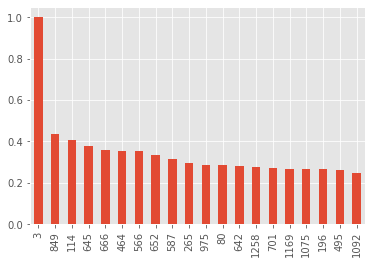

In [70]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [71]:
putin['text'].loc[3]

'Οπως αναμενόταν,ο Βλαντίμιρ Πούτιν απείλησε ανοιχτά με χτύπημα αν αναπτυχθούν στρατιωτικές υποδομές του ΝΑΤΟ σε Φινλανδία και Σουηδία. '

In [72]:
putin['text'].loc[253]

'Σε μια απόφαση "άνευ προηγουμένου" όπως τη χαρακτήρισε ο Λευκός Οίκος, προχωρούν οι ΗΠΑ, καθως για τους επόμενους έξι μήνες θα αντλούν 1 εκατ. βαρέλια πετρέλαιο την ημέρα από τα στρατηγικά αποθέματα.'

# Emolex Putin

In [139]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)
emolex_df

word  Positive  Negative  Anger  Anticipation  Disgust  \
0                αφεση       1.0       0.0    0.0           0.0      0.0   
1      ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   
2              εχοντας       0.0       0.0    0.0           0.0      0.0   
3                  εχω       0.0       0.0    0.0           0.0      0.0   
4                 οριο       0.0       0.0    0.0           0.0      0.0   
...                ...       ...       ...    ...           ...      ...   
13156        ουρλιασμα       0.0       1.0    1.0           0.0      0.0   
13157     κροκος αυγου       0.0       0.0    0.0           0.0      0.0   
13158         νεοτερος       1.0       0.0    0.0           0.0      0.0   
13159          ζεφυρος       0.0       0.0    0.0           0.0      0.0   
13160             ζουμ       0.0       0.0    0.0           0.0      0.0   

       Fear  Joy  Sadness  Surprise  Trust  
0       0.0  0.0      0.0       0.0    0.0  
1       0.0  0.0      0.0       0.0    0.0  
2       0.0  0.0      0.0       0.0    0.0  
3       0.0  0.0      0.0       0.0    0.0  
4       0.0  0.0      0.0       0.0    0.0  
...     ...  ...      ...       ...    ...  
13156   1.0  0.0      0.0       1.0    0.0  
13157   0.0  0.0      0.0       0.0    0.0  
13158   0.0  0.0      0.0       0.0    0.0  
13159   0.0  0.0      0.0       0.0    0.0  
13160   0.0  0.0      0.0       0.0    0.0  

[13161 rows x 11 columns]

In [140]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [141]:
putin_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/putin.tsv", sep='\t')
putin_df

Unnamed: 0                                              Title  \
0              0  Πούτιν: "Βλέπει" Ρωσία και Λευκορωσία σε "τροχ...   
1              1  Πούτιν: Απαντά στον Τζόνσον για την "τοξική αρ...   
2              2  Ο Πούτιν απάντησε στο "τρολάρισμα" της G7 - "Θ...   
3              3  Πούτιν: Αν αναπτυχθούν υποδομές του ΝΑΤΟ σε Φι...   
4              4  Μπόρις Τζόνσον: "Αν ο Πούτιν ήταν γυναίκα δεν ...   
...          ...                                                ...   
1355        1355  Σε φυλάκιση και χρηματικό πρόστιμο καταδικάστη...   
1356        1356  Πούτιν σε Λεπέν: Δεν επιθυμούμε να επηρεάσουμε...   
1357        1357        Στις 2 Μαΐου το τετ α τετ Μέρκελ - Πούτιν     
1358        1358                    Τη Μόσχα θα επισκεφθεί η Μέρκελ   
1359        1359  Πούτιν: Θεωρούμε την Τουρκία τον σημαντικότερο...   

                 created_at  \
0     01 Ιουλίου 2022 18:56   
1     30 Ιουνίου 2022 15:33   
2     30 Ιουνίου 2022 07:30   
3     30 Ιουνίου 2022 00:09   
4     29 Ιουνίου 2022 14:03   
...                     ...   
1355  27 Μαρτίου 2017 17:56   
1356  24 Μαρτίου 2017 14:10   
1357  16 Μαρτίου 2017 17:36   
1358  15 Μαρτίου 2017 20:51   
1359  10 Μαρτίου 2017 21:30   

                                                    URL  \
0     https://www.news247.gr/kosmos/poytin-i-ensomat...   
1     https://www.news247.gr/kosmos/poytin-apanta-st...   
2     https://www.news247.gr/kosmos/o-poytin-apantis...   
3     https://www.news247.gr/kosmos/poytin-an-anapty...   
4     https://www.news247.gr/kosmos/mporis-tzonson-a...   
...                                                 ...   
1355  https://www.news247.gr/kosmos/se-fylakisi-kai-...   
1356  https://www.news247.gr/kosmos/poytin-se-lepen-...   
1357  https://www.news247.gr/kosmos/stis-2-maioy-to-...   
1358  https://www.news247.gr/kosmos/ti-moscha-tha-ep...   
1359  https://www.news247.gr/kosmos/poytin-theoroyme...   

                                                   text        About_text  \
0     Επιτάχυνση παρουσιάζουν, σύμφωνα με τον Πούτιν...             ΡΩΣΙΑ   
1     Στην επιχείρηση της Μάργκαρετ Θάτσερ στα Φώκλα...            ΠΟΥΤΙΝ   
2     "Αηδιαστικό θέαμα" χαρακτήρισε το ενδεχόμενο ν...            ΠΟΥΤΙΝ   
3     Οπως αναμενόταν,ο Βλαντίμιρ Πούτιν απείλησε αν...             ΡΩΣΙΑ   
4     Αυτή τη φράση χρησιμοποίησε ο Βρετανός πρωθυπο...    ΜΠΟΡΙΣ ΤΖΟΝΣΟΝ   
...                                                 ...               ...   
1355  Ποιος είναι ο πολιτικός ακτιβιστής που «απειλε...             ΡΩΣΙΑ   
1356  Η ανακοίνωση της συνάντησης Πούτιν - Λεπέν προ...  ΓΑΛΛΙΚΕΣ ΕΚΛΟΓΕΣ   
1357  Τη Ρωσία θα επισκεφθεί μετά από δύο χρόνια η Γ...    ΑΝΓΚΕΛΑ ΜΕΡΚΕΛ   
1358  Σύμφωνα με το Κρεμλίνο, το τετ α τετ Πούτιν - ...    ΑΝΓΚΕΛΑ ΜΕΡΚΕΛ   
1359  Πούτιν και Ερντογάν εξέφρασαν την ικανοποίησή ...             ΡΩΣΙΑ   

      Year    Month  Day   Time                 Date  
0     2022  Ιουλίου    1  18:56  2022-07-01 18:56:00  
1     2022  Ιουνίου   30  15:33  2022-06-30 15:33:00  
2     2022  Ιουνίου   30  07:30  2022-06-30 07:30:00  
3     2022  Ιουνίου   30  00:09  2022-06-30 00:09:00  
4     2022  Ιουνίου   29  14:03  2022-06-29 14:03:00  
...    ...      ...  ...    ...                  ...  
1355  2017  Μαρτίου   27  17:56  2017-03-27 17:56:00  
1356  2017  Μαρτίου   24  14:10  2017-03-24 14:10:00  
1357  2017  Μαρτίου   16  17:36  2017-03-16 17:36:00  
1358  2017  Μαρτίου   15  20:51  2017-03-15 20:51:00  
1359  2017  Μαρτίου   10  21:30  2017-03-10 21:30:00  

[1360 rows x 11 columns]

In [142]:
#putin_df.dtypes

In [143]:
putin_df['Year'] = putin_df.created_at.apply(lambda dt: dt.split(' ')[2])
putin_df['Month'] = putin_df.created_at.apply(lambda dt: dt.split(' ')[1])
putin_df['Day'] = putin_df.created_at.apply(lambda dt: dt.split(' ')[0])
putin_df['Time'] = putin_df.created_at.apply(lambda dt: dt.split(' ')[3])

months = {
    'Ιανουαρίου' : '01',
    'Φεβρουαρίου' : '02', 
    'Μαρτίου' : '03',
    'Απριλίου' : '04',
    'Μαΐου' : '05',
    'Ιουνίου': '06',
    'Ιουλίου' : '07',
    'Αυγούστου' : '08',
    'Σεπτεμβρίου' : '09',
    'Οκτωβρίου' : '10',
    'Νοεμβρίου' : '11',
    'Δεκεμβρίου' : '12',
     
}

putin_df['Date'] = putin_df.apply(lambda row: f'{months[row.Month]}/{row.Day}/{row.Year} {row.Time}', axis='columns',result_type='expand')
putin_df['Date'] = pd.to_datetime(putin_df['Date'])


putin_df

Unnamed: 0                                              Title  \
0              0  Πούτιν: "Βλέπει" Ρωσία και Λευκορωσία σε "τροχ...   
1              1  Πούτιν: Απαντά στον Τζόνσον για την "τοξική αρ...   
2              2  Ο Πούτιν απάντησε στο "τρολάρισμα" της G7 - "Θ...   
3              3  Πούτιν: Αν αναπτυχθούν υποδομές του ΝΑΤΟ σε Φι...   
4              4  Μπόρις Τζόνσον: "Αν ο Πούτιν ήταν γυναίκα δεν ...   
...          ...                                                ...   
1355        1355  Σε φυλάκιση και χρηματικό πρόστιμο καταδικάστη...   
1356        1356  Πούτιν σε Λεπέν: Δεν επιθυμούμε να επηρεάσουμε...   
1357        1357        Στις 2 Μαΐου το τετ α τετ Μέρκελ - Πούτιν     
1358        1358                    Τη Μόσχα θα επισκεφθεί η Μέρκελ   
1359        1359  Πούτιν: Θεωρούμε την Τουρκία τον σημαντικότερο...   

                 created_at  \
0     01 Ιουλίου 2022 18:56   
1     30 Ιουνίου 2022 15:33   
2     30 Ιουνίου 2022 07:30   
3     30 Ιουνίου 2022 00:09   
4     29 Ιουνίου 2022 14:03   
...                     ...   
1355  27 Μαρτίου 2017 17:56   
1356  24 Μαρτίου 2017 14:10   
1357  16 Μαρτίου 2017 17:36   
1358  15 Μαρτίου 2017 20:51   
1359  10 Μαρτίου 2017 21:30   

                                                    URL  \
0     https://www.news247.gr/kosmos/poytin-i-ensomat...   
1     https://www.news247.gr/kosmos/poytin-apanta-st...   
2     https://www.news247.gr/kosmos/o-poytin-apantis...   
3     https://www.news247.gr/kosmos/poytin-an-anapty...   
4     https://www.news247.gr/kosmos/mporis-tzonson-a...   
...                                                 ...   
1355  https://www.news247.gr/kosmos/se-fylakisi-kai-...   
1356  https://www.news247.gr/kosmos/poytin-se-lepen-...   
1357  https://www.news247.gr/kosmos/stis-2-maioy-to-...   
1358  https://www.news247.gr/kosmos/ti-moscha-tha-ep...   
1359  https://www.news247.gr/kosmos/poytin-theoroyme...   

                                                   text        About_text  \
0     Επιτάχυνση παρουσιάζουν, σύμφωνα με τον Πούτιν...             ΡΩΣΙΑ   
1     Στην επιχείρηση της Μάργκαρετ Θάτσερ στα Φώκλα...            ΠΟΥΤΙΝ   
2     "Αηδιαστικό θέαμα" χαρακτήρισε το ενδεχόμενο ν...            ΠΟΥΤΙΝ   
3     Οπως αναμενόταν,ο Βλαντίμιρ Πούτιν απείλησε αν...             ΡΩΣΙΑ   
4     Αυτή τη φράση χρησιμοποίησε ο Βρετανός πρωθυπο...    ΜΠΟΡΙΣ ΤΖΟΝΣΟΝ   
...                                                 ...               ...   
1355  Ποιος είναι ο πολιτικός ακτιβιστής που «απειλε...             ΡΩΣΙΑ   
1356  Η ανακοίνωση της συνάντησης Πούτιν - Λεπέν προ...  ΓΑΛΛΙΚΕΣ ΕΚΛΟΓΕΣ   
1357  Τη Ρωσία θα επισκεφθεί μετά από δύο χρόνια η Γ...    ΑΝΓΚΕΛΑ ΜΕΡΚΕΛ   
1358  Σύμφωνα με το Κρεμλίνο, το τετ α τετ Πούτιν - ...    ΑΝΓΚΕΛΑ ΜΕΡΚΕΛ   
1359  Πούτιν και Ερντογάν εξέφρασαν την ικανοποίησή ...             ΡΩΣΙΑ   

      Year    Month Day   Time                Date  
0     2022  Ιουλίου  01  18:56 2022-07-01 18:56:00  
1     2022  Ιουνίου  30  15:33 2022-06-30 15:33:00  
2     2022  Ιουνίου  30  07:30 2022-06-30 07:30:00  
3     2022  Ιουνίου  30  00:09 2022-06-30 00:09:00  
4     2022  Ιουνίου  29  14:03 2022-06-29 14:03:00  
...    ...      ...  ..    ...                 ...  
1355  2017  Μαρτίου  27  17:56 2017-03-27 17:56:00  
1356  2017  Μαρτίου  24  14:10 2017-03-24 14:10:00  
1357  2017  Μαρτίου  16  17:36 2017-03-16 17:36:00  
1358  2017  Μαρτίου  15  20:51 2017-03-15 20:51:00  
1359  2017  Μαρτίου  10  21:30 2017-03-10 21:30:00  

[1360 rows x 11 columns]

In [144]:
#putin_df.dtypes

In [145]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [146]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [147]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#              strip_accents = 'unicode', 
#               token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#               stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(putin_df['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [148]:
wordcount_df.shape

(1360, 13161)

In [149]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [150]:
emolex_df[emolex_df.Anger == 1].tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13094      διεξοδος       0.0       0.0    1.0           0.0      0.0   0.0   
13096        ζωυφια       0.0       1.0    1.0           0.0      1.0   1.0   
13100    θυματοποιω       0.0       1.0    1.0           0.0      1.0   1.0   
13128  αποτυχημενος       0.0       1.0    1.0           0.0      1.0   0.0   
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   

       Joy  Sadness  Surprise  Trust  
13094  0.0      0.0       0.0    0.0  
13096  0.0      0.0       0.0    0.0  
13100  0.0      1.0       1.0    0.0  
13128  0.0      0.0       0.0    0.0  
13156  0.0      0.0       1.0    0.0

In [151]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [152]:
putin_df.head(3)

Unnamed: 0                                              Title  \
0           0  Πούτιν: "Βλέπει" Ρωσία και Λευκορωσία σε "τροχ...   
1           1  Πούτιν: Απαντά στον Τζόνσον για την "τοξική αρ...   
2           2  Ο Πούτιν απάντησε στο "τρολάρισμα" της G7 - "Θ...   

              created_at                                                URL  \
0  01 Ιουλίου 2022 18:56  https://www.news247.gr/kosmos/poytin-i-ensomat...   
1  30 Ιουνίου 2022 15:33  https://www.news247.gr/kosmos/poytin-apanta-st...   
2  30 Ιουνίου 2022 07:30  https://www.news247.gr/kosmos/o-poytin-apantis...   

                                                text About_text  Year  \
0  Επιτάχυνση παρουσιάζουν, σύμφωνα με τον Πούτιν...      ΡΩΣΙΑ  2022   
1  Στην επιχείρηση της Μάργκαρετ Θάτσερ στα Φώκλα...     ΠΟΥΤΙΝ  2022   
2  "Αηδιαστικό θέαμα" χαρακτήρισε το ενδεχόμενο ν...     ΠΟΥΤΙΝ  2022   

     Month Day   Time                Date  
0  Ιουλίου  01  18:56 2022-07-01 18:56:00  
1  Ιουνίου  30  15:33 2022-06-30 15:33:00  
2  Ιουνίου  30  07:30 2022-06-30 07:30:00

In [153]:
putin_df['anger'] = wordcount_df[angry_words].sum(axis=1)
putin_df['positivity'] = wordcount_df[positive_words].sum(axis=1)
putin_df['joy'] = wordcount_df[joy_words].sum(axis=1)
putin_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
putin_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
putin_df['trust'] = wordcount_df[trust_words].sum(axis=1)
putin_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
putin_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
putin_df['negative'] = wordcount_df[negative_words].sum(axis=1)
putin_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [154]:
putin_df

Unnamed: 0                                              Title  \
0              0  Πούτιν: "Βλέπει" Ρωσία και Λευκορωσία σε "τροχ...   
1              1  Πούτιν: Απαντά στον Τζόνσον για την "τοξική αρ...   
2              2  Ο Πούτιν απάντησε στο "τρολάρισμα" της G7 - "Θ...   
3              3  Πούτιν: Αν αναπτυχθούν υποδομές του ΝΑΤΟ σε Φι...   
4              4  Μπόρις Τζόνσον: "Αν ο Πούτιν ήταν γυναίκα δεν ...   
...          ...                                                ...   
1355        1355  Σε φυλάκιση και χρηματικό πρόστιμο καταδικάστη...   
1356        1356  Πούτιν σε Λεπέν: Δεν επιθυμούμε να επηρεάσουμε...   
1357        1357        Στις 2 Μαΐου το τετ α τετ Μέρκελ - Πούτιν     
1358        1358                    Τη Μόσχα θα επισκεφθεί η Μέρκελ   
1359        1359  Πούτιν: Θεωρούμε την Τουρκία τον σημαντικότερο...   

                 created_at  \
0     01 Ιουλίου 2022 18:56   
1     30 Ιουνίου 2022 15:33   
2     30 Ιουνίου 2022 07:30   
3     30 Ιουνίου 2022 00:09   
4     29 Ιουνίου 2022 14:03   
...                     ...   
1355  27 Μαρτίου 2017 17:56   
1356  24 Μαρτίου 2017 14:10   
1357  16 Μαρτίου 2017 17:36   
1358  15 Μαρτίου 2017 20:51   
1359  10 Μαρτίου 2017 21:30   

                                                    URL  \
0     https://www.news247.gr/kosmos/poytin-i-ensomat...   
1     https://www.news247.gr/kosmos/poytin-apanta-st...   
2     https://www.news247.gr/kosmos/o-poytin-apantis...   
3     https://www.news247.gr/kosmos/poytin-an-anapty...   
4     https://www.news247.gr/kosmos/mporis-tzonson-a...   
...                                                 ...   
1355  https://www.news247.gr/kosmos/se-fylakisi-kai-...   
1356  https://www.news247.gr/kosmos/poytin-se-lepen-...   
1357  https://www.news247.gr/kosmos/stis-2-maioy-to-...   
1358  https://www.news247.gr/kosmos/ti-moscha-tha-ep...   
1359  https://www.news247.gr/kosmos/poytin-theoroyme...   

                                                   text        About_text  \
0     Επιτάχυνση παρουσιάζουν, σύμφωνα με τον Πούτιν...             ΡΩΣΙΑ   
1     Στην επιχείρηση της Μάργκαρετ Θάτσερ στα Φώκλα...            ΠΟΥΤΙΝ   
2     "Αηδιαστικό θέαμα" χαρακτήρισε το ενδεχόμενο ν...            ΠΟΥΤΙΝ   
3     Οπως αναμενόταν,ο Βλαντίμιρ Πούτιν απείλησε αν...             ΡΩΣΙΑ   
4     Αυτή τη φράση χρησιμοποίησε ο Βρετανός πρωθυπο...    ΜΠΟΡΙΣ ΤΖΟΝΣΟΝ   
...                                                 ...               ...   
1355  Ποιος είναι ο πολιτικός ακτιβιστής που «απειλε...             ΡΩΣΙΑ   
1356  Η ανακοίνωση της συνάντησης Πούτιν - Λεπέν προ...  ΓΑΛΛΙΚΕΣ ΕΚΛΟΓΕΣ   
1357  Τη Ρωσία θα επισκεφθεί μετά από δύο χρόνια η Γ...    ΑΝΓΚΕΛΑ ΜΕΡΚΕΛ   
1358  Σύμφωνα με το Κρεμλίνο, το τετ α τετ Πούτιν - ...    ΑΝΓΚΕΛΑ ΜΕΡΚΕΛ   
1359  Πούτιν και Ερντογάν εξέφρασαν την ικανοποίησή ...             ΡΩΣΙΑ   

      Year    Month Day   Time  ... anger  positivity  joy  disgust  surprise  \
0     2022  Ιουλίου  01  18:56  ...     0           0    0        0         0   
1     2022  Ιουνίου  30  15:33  ...     0           0    0        0         0   
2     2022  Ιουνίου  30  07:30  ...     1           0    0        1         0   
3     2022  Ιουνίου  30  00:09  ...     1           0    0        0         1   
4     2022  Ιουνίου  29  14:03  ...     0           0    0        0         0   
...    ...      ...  ..    ...  ...   ...         ...  ...      ...       ...   
1355  2017  Μαρτίου  27  17:56  ...     0           2    0        1         0   
1356  2017  Μαρτίου  24  14:10  ...     0           1    0        0         0   
1357  2017  Μαρτίου  16  17:36  ...     0           1    1        1         0   
1358  2017  Μαρτίου  15  20:51  ...     1           1    0        1         0   
1359  2017  Μαρτίου  10  21:30  ...     0           1    0        0         0   

      trust  anticipation  sadness  negative  fear  
0         1             0        0         0     0  
1         0             1        0         0     0  
2         0   

In [155]:
max = 0
happiest_tweet = ""
for i in range(0,len(putin_df)):
  #print(putin_df.iloc[i]['positivity'])
  if putin_df.iloc[i]['positivity'] > max:
    happiest_tweet = putin_df.iloc[i]['text']
    max = putin_df.iloc[i]['positivity']


happiest_tweet

'Ο Ρώσος πρόεδρος απέρριψε το πόρισμα και υποστηρίξε ότι υπάρχουν αρκετά σενάρια όσον αφορά την κατάρριψη του αεροσκάφους, όπως ότι επλήγη από ουκρανικό πύραυλος. Επίσης επανέλαβε ότι «δεν υπάρχει κάτι που να μας εμπνέει εμπιστοσύνη όσον αφορά τα τελικά συμπεράσματα, και δεν θα υπάρξει εμπιστοσύνη χωρίς την πλήρη συμμετοχή μας στην έρευνα».'

In [156]:
max = 0
negative_tweet = ""
for i in range(0,len(putin_df)):
  #print(putin_df.iloc[i]['positivity'])
  if putin_df.iloc[i]['negative'] > max:
    negative_tweet = putin_df.iloc[i]['text']
    max = putin_df.iloc[i]['negative']


negative_tweet

'Ο Βλαντίμιρ Πούτιν ξεκίνησε την επίθεση εναντίον της Ουκρανίας χωρίς ενδεχομένως να περιμένει τη διεθνή αντίδραση. Η Δύση συσπειρώθηκε. Ο πόλεμος, αντίθετος στο διεθνές δίκαιο, καταδικάζεται αλλά συνεχίζεται. Οι εμπειρογνώμονες συγκεντρώνουν αποδείξεις για πιθανά εγκλήματα πολέμου, την ώρα που όλα συγκλίνουν στο ότι χρειάζεται πολιτική βούληση.'

In [157]:
max = 0
saddest_tweet = ""
for i in range(0,len(putin_df)):
  #print(putin_df.iloc[i]['positivity'])
  if putin_df.iloc[i]['sadness'] > max:
    saddest_tweet = putin_df.iloc[i]['text']
    max = putin_df.iloc[i]['sadness']

saddest_tweet

'"Απογοητευμένος" δηλώνει ο πρώην πρωθυπουργός της Ιταλίας Σίλβιο Μπερλουσκόνι με την στάση του Βλαντίμιρ Πούτιν σχετικά με την επίθεση στην Ουκρανία. '

In [158]:
max = 0
fear_tweet = ""
for i in range(0,len(putin_df)):
  #print(putin_df.iloc[i]['positivity'])
  if putin_df.iloc[i]['fear'] > max:
    fear_tweet = putin_df.iloc[i]['text']
    max = putin_df.iloc[i]['fear']

fear_tweet


'Την ώρα που ο πόλεμος στην Ουκρανία μαίνεται για 19η ημέρα, ο διευθύνων σύμβουλος της Tesla, Έλον Μασκ κάλεσε σε μονομαχία τον Ρώσο πρόεδρο. '

In [159]:
max = 0
trust_tweet = ""
for i in range(0,len(putin_df)):
  #print(putin_df.iloc[i]['positivity'])
  if putin_df.iloc[i]['trust'] > max:
    trust_tweet = putin_df.iloc[i]['text']
    max = putin_df.iloc[i]['trust']

trust_tweet

'Οι διμερείς σχέσεις αποκαταστάθηκαν πλήρως και επιστρέφουν σταδιακά στην κανονικότητα τους, δήλωσε ο πρόεδρος Βλαντιμίρ Πούτιν. Ευνοϊκότερους οικονομικούς όρους για την αγορά συστοιχιών σύγχρονων πυραύλων από τη Ρωσία, επιθυμεί η Τουρκία. Στην ατζέντα των συνομιλιών βρέθηκαν και τα ενεργειακά ζητήματα'

In [160]:
putin_df.set_index('Date' , inplace=True)

In [161]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

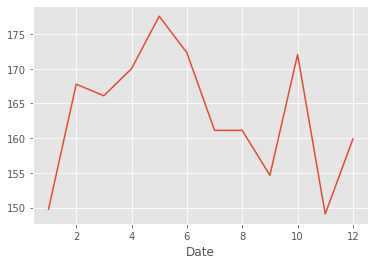

In [162]:
putin_df['text'].str.len().groupby(by=putin_df.index.month).mean().plot()

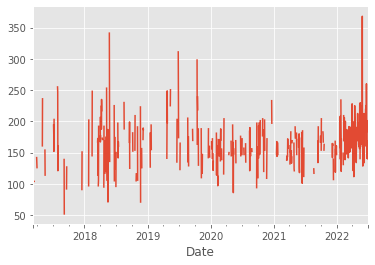

In [163]:
putin_df['text'].str.len().resample('D').mean().plot() 

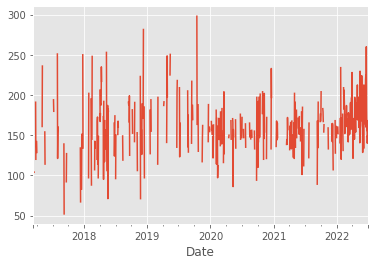

In [164]:
putin_df['text'].str.len().resample('B').mean().plot() 

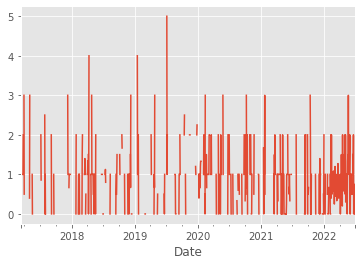

In [165]:
putin_df['positivity'].resample('B').mean().plot() 

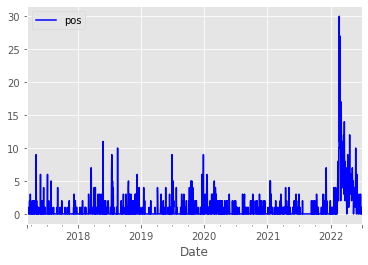

In [166]:
putin_df['positivity'].resample('B').sum().plot(color = 'b',label = 'pos').legend() 

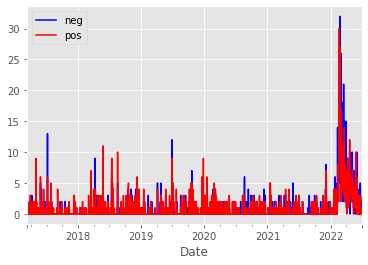

In [167]:
putin_df['negative'].resample('B').sum().plot(color = 'b',label = 'neg').legend() 
putin_df['positivity'].resample('B').sum().plot(color = 'r',label = 'pos').legend() 

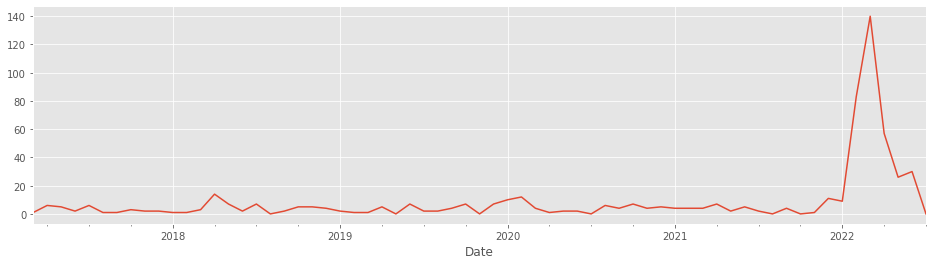

In [168]:
putin_df['anger'].resample('M').sum().plot(figsize=(16,4))

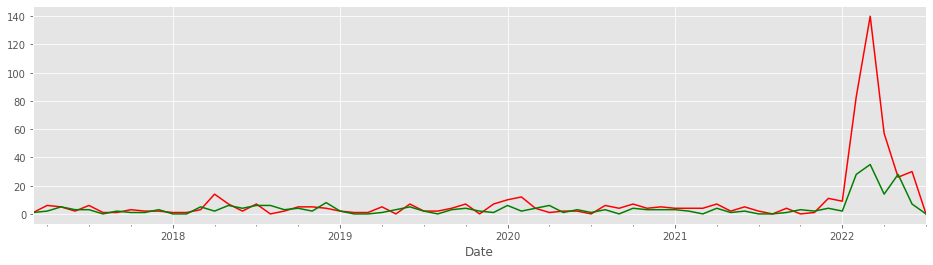

In [169]:
ax = putin_df['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
putin_df['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

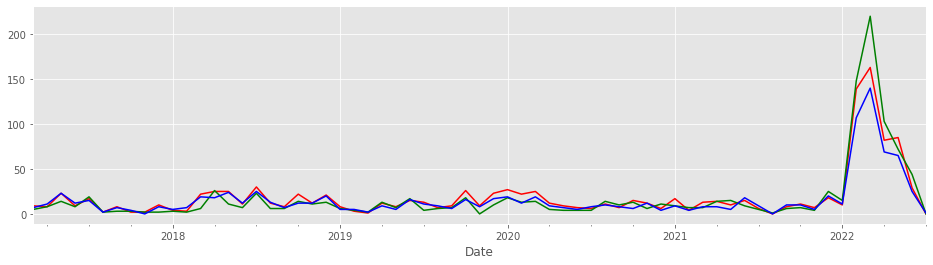

In [170]:
ax = putin_df['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
putin_df['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
putin_df['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

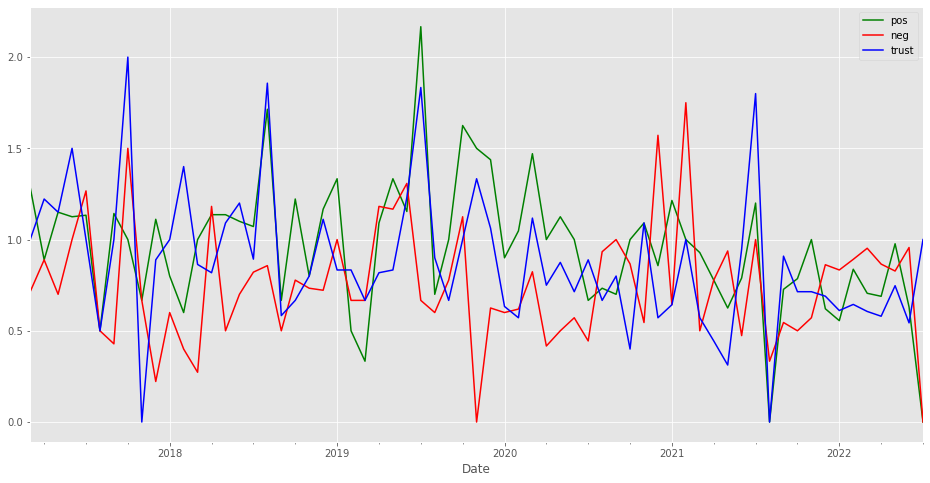

In [171]:
ax = putin_df['positivity'].resample('M').mean().plot(figsize=(16,8), 
                                                          color = 'g', label='pos')
putin_df['negative'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                   label = 'neg', color = 'r')
putin_df['trust'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

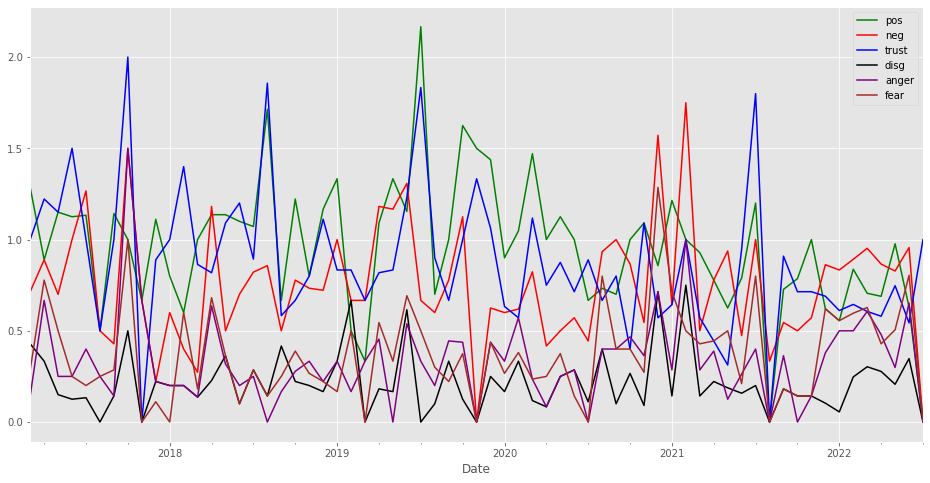

In [172]:
plt.style.use('ggplot')
ax = putin_df['positivity'].resample('M').mean().plot(figsize=(16,8), 
                                                          color = 'g', label='pos')
putin_df['negative'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                   label = 'neg', color = 'r')
putin_df['trust'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

putin_df['disgust'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                label = 'disg',color = 'black').legend() 

putin_df['anger'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                label = 'anger',color = 'purple').legend() 

putin_df['fear'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                label = 'fear',color = 'brown').legend()    

Text(0, 0.5, 'Years')

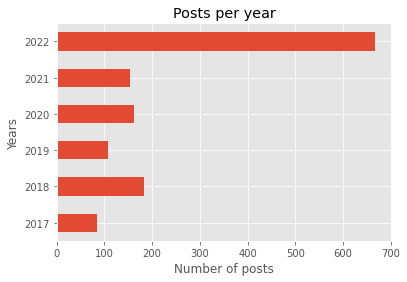

In [173]:
putin_df['text'].groupby(by=putin_df.index.year).count().plot(kind='barh')
plt.title("Posts per year")
plt.xlabel("Number of posts")
plt.ylabel("Years")

Text(0, 0.5, 'Hour of the day')

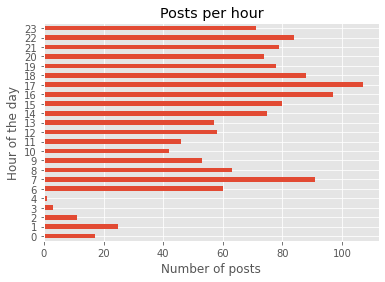

In [174]:
putin_df['text'].groupby(by=putin_df.index.hour).count().plot(kind='barh')
plt.title("Posts per hour")
plt.xlabel("Number of posts")
plt.ylabel("Hour of the day")

Text(0, 0.5, 'Months')

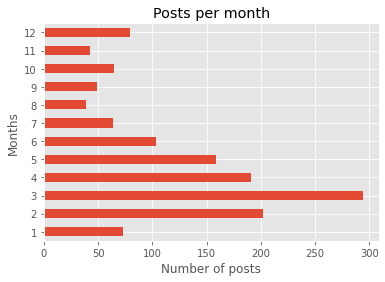

In [175]:
putin_df['text'].groupby(by=putin_df.index.month).count().plot(kind='barh')
plt.title("Posts per month")
plt.xlabel("Number of posts")
plt.ylabel("Months")

In [176]:
putin_df

Unnamed: 0  \
Date                              
2022-07-01 18:56:00           0   
2022-06-30 15:33:00           1   
2022-06-30 07:30:00           2   
2022-06-30 00:09:00           3   
2022-06-29 14:03:00           4   
...                         ...   
2017-03-27 17:56:00        1355   
2017-03-24 14:10:00        1356   
2017-03-16 17:36:00        1357   
2017-03-15 20:51:00        1358   
2017-03-10 21:30:00        1359   

                                                                 Title  \
Date                                                                     
2022-07-01 18:56:00  Πούτιν: "Βλέπει" Ρωσία και Λευκορωσία σε "τροχ...   
2022-06-30 15:33:00  Πούτιν: Απαντά στον Τζόνσον για την "τοξική αρ...   
2022-06-30 07:30:00  Ο Πούτιν απάντησε στο "τρολάρισμα" της G7 - "Θ...   
2022-06-30 00:09:00  Πούτιν: Αν αναπτυχθούν υποδομές του ΝΑΤΟ σε Φι...   
2022-06-29 14:03:00  Μπόρις Τζόνσον: "Αν ο Πούτιν ήταν γυναίκα δεν ...   
...                                                                ...   
2017-03-27 17:56:00  Σε φυλάκιση και χρηματικό πρόστιμο καταδικάστη...   
2017-03-24 14:10:00  Πούτιν σε Λεπέν: Δεν επιθυμούμε να επηρεάσουμε...   
2017-03-16 17:36:00        Στις 2 Μαΐου το τετ α τετ Μέρκελ - Πούτιν     
2017-03-15 20:51:00                    Τη Μόσχα θα επισκεφθεί η Μέρκελ   
2017-03-10 21:30:00  Πούτιν: Θεωρούμε την Τουρκία τον σημαντικότερο...   

                                created_at  \
Date                                         
2022-07-01 18:56:00  01 Ιουλίου 2022 18:56   
2022-06-30 15:33:00  30 Ιουνίου 2022 15:33   
2022-06-30 07:30:00  30 Ιουνίου 2022 07:30   
2022-06-30 00:09:00  30 Ιουνίου 2022 00:09   
2022-06-29 14:03:00  29 Ιουνίου 2022 14:03   
...                                    ...   
2017-03-27 17:56:00  27 Μαρτίου 2017 17:56   
2017-03-24 14:10:00  24 Μαρτίου 2017 14:10   
2017-03-16 17:36:00  16 Μαρτίου 2017 17:36   
2017-03-15 20:51:00  15 Μαρτίου 2017 20:51   
2017-03-10 21:30:00  10 Μαρτίου 2017 21:30   

                                                                   URL  \
Date                                                                     
2022-07-01 18:56:00  https://www.news247.gr/kosmos/poytin-i-ensomat...   
2022-06-30 15:33:00  https://www.news247.gr/kosmos/poytin-apanta-st...   
2022-06-30 07:30:00  https://www.news247.gr/kosmos/o-poytin-apantis...   
2022-06-30 00:09:00  https://www.news247.gr/kosmos/poytin-an-anapty...   
2022-06-29 14:03:00  https://www.news247.gr/kosmos/mporis-tzonson-a...   
...                                                                ...   
2017-03-27 17:56:00  https://www.news247.gr/kosmos/se-fylakisi-kai-...   
2017-03-24 14:10:00  https://www.news247.gr/kosmos/poytin-se-lepen-...   
2017-03-16 17:36:00  https://www.news247.gr/kosmos/stis-2-maioy-to-...   
2017-03-15 20:51:00  https://www.news247.gr/kosmos/ti-moscha-tha-ep...   
2017-03-10 21:30:00  https://www.news247.gr/kosmos/poytin-theoroyme...   

                                                                  text  \
Date                                                                     
2022-07-01 18:56:00  Επιτάχυνση παρουσιάζουν, σύμφωνα με τον Πούτιν...   
2022-06-30 15:33:00  Στην επιχείρηση της Μάργκαρετ Θάτσερ στα Φώκλα...   
2022-06-30 07:30:00  "Αηδιαστικό θέαμα" χαρακτήρισε το ενδεχόμενο ν...   
2022-06-30 00:09:00  Οπως αναμενόταν,ο Βλαντίμιρ Πούτιν απείλησε αν...   
2022-06-29 14:03:00  Αυτή τη φράση χρησιμοποίησε ο Βρετανός πρωθυπο...   
...                                                                ...   
2017-03-27 17:56:00  Ποιος είναι ο πολιτικός ακτιβιστής που «απειλε...   
2017-03-24 14:10:00  Η ανακοίνωση της συνάντησης Πούτιν - Λεπέν προ...   
2017-03-16 17:36:00  Τη Ρωσία θα επισκεφθεί μετά από δύο χρόνια η Γ...   
2017-03-15 20:51:00  Σύμφωνα με το Κρεμλίνο, το τετ α τετ Πούτιν - ...   
2017-03-10 21:30:00  Πούτιν και Ερντογάν εξέφρασαν την ικανοποίησή ...   

                           About_text  Year    Month Day   Time  anger  \
Dat

# Άνοιγμα του Zelenksi_Doc

In [177]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [180]:
Zelenksi =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/zelenski.tsv", sep='\t')
Zelenksi

Unnamed: 0                                              Title  \
0             0  Ζελένσκι: "Το ρωσικό πλήγμα στην Οδησσό ήταν σ...   
1             1  Η Ουκρανία διακόπτει τις διπλωματικές σχέσεις ...   
2             2  Σύνοδος ΝΑΤΟ: Τι πήρε ο "απομονωμένος" Ερντογά...   
3             3  Ζελένσκι: "Ο ΟΗΕ να απομακρύνει τη Ρωσία από τ...   
4             4  Κρεμλίνο: Θα σταματήσουμε την επίθεση όταν το ...   
..          ...                                                ...   
442         442  Πόλεμος στην Ουκρανία: Η Ρωσία κατακτά, το Κίε...   
443         443  Ουκρανία: Κάτοικοι στο Κίεβο - "Ελπίζουμε οι Ε...   
444         444  Πόλεμος στην Ουκρανία - Ζελένσκι: "Δεν ξέρω γι...   
445         445        Ζελένσκι, ένας κωμικός απέναντι στον Πούτιν   
446         446  Ζελένσκι: Η Ρωσία επιτέθηκε στην Ουκρανία όπως...   

                    created_at  \
0        02 Ιουλίου 2022 08:25   
1        29 Ιουνίου 2022 23:39   
2        29 Ιουνίου 2022 10:22   
3        29 Ιουνίου 2022 08:43   
4        28 Ιουνίου 2022 16:45   
..                         ...   
442  24 Φεβρουαρίου 2022 22:53   
443  24 Φεβρουαρίου 2022 22:12   
444  24 Φεβρουαρίου 2022 18:06   
445  24 Φεβρουαρίου 2022 15:21   
446  24 Φεβρουαρίου 2022 14:41   

                                                   URL  \
0    https://www.news247.gr/kosmos/zelenski-to-rosi...   
1    https://www.news247.gr/kosmos/i-oykrania-diako...   
2    https://www.news247.gr/kosmos/synodos-nato-ti-...   
3    https://www.news247.gr/kosmos/zelenski-o-oie-n...   
4    https://www.news247.gr/kosmos/kremlino-tha-sta...   
..                                                 ...   
442  https://www.news247.gr/kosmos/polemos-stin-oyk...   
443  https://www.news247.gr/kosmos/oykrania-katoiko...   
444  https://www.news247.gr/kosmos/polemos-stin-oyk...   
445  https://www.news247.gr/sunday-edition/zelenski...   
446  https://www.news247.gr/kosmos/zelenski-i-rosia...   

                                                  text             About_text  \
0    Ο Ζελένσκι διατείνεται ότι το ρωσικό πυραυλικό...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
1    Η Ουκρανία προχώρησε σε διακοπή των διπλωματικ...                  ΣΥΡΙΑ   
2    Το "πράσινο φως" της Τουρκίας δίνει "ισχυρή ώθ...                   ΝΑΤΟ   
3    Απευθυνόμενος στο Συμβούλιο Ασφαλείας του ΟΗΕ,...    ΒΟΛΟΝΤΙΜΙΡ ΖΕΛΕΝΣΚΙ   
4    Ο εκπρόσωπος του Βλαντίμιρ Πούτιν τόνισε πως η...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
..                                                 ...                    ...   
442  Η Ρωσία επελαύνει στα εδάφη της Ουκρανίας, έχο...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
443  Τις ανησυχίες τους και τους φόβους τους μετά τ...               ΟΥΚΡΑΝΙΑ   
444  Τους φόβους του για το μέλλον της Ουκρανίας, α...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
445  Το 2019 ο Βολοντίμιρ Ζελένσκι έκανε γυρίσματα ...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
446  Ο Ουκρανός πρόεδρος συνέκρινε την ρωσική εισβο...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   

     Year        Month  Day   Time                 Date  
0    2022      Ιουλίου    2  08:25  2022-07-02 08:25:00  
1    2022      Ιουνίου   29  23:39  2022-06-29 23:39:00  
2    2022      Ιουνίου   29  10:22  2022-06-29 10:22:00  
3    2022      Ιουνίου   29  08:43  2022-06-29 08:43:00  
4    2022      Ιουνίου   28  16:45  2022-06-28 16:45:00  
..    ...          ...  ...    ...                  ...  
442  2022  Φεβρουαρίου   24  22:53  2022-02-24 22:53:00  
443  2022  Φεβρουαρίου   24  22:12  2022-02-24 22:12:00  
444  2022  Φεβρουαρίου   24  18:06  2022-02-24 18:06:00  
445  2022  Φεβρουαρίου   24  15:21  2022-02-24 15:21:00  
446  2022  Φεβρουαρίου   24  14:41  2022-02-24 14:41:00  

[447 rows x 11 columns]

In [181]:
#Zelenksi.dtypes

In [182]:
#καθαρισμός και τακτοποίηση του Df
zel = Zelenksi[['Title', 'URL', 'text', 'About_text', 'created_at', 'Month', 'Day', 'Time', 'Date']]
zel

Title  \
0    Ζελένσκι: "Το ρωσικό πλήγμα στην Οδησσό ήταν σ...   
1    Η Ουκρανία διακόπτει τις διπλωματικές σχέσεις ...   
2    Σύνοδος ΝΑΤΟ: Τι πήρε ο "απομονωμένος" Ερντογά...   
3    Ζελένσκι: "Ο ΟΗΕ να απομακρύνει τη Ρωσία από τ...   
4    Κρεμλίνο: Θα σταματήσουμε την επίθεση όταν το ...   
..                                                 ...   
442  Πόλεμος στην Ουκρανία: Η Ρωσία κατακτά, το Κίε...   
443  Ουκρανία: Κάτοικοι στο Κίεβο - "Ελπίζουμε οι Ε...   
444  Πόλεμος στην Ουκρανία - Ζελένσκι: "Δεν ξέρω γι...   
445        Ζελένσκι, ένας κωμικός απέναντι στον Πούτιν   
446  Ζελένσκι: Η Ρωσία επιτέθηκε στην Ουκρανία όπως...   

                                                   URL  \
0    https://www.news247.gr/kosmos/zelenski-to-rosi...   
1    https://www.news247.gr/kosmos/i-oykrania-diako...   
2    https://www.news247.gr/kosmos/synodos-nato-ti-...   
3    https://www.news247.gr/kosmos/zelenski-o-oie-n...   
4    https://www.news247.gr/kosmos/kremlino-tha-sta...   
..                                                 ...   
442  https://www.news247.gr/kosmos/polemos-stin-oyk...   
443  https://www.news247.gr/kosmos/oykrania-katoiko...   
444  https://www.news247.gr/kosmos/polemos-stin-oyk...   
445  https://www.news247.gr/sunday-edition/zelenski...   
446  https://www.news247.gr/kosmos/zelenski-i-rosia...   

                                                  text             About_text  \
0    Ο Ζελένσκι διατείνεται ότι το ρωσικό πυραυλικό...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
1    Η Ουκρανία προχώρησε σε διακοπή των διπλωματικ...                  ΣΥΡΙΑ   
2    Το "πράσινο φως" της Τουρκίας δίνει "ισχυρή ώθ...                   ΝΑΤΟ   
3    Απευθυνόμενος στο Συμβούλιο Ασφαλείας του ΟΗΕ,...    ΒΟΛΟΝΤΙΜΙΡ ΖΕΛΕΝΣΚΙ   
4    Ο εκπρόσωπος του Βλαντίμιρ Πούτιν τόνισε πως η...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
..                                                 ...                    ...   
442  Η Ρωσία επελαύνει στα εδάφη της Ουκρανίας, έχο...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
443  Τις ανησυχίες τους και τους φόβους τους μετά τ...               ΟΥΚΡΑΝΙΑ   
444  Τους φόβους του για το μέλλον της Ουκρανίας, α...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
445  Το 2019 ο Βολοντίμιρ Ζελένσκι έκανε γυρίσματα ...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
446  Ο Ουκρανός πρόεδρος συνέκρινε την ρωσική εισβο...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   

                    created_at        Month  Day   Time                 Date  
0        02 Ιουλίου 2022 08:25      Ιουλίου    2  08:25  2022-07-02 08:25:00  
1        29 Ιουνίου 2022 23:39      Ιουνίου   29  23:39  2022-06-29 23:39:00  
2        29 Ιουνίου 2022 10:22      Ιουνίου   29  10:22  2022-06-29 10:22:00  
3        29 Ιουνίου 2022 08:43      Ιουνίου   29  08:43  2022-06-29 08:43:00  
4        28 Ιουνίου 2022 16:45      Ιουνίου   28  16:45  2022-06-28 16:45:00  
..                         ...          ...  ...    ...                  ...  
442  24 Φεβρουαρίου 2022 22:53  Φεβρουαρίου   24  22:53  2022-02-24 22:53:00  
443  24 Φεβρουαρίου 2022 22:12  Φεβρουαρίου   24  22:12  2022-02-24 22:12:00  
444  24 Φεβρουαρίου 2022 18:06  Φεβρουαρίου   24  18:06  2022-02-24 18:06:00  
445  24 Φεβρουαρίου 2022 15:21  Φεβρουαρίου   24  15:21  2022-02-24 15:21:00  
446  24 Φεβρουαρίου 2022 14:41  Φεβρουαρίου   24  14:41  2022-02-24 14:41:00  

[447 rows x 9 columns]

In [183]:
#zel.dtypes

In [184]:
zel['Year'] = zel.created_at.apply(lambda dt: dt.split(' ')[2])
zel['Month'] = zel.created_at.apply(lambda dt: dt.split(' ')[1])
zel['Day'] = zel.created_at.apply(lambda dt: dt.split(' ')[0])
zel['Time'] = zel.created_at.apply(lambda dt: dt.split(' ')[3])

months = {
    'Ιανουαρίου' : '01',
    'Φεβρουαρίου' : '02', 
    'Μαρτίου' : '03',
    'Απριλίου' : '04',
    'Μαΐου' : '05',
    'Ιουνίου': '06',
    'Ιουλίου' : '07',
    'Αυγούστου' : '08',
    'Σεπτεμβρίου' : '09',
    'Οκτωβρίου' : '10',
    'Νοεμβρίου' : '11',
    'Δεκεμβρίου' : '12',
     
}

zel['Date'] = zel.apply(lambda row: f'{months[row.Month]}/{row.Day}/{row.Year} {row.Time}', axis='columns',result_type='expand')
zel['Date'] = pd.to_datetime(zel['Date'])


zel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Title  \
0    Ζελένσκι: "Το ρωσικό πλήγμα στην Οδησσό ήταν σ...   
1    Η Ουκρανία διακόπτει τις διπλωματικές σχέσεις ...   
2    Σύνοδος ΝΑΤΟ: Τι πήρε ο "απομονωμένος" Ερντογά...   
3    Ζελένσκι: "Ο ΟΗΕ να απομακρύνει τη Ρωσία από τ...   
4    Κρεμλίνο: Θα σταματήσουμε την επίθεση όταν το ...   
..                                                 ...   
442  Πόλεμος στην Ουκρανία: Η Ρωσία κατακτά, το Κίε...   
443  Ουκρανία: Κάτοικοι στο Κίεβο - "Ελπίζουμε οι Ε...   
444  Πόλεμος στην Ουκρανία - Ζελένσκι: "Δεν ξέρω γι...   
445        Ζελένσκι, ένας κωμικός απέναντι στον Πούτιν   
446  Ζελένσκι: Η Ρωσία επιτέθηκε στην Ουκρανία όπως...   

                                                   URL  \
0    https://www.news247.gr/kosmos/zelenski-to-rosi...   
1    https://www.news247.gr/kosmos/i-oykrania-diako...   
2    https://www.news247.gr/kosmos/synodos-nato-ti-...   
3    https://www.news247.gr/kosmos/zelenski-o-oie-n...   
4    https://www.news247.gr/kosmos/kremlino-tha-sta...   
..                                                 ...   
442  https://www.news247.gr/kosmos/polemos-stin-oyk...   
443  https://www.news247.gr/kosmos/oykrania-katoiko...   
444  https://www.news247.gr/kosmos/polemos-stin-oyk...   
445  https://www.news247.gr/sunday-edition/zelenski...   
446  https://www.news247.gr/kosmos/zelenski-i-rosia...   

                                                  text             About_text  \
0    Ο Ζελένσκι διατείνεται ότι το ρωσικό πυραυλικό...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
1    Η Ουκρανία προχώρησε σε διακοπή των διπλωματικ...                  ΣΥΡΙΑ   
2    Το "πράσινο φως" της Τουρκίας δίνει "ισχυρή ώθ...                   ΝΑΤΟ   
3    Απευθυνόμενος στο Συμβούλιο Ασφαλείας του ΟΗΕ,...    ΒΟΛΟΝΤΙΜΙΡ ΖΕΛΕΝΣΚΙ   
4    Ο εκπρόσωπος του Βλαντίμιρ Πούτιν τόνισε πως η...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
..                                                 ...                    ...   
442  Η Ρωσία επελαύνει στα εδάφη της Ουκρανίας, έχο...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
443  Τις ανησυχίες τους και τους φόβους τους μετά τ...               ΟΥΚΡΑΝΙΑ   
444  Τους φόβους του για το μέλλον της Ουκρανίας, α...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
445  Το 2019 ο Βολοντίμιρ Ζελένσκι έκανε γυρίσματα ...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
446  Ο Ουκρανός πρόεδρος συνέκρινε την ρωσική εισβο...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   

                    created_at        Month Day   Time                Date  \
0        02 Ιουλίου 2022 08:25      Ιουλίου  02  08:25 2022-07-02 08:25:00   
1        29 Ιουνίου 2022 23:39      Ιουνίου  29  23:39 2022-06-29 23:39:00   
2        29 Ιουνίου 2022 10:22      Ιουνίου  29  10:22 2022-06-29 10:22:00   
3        29 Ιουνίου 2022 08:43      Ιουνίου  29  08:43 2022-06-29 08:43:00   
4        28 Ιουνίου 2022 16:45      Ιουνίου  28  16:45 2022-06-28 16:45:00   
..                         ...          ...  ..    ...                 ...   
442  24 Φεβρουαρίου 2022 22:53  Φεβρουαρίου  24  22:53 2022-02-24 22:53:00   
443  24 Φεβρουαρίου 2022 22:12  Φεβρουαρίου  24  22:12 2022-02-24 22:12:00   
444  24 Φεβρουαρίου 2022 18:06  Φεβρουαρίου  24  18:06 2022-02-24 18:06:00   
445  24 Φεβρουαρίου 2022 15:21  Φεβρουαρίου  24  15:21 2022-02-24 15:21:00   
446  24 Φεβρουαρίου 2022 14:41  Φεβρουαρίου  24  14:41 2022-02-24 14:41:00   

     Year  
0    2022  
1    2022  
2    2022  
3    2022  
4    2022  
..    ...  
442  2022  
443  2022  
444  2022  
445  2022  
446  2022  

[447 rows x 10 columns]

In [185]:
#zel.dtypes

In [186]:
zel = zel.rename(columns= {'About_text': 'Keywords'})
zel

Title  \
0    Ζελένσκι: "Το ρωσικό πλήγμα στην Οδησσό ήταν σ...   
1    Η Ουκρανία διακόπτει τις διπλωματικές σχέσεις ...   
2    Σύνοδος ΝΑΤΟ: Τι πήρε ο "απομονωμένος" Ερντογά...   
3    Ζελένσκι: "Ο ΟΗΕ να απομακρύνει τη Ρωσία από τ...   
4    Κρεμλίνο: Θα σταματήσουμε την επίθεση όταν το ...   
..                                                 ...   
442  Πόλεμος στην Ουκρανία: Η Ρωσία κατακτά, το Κίε...   
443  Ουκρανία: Κάτοικοι στο Κίεβο - "Ελπίζουμε οι Ε...   
444  Πόλεμος στην Ουκρανία - Ζελένσκι: "Δεν ξέρω γι...   
445        Ζελένσκι, ένας κωμικός απέναντι στον Πούτιν   
446  Ζελένσκι: Η Ρωσία επιτέθηκε στην Ουκρανία όπως...   

                                                   URL  \
0    https://www.news247.gr/kosmos/zelenski-to-rosi...   
1    https://www.news247.gr/kosmos/i-oykrania-diako...   
2    https://www.news247.gr/kosmos/synodos-nato-ti-...   
3    https://www.news247.gr/kosmos/zelenski-o-oie-n...   
4    https://www.news247.gr/kosmos/kremlino-tha-sta...   
..                                                 ...   
442  https://www.news247.gr/kosmos/polemos-stin-oyk...   
443  https://www.news247.gr/kosmos/oykrania-katoiko...   
444  https://www.news247.gr/kosmos/polemos-stin-oyk...   
445  https://www.news247.gr/sunday-edition/zelenski...   
446  https://www.news247.gr/kosmos/zelenski-i-rosia...   

                                                  text               Keywords  \
0    Ο Ζελένσκι διατείνεται ότι το ρωσικό πυραυλικό...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
1    Η Ουκρανία προχώρησε σε διακοπή των διπλωματικ...                  ΣΥΡΙΑ   
2    Το "πράσινο φως" της Τουρκίας δίνει "ισχυρή ώθ...                   ΝΑΤΟ   
3    Απευθυνόμενος στο Συμβούλιο Ασφαλείας του ΟΗΕ,...    ΒΟΛΟΝΤΙΜΙΡ ΖΕΛΕΝΣΚΙ   
4    Ο εκπρόσωπος του Βλαντίμιρ Πούτιν τόνισε πως η...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
..                                                 ...                    ...   
442  Η Ρωσία επελαύνει στα εδάφη της Ουκρανίας, έχο...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
443  Τις ανησυχίες τους και τους φόβους τους μετά τ...               ΟΥΚΡΑΝΙΑ   
444  Τους φόβους του για το μέλλον της Ουκρανίας, α...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
445  Το 2019 ο Βολοντίμιρ Ζελένσκι έκανε γυρίσματα ...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
446  Ο Ουκρανός πρόεδρος συνέκρινε την ρωσική εισβο...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   

                    created_at        Month Day   Time                Date  \
0        02 Ιουλίου 2022 08:25      Ιουλίου  02  08:25 2022-07-02 08:25:00   
1        29 Ιουνίου 2022 23:39      Ιουνίου  29  23:39 2022-06-29 23:39:00   
2        29 Ιουνίου 2022 10:22      Ιουνίου  29  10:22 2022-06-29 10:22:00   
3        29 Ιουνίου 2022 08:43      Ιουνίου  29  08:43 2022-06-29 08:43:00   
4        28 Ιουνίου 2022 16:45      Ιουνίου  28  16:45 2022-06-28 16:45:00   
..                         ...          ...  ..    ...                 ...   
442  24 Φεβρουαρίου 2022 22:53  Φεβρουαρίου  24  22:53 2022-02-24 22:53:00   
443  24 Φεβρουαρίου 2022 22:12  Φεβρουαρίου  24  22:12 2022-02-24 22:12:00   
444  24 Φεβρουαρίου 2022 18:06  Φεβρουαρίου  24  18:06 2022-02-24 18:06:00   
445  24 Φεβρουαρίου 2022 15:21  Φεβρουαρίου  24  15:21 2022-02-24 15:21:00   
446  24 Φεβρουαρίου 2022 14:41  Φεβρουαρίου  24  14:41 2022-02-24 14:41:00   

     Year  
0    2022  
1    2022  
2    2022  
3    2022  
4    2022  
..    ...  
442  2022  
443  2022  
444  2022  
445  2022  
446  2022  

[447 rows x 10 columns]

In [187]:
POLEMOS= zel[zel['Keywords']=='ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ']
POLEMOS

Title  \
0    Ζελένσκι: "Το ρωσικό πλήγμα στην Οδησσό ήταν σ...   
4    Κρεμλίνο: Θα σταματήσουμε την επίθεση όταν το ...   
5    Ουκρανία: Η Ρωσία χτύπησε εμπορικό κέντρο στο ...   
6    Ουκρανία: Ζελένσκι προς Λευκορώσους - "Δεν είσ...   
7    Ζελένσκι: "Οι ουκρανικές δυνάμεις θα ανακαταλά...   
..                                                 ...   
441  Ο Ζελένσκι κήρυξε γενική επιστράτευση - "Η Δύσ...   
442  Πόλεμος στην Ουκρανία: Η Ρωσία κατακτά, το Κίε...   
444  Πόλεμος στην Ουκρανία - Ζελένσκι: "Δεν ξέρω γι...   
445        Ζελένσκι, ένας κωμικός απέναντι στον Πούτιν   
446  Ζελένσκι: Η Ρωσία επιτέθηκε στην Ουκρανία όπως...   

                                                   URL  \
0    https://www.news247.gr/kosmos/zelenski-to-rosi...   
4    https://www.news247.gr/kosmos/kremlino-tha-sta...   
5    https://www.news247.gr/kosmos/oykrania-i-rosia...   
6    https://www.news247.gr/kosmos/oykrania-zelensk...   
7    https://www.news247.gr/kosmos/zelenski-oi-oykr...   
..                                                 ...   
441  https://www.news247.gr/kosmos/polemos-stin-oyk...   
442  https://www.news247.gr/kosmos/polemos-stin-oyk...   
444  https://www.news247.gr/kosmos/polemos-stin-oyk...   
445  https://www.news247.gr/sunday-edition/zelenski...   
446  https://www.news247.gr/kosmos/zelenski-i-rosia...   

                                                  text               Keywords  \
0    Ο Ζελένσκι διατείνεται ότι το ρωσικό πυραυλικό...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
4    Ο εκπρόσωπος του Βλαντίμιρ Πούτιν τόνισε πως η...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
5    Ρωσική πυραυλική επίθεση σε εμπορικό κέντρο τη...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
6    Κρατιέται ακόμα η Λισιτσάνσκ, παρά το σφυροκόπ...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
7    Για κυνική απόπειρα της Μόσχας να κάμψει το ηθ...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
..                                                 ...                    ...   
441  Με την Ουκρανία να μετρά δεκάδες νεκρούς και τ...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
442  Η Ρωσία επελαύνει στα εδάφη της Ουκρανίας, έχο...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
444  Τους φόβους του για το μέλλον της Ουκρανίας, α...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
445  Το 2019 ο Βολοντίμιρ Ζελένσκι έκανε γυρίσματα ...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
446  Ο Ουκρανός πρόεδρος συνέκρινε την ρωσική εισβο...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   

                    created_at        Month Day   Time                Date  \
0        02 Ιουλίου 2022 08:25      Ιουλίου  02  08:25 2022-07-02 08:25:00   
4        28 Ιουνίου 2022 16:45      Ιουνίου  28  16:45 2022-06-28 16:45:00   
5        27 Ιουνίου 2022 17:59      Ιουνίου  27  17:59 2022-06-27 17:59:00   
6        27 Ιουνίου 2022 07:41      Ιουνίου  27  07:41 2022-06-27 07:41:00   
7        25 Ιουνίου 2022 23:55      Ιουνίου  25  23:55 2022-06-25 23:55:00   
..                         ...          ...  ..    ...                 ...   
441  25 Φεβρουαρίου 2022 00:38  Φεβρουαρίου  25  00:38 2022-02-25 00:38:00   
442  24 Φεβρουαρίου 2022 22:53  Φεβρουαρίου  24  22:53 2022-02-24 22:53:00   
444  24 Φεβρουαρίου 2022 18:06  Φεβρουαρίου  24  18:06 2022-02-24 18:06:00   
445  24 Φεβρουαρίου 2022 15:21  Φεβρουαρίου  24  15:21 2022-02-24 15:21:00   
446  24 Φεβρουαρίου 2022 14:41  Φεβρουαρίου  24  14:41 2022-02-24 14:41:00   

     Year  
0    2022  
4    2022  
5    2022  
6    2022  
7    2022  
..    ...  
441  2022  
442  2022  
444  2022  
445  2022  
446  2022  

[330 rows x 10 columns]

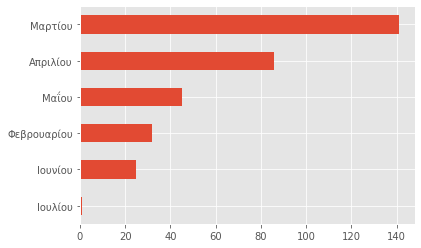

In [188]:
POLEMOS['Month'].value_counts().head(10).sort_values().plot(kind='barh')

In [189]:
ΟΥΚΡΑΝΙΑ= zel[zel['Keywords']=='ΟΥΚΡΑΝΙΑ']
ΟΥΚΡΑΝΙΑ

Title  \
9    Ζελένσκι: Μέσω τηλεδιάσκεψης θα συμμετάσχει στ...   
10         Τηλεφωνική επικοινωνία Μητσοτάκη - Ζελένσκι   
30   Ζελένσκι: "Η Ουκρανία θα αποκτήσει σύντομα καθ...   
31   Ουκρανία: Νέο πακέτο στρατιωτικής βοήθειας από...   
53   Ουκρανία: Ο Ζελένσκι απορρίπτει την πρόταση Μα...   
67   Ο μακρύς πόλεμος του Πούτιν και η αγωνία για τ...   
69   Ζελένσκι: Για 105 χιλιάδες ευρώ πωλήθηκε σε δη...   
73   Ουκρανία:  "Συγκλονισμένος" ο Γκουτέρες από τη...   
93   Ουκρανία: Στο Κίεβο η Νάνσι Πελόσι - Συναντήθη...   
121  Πούτιν: "Απρόβλεπτη η Ουκρανία στις συνομιλίες...   
142  Μήνυμα Ζελένσκι για τις 50 ημέρες πολέμου: "Οι...   
158  Πόλεμος στην Ουκρανία: Αιματοχυσία δίχως τέλος...   
212  Ζελένσκι: "Η Ρωσία είναι αυτή που χρειάζεται α...   
304  Ευρωπαίοι πολιτικοί προτείνουν τον Ζελένσκι κα...   
324  Ζελένσκι: "Η πόρτα του ΝΑΤΟ δεν είναι ανοιχτή ...   
350  Ουκρανία: Δεν εγκαταλείπουν το Κίεβο ο πρόεδρο...   
362  Ευθύνες Γιανουκόβιτς σε Ζελένσκι: "Σταμάτα την...   
443  Ουκρανία: Κάτοικοι στο Κίεβο - "Ελπίζουμε οι Ε...   

                                                   URL  \
9    https://www.news247.gr/kosmos/zelenski-meso-ti...   
10   https://www.news247.gr/politiki/tilefoniki-epi...   
30   https://www.news247.gr/kosmos/zelenski-i-oykra...   
31   https://www.news247.gr/kosmos/oykrania-neo-pak...   
53   https://www.news247.gr/incoming/oykrania-o-zel...   
67   https://www.news247.gr/kosmos/o-makrys-polemos...   
69   https://www.news247.gr/kosmos/zelenski-gia-100...   
73   https://www.news247.gr/kosmos/oykrania-sygklon...   
93   https://www.news247.gr/kosmos/oykrania-sto-kie...   
121  https://www.news247.gr/kosmos/sarl-misel-ekkli...   
142  https://www.news247.gr/kosmos/minyma-zelenski-...   
158  https://www.news247.gr/kosmos/polemos-stin-oyk...   
212  https://www.news247.gr/kosmos/zelenski-i-rosia...   
304  https://www.news247.gr/kosmos/eyropaioi-politi...   
324  https://www.news247.gr/kosmos/zelenski-zita-eg...   
350  https://www.news247.gr/kosmos/oykrania-den-egk...   
362  https://www.news247.gr/kosmos/eythynes-gianoyk...   
443  https://www.news247.gr/kosmos/oykrania-katoiko...   

                                                  text  Keywords  \
9    Στην επερχόμενη Σύνοδο Κορυφής του ΝΑΤΟ στη Μα...  ΟΥΚΡΑΝΙΑ   
10   Ο πρωθυπουργός εξέφρασε στον Ουκρανό πρόεδρο τ...  ΟΥΚΡΑΝΙΑ   
30   Το Κίεβο ευελπιστεί ότι οι 27 της Ευρωπαϊκής Έ...  ΟΥΚΡΑΝΙΑ   
31   Νέο πακέτο στρατιωτικής βοήθειας θα σταλεί από...  ΟΥΚΡΑΝΙΑ   
53   Ως αχρείαστο συμβιβασμό απέρριψε την πρόταση Μ...  ΟΥΚΡΑΝΙΑ   
67   Ο πόλεμος δεν θα λήξει ούτε εύκολα για τον Πού...  ΟΥΚΡΑΝΙΑ   
69   Η ουκρανική πρεσβεία στο Λονδίνο, σε συνεννόησ...  ΟΥΚΡΑΝΙΑ   
73   Τον αποτροπιασμό του για την είδηση ότι 60 άμα...  ΟΥΚΡΑΝΙΑ   
93   Επίσκεψη στην Ουκρανία από την πρόεδρο της Βου...  ΟΥΚΡΑΝΙΑ   
121  Ο Πούτιν επέρριψε ευθύνες στην Ουκρανία για τι...  ΟΥΚΡΑΝΙΑ   
142  Ο Βολοντίμιρ Ζελένσκι δήλωσε σίγουρος για την ...  ΟΥΚΡΑΝΙΑ   
158  Την ώρα που οι Ρώσοι μοιάζουν αποφασισμένοι να...  ΟΥΚΡΑΝΙΑ   
212  Στην αντεπίθεση πέρασε ο Βολοντίμιρ Ζελένσκι ο...  ΟΥΚΡΑΝΙΑ   
304  Την υποψηφιότητα του Βολοντίμιρ Ζελένσκι και τ...  ΟΥΚΡΑΝΙΑ   
324  Για μία ακόμη φορά ο Βολοντίμιρ Ζελένσκι ζήτησ...  ΟΥΚΡΑΝΙΑ   
350  Διαψεύδονται οι πληροφορίες σύμφωνα με τις οπο...  ΟΥΚΡΑΝΙΑ   
362  Ο πρώην Πρόεδρος της Ουκρανίας κατηγορεί τον ν...  ΟΥΚΡΑΝΙΑ   
443  Τις ανησυχίες τους και τους φόβους τους μετά τ...  ΟΥΚΡΑΝΙΑ   

                    created_at        Month Day   Time                Date  \
9        23 Ιουνίου 2022 01:39      Ιουνίου  23  01:39 2022-06-23 01:39:00   
10       22 Ιουνίου 2022 13:25      Ιουνίου  22  13:25 2022-06-22 13:25:00   
30       07 Ιουνίου 2022 07:47      Ιουνίου  07  07:47 2022-06-07 07:47:00   
31       07 Ιουνίου 2022 00:41      Ιουνίου  07  00:41 2022-06-07 00:41:00   
53         21 Μαΐου 2022 20:19        Μαΐου  21  20:19 2022-05-21 20:19:00   
67         11 Μαΐου 2022 14:57        Μαΐου  11  14:57 2022-05-11 14:57:00   
69  

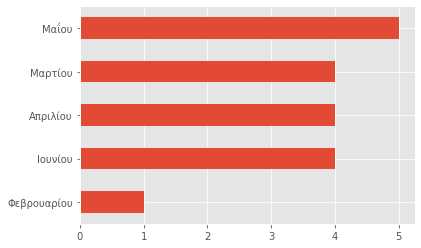

In [190]:
ΟΥΚΡΑΝΙΑ['Month'].value_counts().head(10).sort_values().plot(kind='barh')

In [191]:
zel['text'] = zel ['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


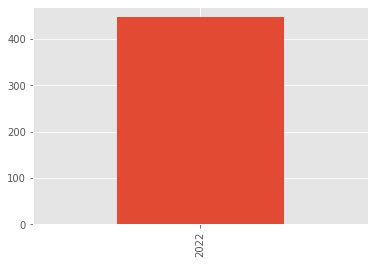

In [192]:
zel['Year'].value_counts().plot(kind='bar')

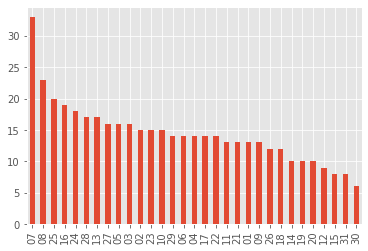

In [193]:
zel['Day'].value_counts().plot(kind='bar')

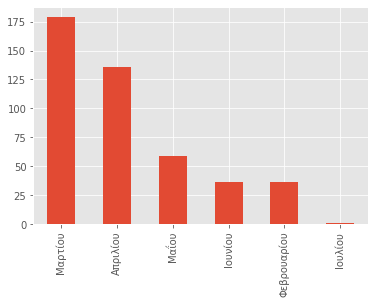

In [194]:
zel['Month'].value_counts().plot(kind='bar')

In [195]:
Keywords_data = zel.groupby(['Keywords']).count()['Title'].sort_values(ascending=False)


day_data = zel.groupby(['Day']).count()['Keywords']
(day_data,Keywords_data)

(Day
 01    13
 02    15
 03    16
 04    14
 05    16
 06    14
 07    33
 08    23
 09    13
 10    15
 11    13
 12     9
 13    17
 14    10
 15     8
 16    19
 17    14
 18    12
 19    10
 20    10
 21    13
 22    14
 23    15
 24    18
 25    20
 26    12
 27    16
 28    17
 29    14
 30     6
 31     8
 Name: Keywords, dtype: int64, Keywords
 ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ       330
 ΒΟΛΟΝΤΙΜΙΡ ΖΕΛΕΝΣΚΙ          37
 ΟΥΚΡΑΝΙΑ                     18
 ΝΑΤΟ                          6
 ΒΟΥΛΗ                         6
 ΡΩΣΙΑ                         6
 ΛΑΚΗΣ ΛΑΖΟΠΟΥΛΟΣ PODCAST      4
 ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ           3
 Κ.Κ.Ε                         2
 ΜΕΡΑ25                        2
 ΝΙΚΟΣ ΔΕΝΔΙΑΣ                 2
 ΚΥΠΡΟΣ                        2
 ΚΥΒΕΡΝΗΣΗ                     2
 ΟΣΚΑΡ 2022                    2
 ΟΛΛΑΝΔΙΑ                      1
 ΟΗΕ                           1
 ΝΙΚΟΣ ΑΝΔΡΟΥΛΑΚΗΣ             1
 ΟΥΓΓΑΡΙΑ                      1
 ΟΥΡΣΟΥΛΑ ΦΟΝ ΝΤΕΡ ΛΑΙΕΝ       1
 ΝΟΝΗ ΔΟΥΝΙΑ      

In [196]:
Keywords_data.head(13)
keywords_data = Keywords_data.head(13)
keywords_data


Keywords
ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ       330
ΒΟΛΟΝΤΙΜΙΡ ΖΕΛΕΝΣΚΙ          37
ΟΥΚΡΑΝΙΑ                     18
ΝΑΤΟ                          6
ΒΟΥΛΗ                         6
ΡΩΣΙΑ                         6
ΛΑΚΗΣ ΛΑΖΟΠΟΥΛΟΣ PODCAST      4
ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ           3
Κ.Κ.Ε                         2
ΜΕΡΑ25                        2
ΝΙΚΟΣ ΔΕΝΔΙΑΣ                 2
ΚΥΠΡΟΣ                        2
ΚΥΒΕΡΝΗΣΗ                     2
Name: Title, dtype: int64

In [197]:
day_data.head(31)
Day_data = day_data.head(31)
Day_data


Day
01    13
02    15
03    16
04    14
05    16
06    14
07    33
08    23
09    13
10    15
11    13
12     9
13    17
14    10
15     8
16    19
17    14
18    12
19    10
20    10
21    13
22    14
23    15
24    18
25    20
26    12
27    16
28    17
29    14
30     6
31     8
Name: Keywords, dtype: int64

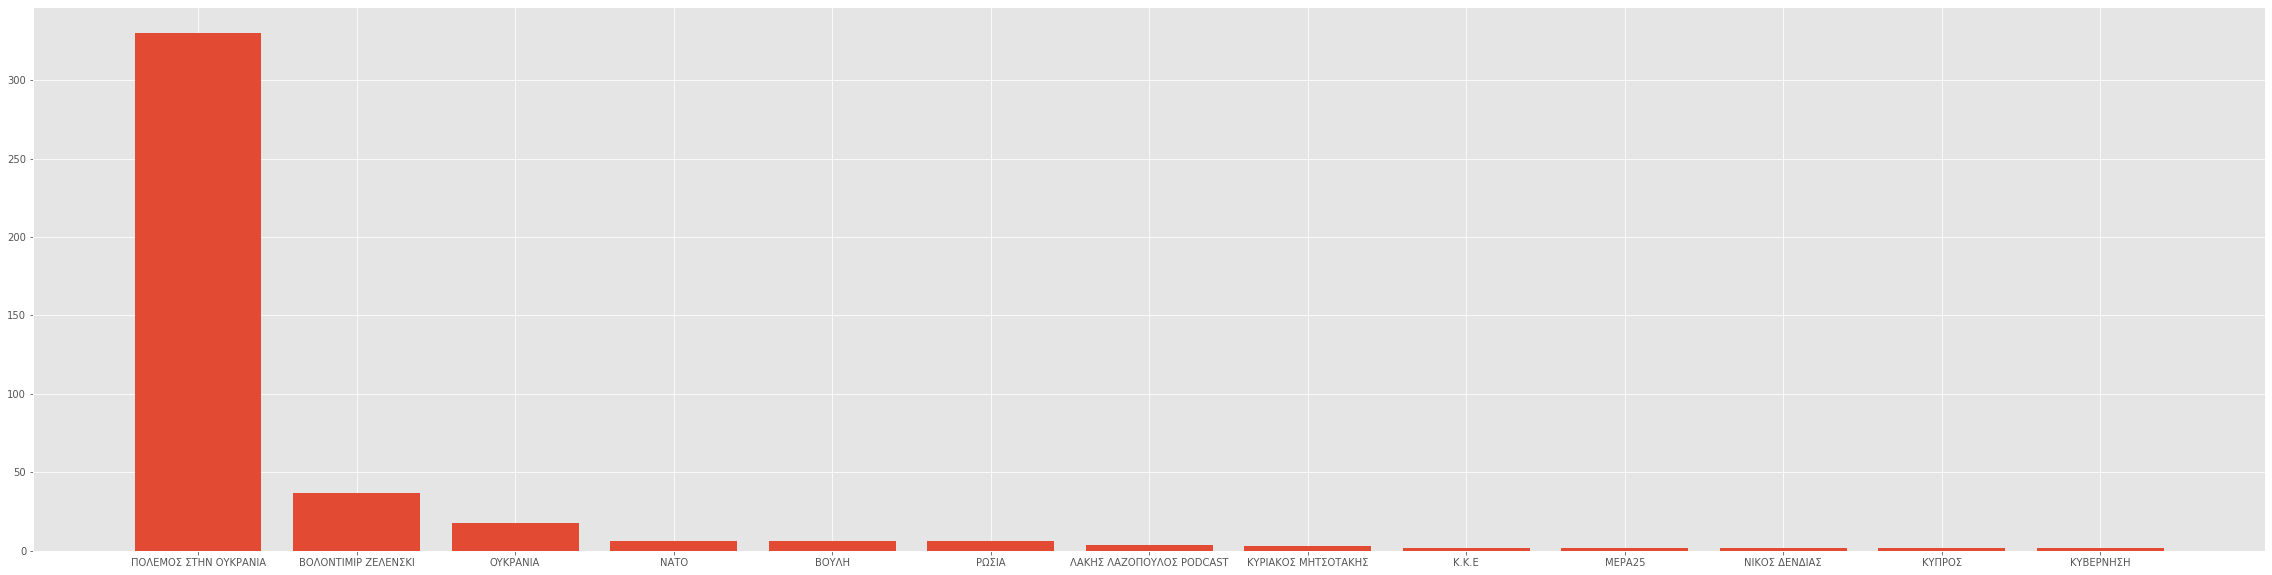

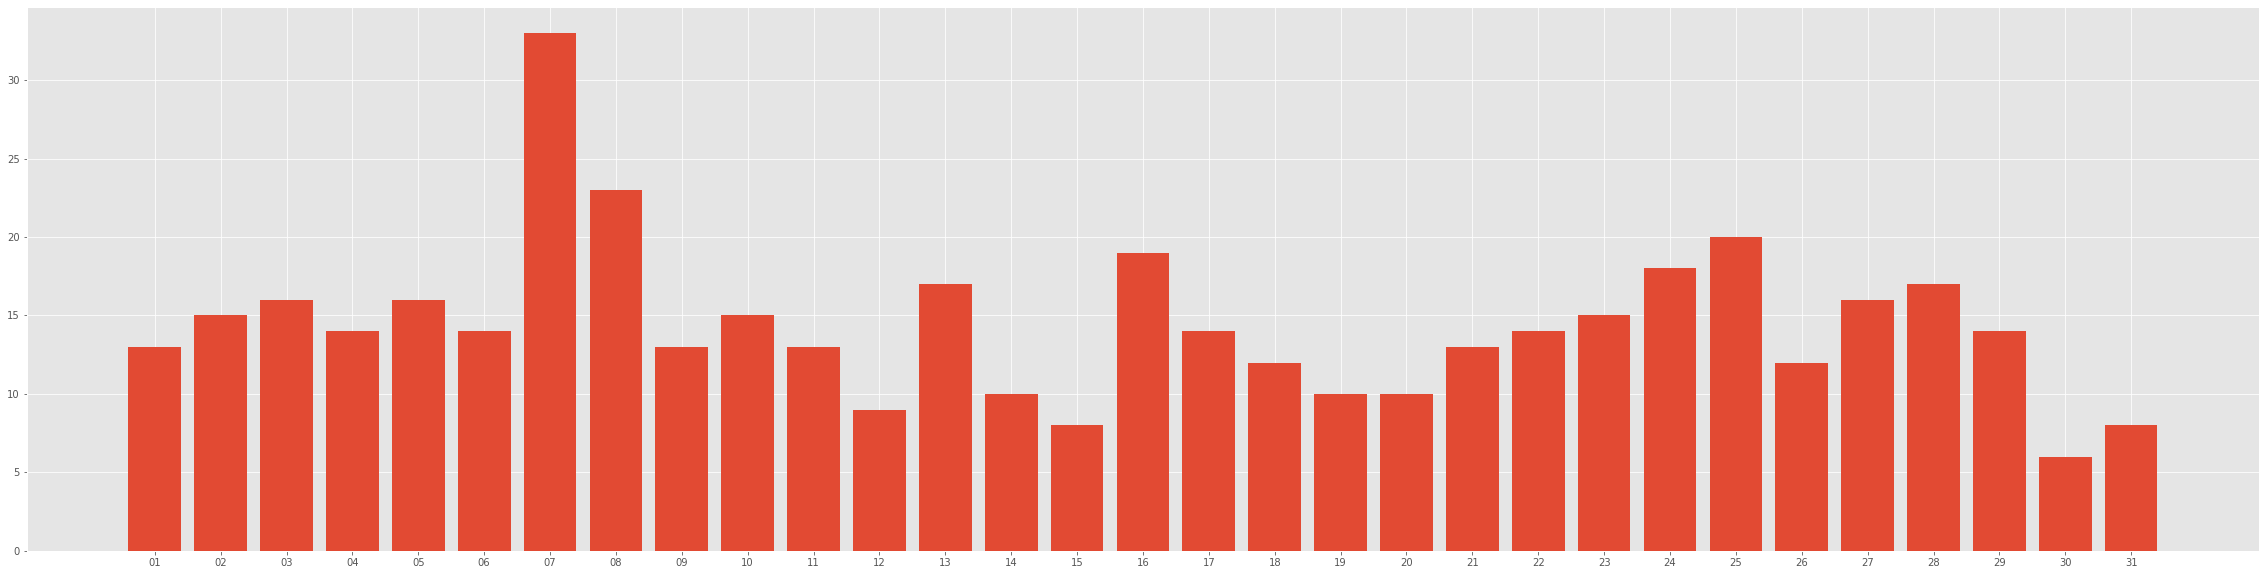

In [198]:
plt.figure(figsize=(40,10))
plt.bar(keywords_data.keys(),keywords_data,)
plt.show()

plt.figure(figsize=(40,10))
plt.bar(Day_data.keys(),Day_data,)
plt.show()

# Wordcloud Zelenski

In [199]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
import spacy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [200]:
!python -m spacy download el_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 7.7 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [201]:
nlp = spacy.load('el_core_news_sm')
list(nlp.Defaults.stop_words)[0:20]

['κάποιας',
 'πια',
 'στην',
 'εκείνοι',
 'κάμποσον',
 'τόσου',
 'κανείς',
 'ολότελα',
 'ιδίως',
 'εναντίον',
 'οποιαδήποτε',
 'πολύ',
 'πουθενά',
 'εκεί',
 'πρώτη',
 'άλλον',
 'μείον',
 'πάρα',
 'ήταν',
 'ίσως']

In [202]:
#list(STOPWORDS)[0:20]

In [203]:
text = zel['text'].str.cat(sep = '.').replace('.','').strip()
text = text.replace('amp','').strip()
text = text.replace('rt','').strip()
text = text.replace('\n','').strip()
text = text.replace(':','').strip()
text

'Ο Ζελένσκι διατείνεται ότι το ρωσικό πυραυλικό πλήγμα σε πολυκατοικία στην περιφέρεια της Οδησσού, που είχε ως αποτέλεσμα να σκοτωθούν τουλάχιστον 21 άνθρωποι, δεν ήταν ατύχημα, αλλά μια στοχευμένη επίθεση κατά αμάχωνΗ Ουκρανία προχώρησε σε διακοπή των διπλωματικών της σχέσεων με τη Συρία αφού η τελευταία αναγνώρισε ανεξαρτησία στις επαρχίες του Ντονέσκ και του ΛουχάνσκΤο "πράσινο φως" της Τουρκίας δίνει "ισχυρή ώθηση" στην ενότητα της Δύσης, δηλώνει η Ουάσινγκτον Σε εγρήγορση η Αθήνα για απάντηση σε κάθε τουρκική αιτίασηΑπευθυνόμενος στο Συμβούλιο Ασφαλείας του ΟΗΕ, ο πρόεδρος της Ουκρανίας Βολοντίμιρ Ζελένσκι απαίτησε να εκδιωχθεί η Ρωσία από τις τάξεις του Οργανισμού όσο συνεχίζει την τρομοκρατία εναντίον αμάχωνΟ εκπρόσωπος του Βλαντίμιρ Πούτιν τόνισε πως η επίθεση θα τελειώσει όταν η Ουκρανία εφαρμόσει όλους τους όρους που έχουν τεθεί από τη ΡωσίαΡωσική πυραυλική επίθεση σε εμπορικό κέντρο της κεντρικής Ουκρανίας την ώρα που πάνω από 1000 άνθρωποι βρίσκονταν μέσα σε αυτό "Αδύνατο 

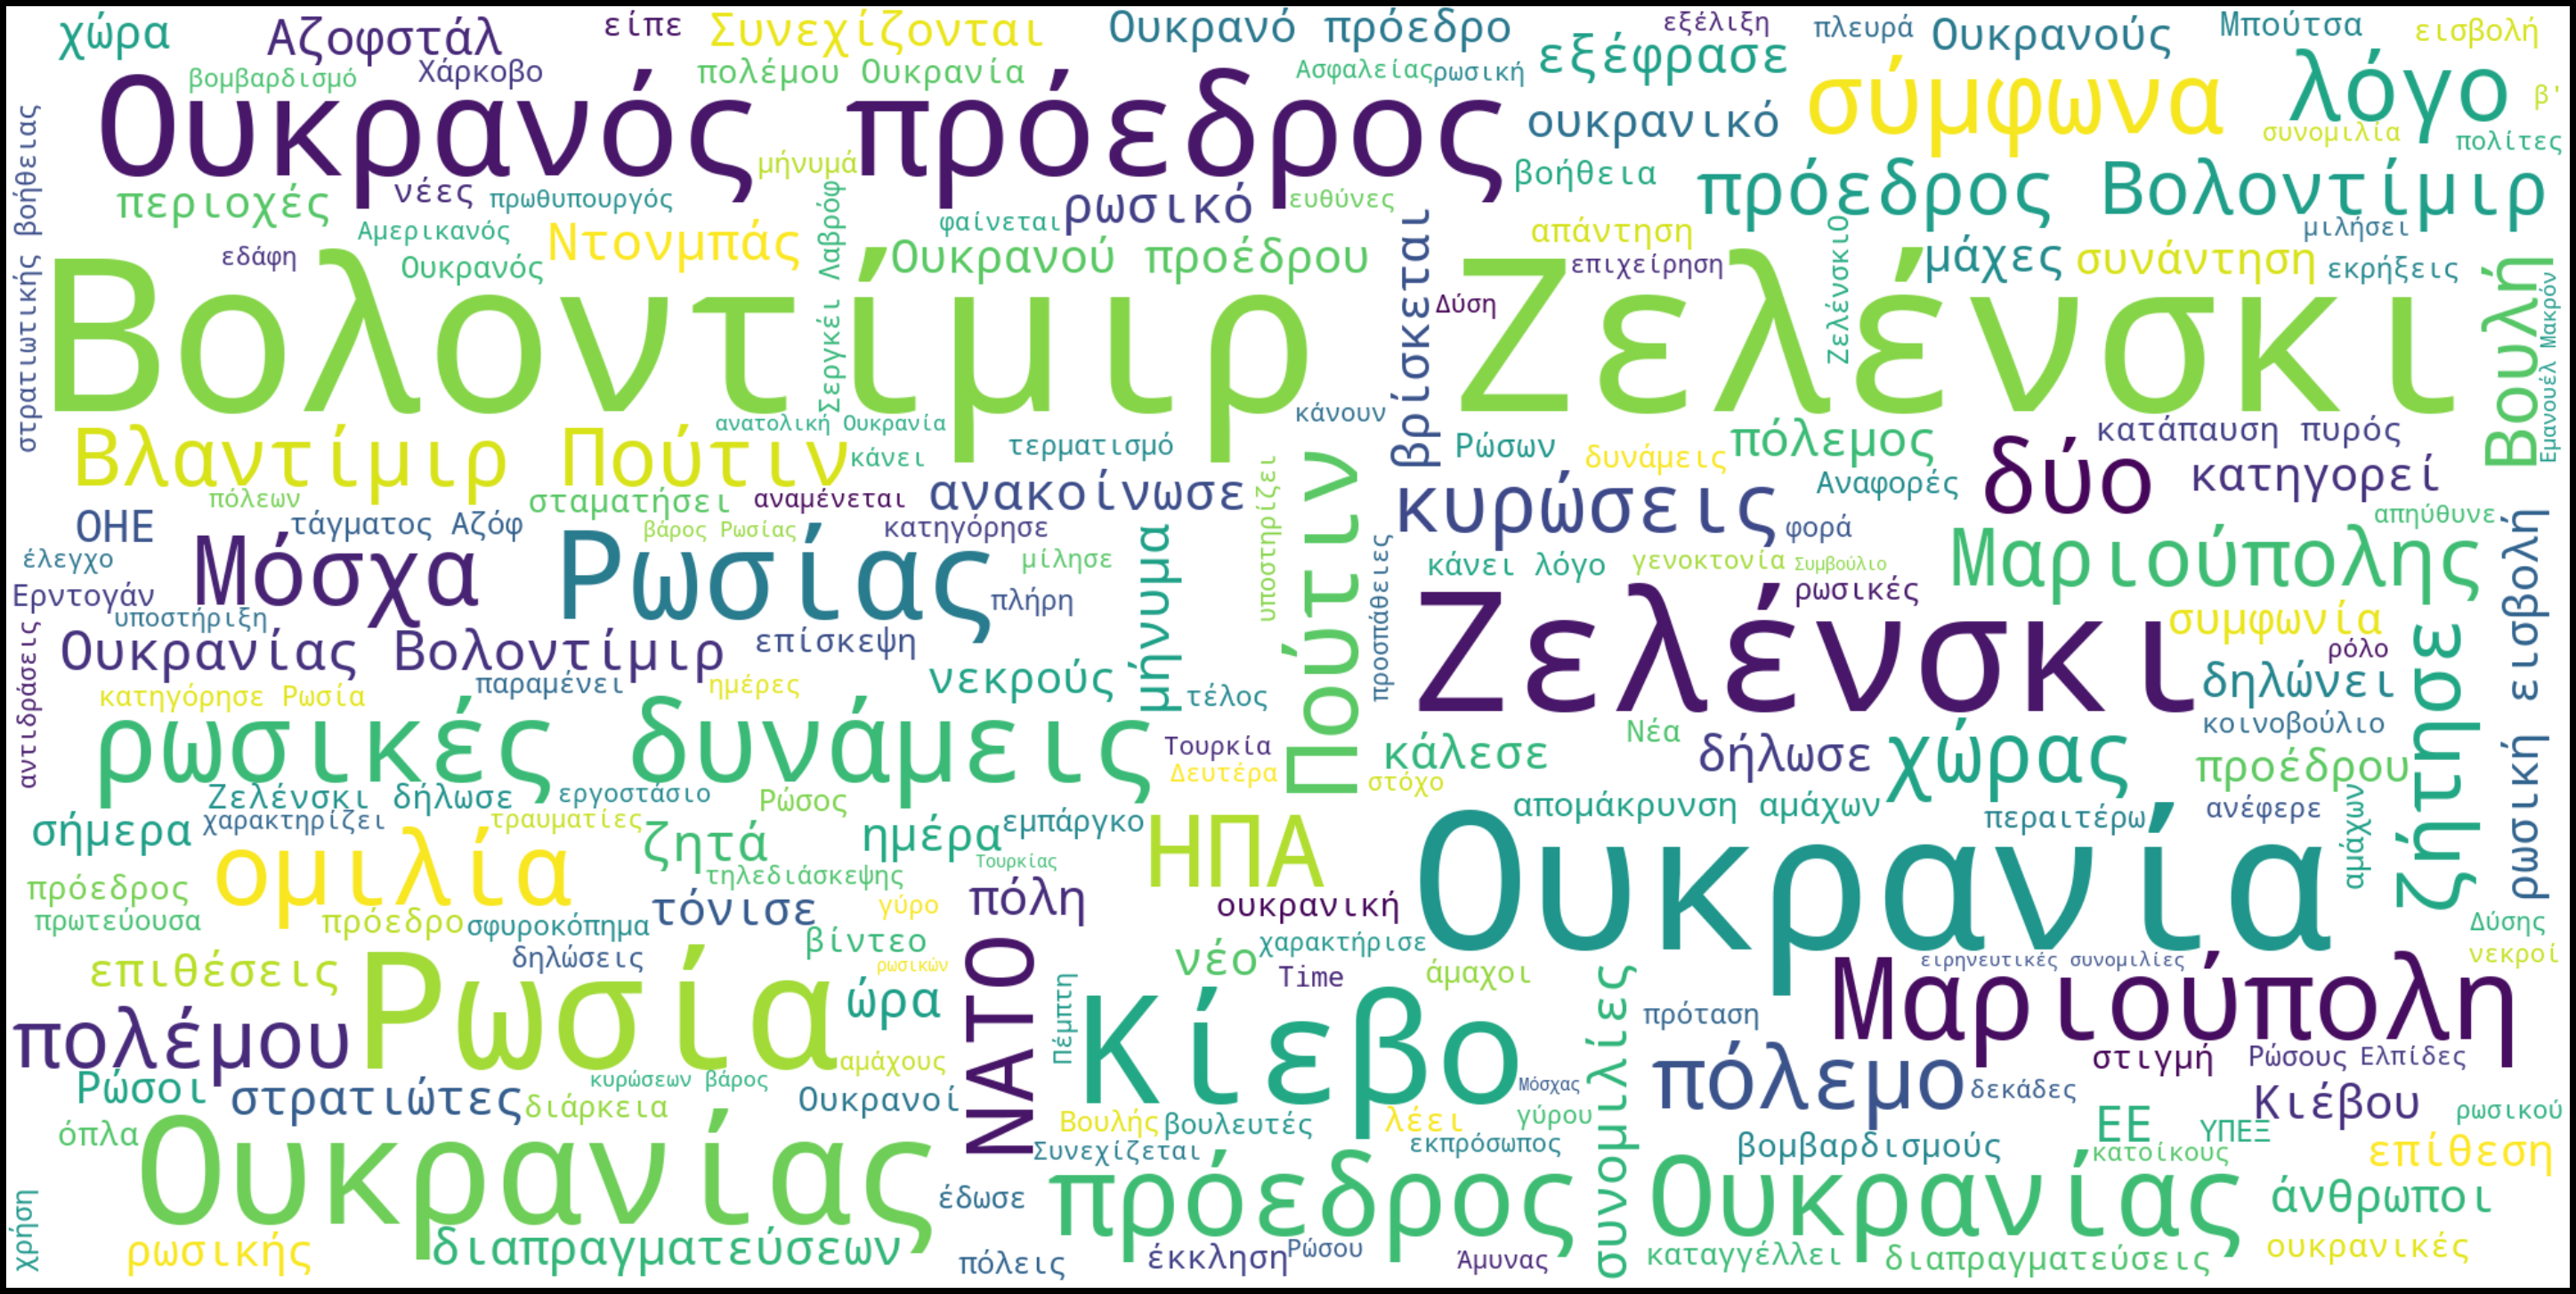

In [204]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [205]:
word_count = Counter(" ".join(zel["text"]).split())
word_count = {word.lower() : count for word, count in word_count.items() if not word.lower() in STOPWORDS}
word_count = pd.DataFrame(data={
    'word': word_count.keys(),
    'count': word_count.values()
})

word_count.sort_values('count',ascending=False).head(15)

word  count
48          του    303
12          της    301
0             ο    211
50          και    208
1      ζελένσκι    126
32            η    124
36          των    120
76   βολοντίμιρ    120
3           ότι     61
33     ουκρανία     57
188   ζελένσκι.     53
75    ουκρανίας     52
79        ρωσία     47
93          πως     44
160          τα     42

In [207]:
from collections import Counter
Counter(" ".join(zel["text"]).split()).most_common(16)

[('του', 303),
 ('της', 301),
 ('να', 228),
 ('για', 217),
 ('την', 215),
 ('ο', 211),
 ('και', 208),
 ('το', 159),
 ('με', 156),
 ('τον', 150),
 ('στην', 149),
 ('από', 144),
 ('τη', 137),
 ('Ζελένσκι', 126),
 ('η', 124),
 ('των', 120)]

In [208]:
for word in nlp.Defaults.stop_words:
  print(word)
  break

κάποιας


In [209]:
zel['text_no_stopwords'] = zel['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words) and word != ':' and word != '\n' and word != "amp" and word != 'rt' and word != ',']))
zel['text_no_stopwords'] = zel['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words)]))
zel['clean_text_no_stopwords'] = zel['text']
#for stopword in nlp.Defaults.stop_words:
zel['clean_text_no_stopwords'] = zel['clean_text_no_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in nlp.Defaults.stop_words and word != "ή" and word != "ία" and word != "κι"]))
zel['clean_text_no_stopwords'] = zel['clean_text_no_stopwords'].apply(lambda x: x.replace("amp", "").strip())
zel['clean_text_no_stopwords'] = zel['clean_text_no_stopwords'].apply(lambda x: x.replace("rt", "").strip())
zel['clean_text_no_stopwords'] = zel['clean_text_no_stopwords'].apply(lambda x: x.replace(":", "").strip())
zel['clean_text_no_stopwords'] = zel['clean_text_no_stopwords'].apply(lambda x: x.replace(",", "").strip())
zel['clean_text_no_stopwords'] = zel['clean_text_no_stopwords'].apply(lambda x: x.replace("\n", "").strip())
zel['clean_text_no_stopwords'] = zel['clean_text_no_stopwords'].apply(lambda x: x.replace(".", "").strip())

In [210]:
freq = Counter(" ".join(zel["clean_text_no_stopwords"]).split()).most_common(16)
freq

[('Ζελένσκι', 200),
 ('Βολοντίμιρ', 120),
 ('Ουκρανία', 116),
 ('Ο', 115),
 ('πρόεδρος', 94),
 ('Ουκρανίας', 91),
 ('Ρωσία', 78),
 ('Κίεβο', 59),
 ('Η', 51),
 ('Ουκρανός', 45),
 ('Ρωσίας', 44),
 ('Πούτιν', 43),
 ('δυνάμεις', 36),
 ('Μαριούπολη', 36),
 ('ρωσικές', 33),
 ('Οι', 28)]

In [211]:
import numpy as np


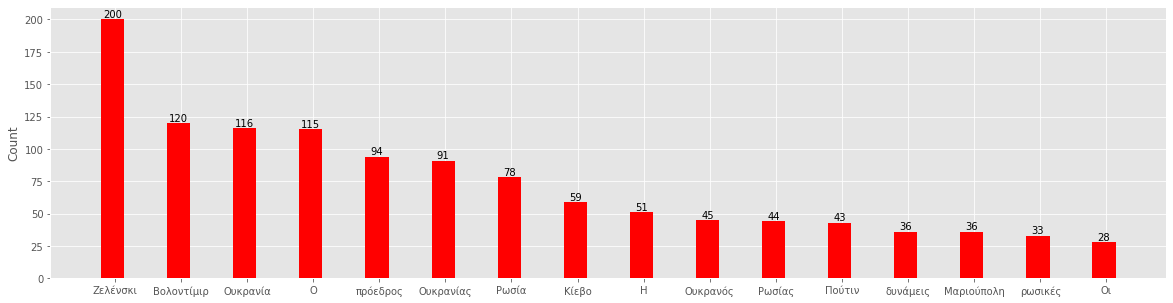

In [212]:
names, values = zip(*freq)
# names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
# values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(freq))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(ind, values, width, color='r')
# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/10.)
ax.set_xticklabels(names)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

In [213]:
zel.resample(rule='D',on='Date').count()

Title  URL  text  Keywords  created_at  Month  Day  Time  Date  \
Date                                                                         
2022-02-24      5    5     5         5           5      5    5     5     5   
2022-02-25     14   14    14        14          14     14   14    14    14   
2022-02-26      6    6     6         6           6      6    6     6     6   
2022-02-27      5    5     5         5           5      5    5     5     5   
2022-02-28      6    6     6         6           6      6    6     6     6   
...           ...  ...   ...       ...         ...    ...  ...   ...   ...   
2022-06-28      1    1     1         1           1      1    1     1     1   
2022-06-29      3    3     3         3           3      3    3     3     3   
2022-06-30      0    0     0         0           0      0    0     0     0   
2022-07-01      0    0     0         0           0      0    0     0     0   
2022-07-02      1    1     1         1           1      1    1     1     1   

            Year  text_no_stopwords  clean_text_no_stopwords  
Date                                                          
2022-02-24     5                  5                        5  
2022-02-25    14                 14                       14  
2022-02-26     6                  6                        6  
2022-02-27     5                  5                        5  
2022-02-28     6                  6                        6  
...          ...                ...                      ...  
2022-06-28     1                  1                        1  
2022-06-29     3                  3                        3  
2022-06-30     0                  0                        0  
2022-07-01     0                  0                        0  
2022-07-02     1                  1                        1  

[129 rows x 12 columns]

# Vectorizing Zelenski

In [214]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [216]:
count_vector = cv.fit_transform(zel['text'])

In [217]:
count_vector.shape

(447, 2847)

In [218]:
cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


000  03  10  100  100ή  100η  11  11ης  12η  130  ...  όστιν  όταν  ότι  \
0    0   0   0    0     0     0   0     0    0    0  ...      0     0    1   
1    0   0   0    0     0     0   0     0    0    0  ...      0     0    0   
2    0   0   0    0     0     0   0     0    0    0  ...      0     0    0   
3    0   0   0    0     0     0   0     0    0    0  ...      0     0    0   
4    0   0   0    0     0     0   0     0    0    0  ...      0     1    0   

   όχι  ύστερα  ύψους  ώθηση  ώρα  ώρες  ώστε  
0    0       0      0      0    0     0     0  
1    0       0      0      0    0     0     0  
2    0       0      0      1    0     0     0  
3    0       0      0      0    0     0     0  
4    0       0      0      0    0     0     0  

[5 rows x 2847 columns]

In [219]:
#cv.vocabulary_

In [220]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [222]:
count_vector = cv.fit_transform(zel['text'])

In [223]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


000  άμαχοι  άμυνας  άνθρωποι  έδωσε  έκκληση  έλεγχο  ένταξη  αζοφστάλ  \
0    0       0       0         1      0        0       0       0         0   
1    0       0       0         0      0        0       0       0         0   
2    0       0       0         0      0        0       0       0         0   
3    0       0       0         0      0        0       0       0         0   
4    0       0       0         0      0        0       0       0         0   

   αζόφ  ...  χάρκοβο  χαρακτήρισε  χαρακτηρίζει  χιλιάδες  χρήση  χώρα  \
0     0  ...        0            0             0         0      0     0   
1     0  ...        0            0             0         0      0     0   
2     0  ...        0            0             0         0      0     0   
3     0  ...        0            0             0         0      0     0   
4     0  ...        0            0             0         0      0     0   

   χώρας  όπλα  όπλων  ώρα  
0      0     0      0    0  
1      0     0      0    0  
2      0     0      0    0  
3      0     0      0    0  
4      0     0      0    0  

[5 rows x 226 columns]

In [224]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [225]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(zel['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκασε ο', 'έτερα', 'έτερων', 'ήσω', 'ίσιος', 'αλλιώ', 'αλλιώτικος', 'αλλοιώ', 'αρκετός', 'γίνομαι', 'γρήγορο', 'διο', 'είχος', 'εαυτής', 'εαυτός', 'εκάστος', 'επόμενος', 'εσένος', 'ετέραις', 'ετού', 'ετούε ο', 'εχτής', 'ιδίο', 'κάνενς', 'κάνω', 'κανενό', 'λοιπός', 'μέλλω', 'μερικός', 'μπορώ', 'μόνας', 'ολωσδιόλος', 'ορισμένος', 'οριόμενσς', 'ποία', 'πολύς', 'προτός', 'προχτής', 'σε ο', 'ταύ', 'τουλάχισε ο', 'τρίτος', 'τός', 'χωριστό'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Αμερικανός  ΗΠΑ  Κίεβο  ΟΗΕ  Ρωσία  άμαχος  άμυνα  άνθρωπος  έκκληση  \
0           0    0      0    0      0       0      0         1        0   
1           0    0      0    0      0       0      0         0        0   
2           0    0      0    0      0       0      0         0        0   
3           0    0      0    1      1       0      0         0        0   
4           0    0      0    0      1       0      0         0        0   

   έλεγχος  ...  φόβος  χάνω  χάρκοβο  χέρι  χαρακτηρίζω  χιλιάδα  χρήση  \
0        0  ...      0     0        0     0            0        0      0   
1        0  ...      0     0        0     0            0        0      0   
2        0  ...      0     0        0     0            0        0      0   
3        0  ...      0     0        0     0            0        0      0   
4        0  ...      0     0        0     0            0        0      0   

   χώρα  όπλο  ώρα  
0     0     0    0  
1     0     0    0  
2     0     0    0  
3     0     0    0  
4     0     0    0  

[5 rows x 232 columns]

In [226]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(zel['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


βολοντίμιρ  δυνάμεις  δύο  ζελένσκι  ηπα  κίεβο  λόγο  μαριούπολη  μόσχα  \
0           0         0    0         1    0      0     0           0      0   
1           0         0    0         0    0      0     0           0      0   
2           0         0    0         0    0      0     0           0      0   
3           1         0    0         1    0      0     0           0      0   
4           0         0    0         0    0      0     0           0      0   

   ομιλία  ουκρανία  ουκρανίας  ουκρανός  πολέμου  πούτιν  πρόεδρος  ρωσία  \
0       0         0          0         0        0       0         0      0   
1       0         1          0         0        0       0         0      0   
2       0         0          0         0        0       0         0      0   
3       0         0          1         0        0       0         1      1   
4       0         1          0         0        0       1         0      1   

   ρωσίας  ρωσικές  σύμφωνα  
0       0        0        0  
1       0        0        0  
2       0        0        0  
3       0        0        0  
4       0        0        0

In [227]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bουκ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(zel['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ουκρανία  ουκρανίας  ουκρανικά  ουκρανικές  ουκρανική  ουκρανικής  \
0         0          0          0           0          0           0   
1         1          0          0           0          0           0   
2         0          0          0           0          0           0   
3         0          1          0           0          0           0   
4         1          0          0           0          0           0   

   ουκρανικού  ουκρανικό  ουκρανικών  ουκρανοί  ουκρανού  ουκρανούς  ουκρανό  \
0           0          0           0         0         0          0        0   
1           0          0           0         0         0          0        0   
2           0          0           0         0         0          0        0   
3           0          0           0         0         0          0        0   
4           0          0           0         0         0          0        0   

   ουκρανός  ουκρανών  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0

In [228]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bουκ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(zel['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


απομάκρυνση αμάχων  βλαντίμιρ πούτιν  βολοντίμιρ ζελένσκι  ζελένσκι δήλωσε  \
0                   0                 0                    0                0   
1                   0                 0                    0                0   
2                   0                 0                    0                0   
3                   0                 0                    1                0   
4                   0                 1                    0                0   

   κάνει λόγο  κατάπαυση πυρός  ομιλία ζελένσκι  ουκρανίας βολοντίμιρ  \
0           0                0                0                     0   
1           0                0                0                     0   
2           0                0                0                     0   
3           0                0                0                     1   
4           0                0                0                     0   

   ουκρανού προέδρου  ουκρανό πρόεδρο  ουκρανός πρόεδρος  πολέμου ουκρανία  \
0                  0                0                  0                 0   
1                  0                0                  0                 0   
2                  0                0                  0                 0   
3                  0                0                  0                 0   
4                  0                0                  0                 0   

   πρόεδρος βολοντίμιρ  πρόεδρος ουκρανίας  ρωσίας ουκρανίας  \
0                    0                   0                 0   
1                    0                   0                 0   
2                    0                   0                 0   
3                    0                   1                 0   
4                    0                   0                 0   

   ρωσικές δυνάμεις  ρωσική εισβολή  σεργκέι λαβρόφ  τάγματος αζόφ  \
0                 0               0               0              0   
1                 0               0               0              0   
2                 0               0               0              0   
3                 0               0               0              0   
4                 0               0               0              0   

   τερματισμό πολέμου  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [229]:
results.sum(axis =0).sort_values(ascending = False)

βολοντίμιρ ζελένσκι     118
ουκρανός πρόεδρος        46
ρωσικές δυνάμεις         29
πρόεδρος ουκρανίας       27
βλαντίμιρ πούτιν         16
πρόεδρος βολοντίμιρ      14
ουκρανίας βολοντίμιρ     13
κατάπαυση πυρός          11
ρωσική εισβολή           10
ουκρανού προέδρου        10
ουκρανό πρόεδρο          10
απομάκρυνση αμάχων        9
πολέμου ουκρανία          8
ομιλία ζελένσκι           8
ρωσίας ουκρανίας          8
ζελένσκι δήλωσε           8
τάγματος αζόφ             8
κάνει λόγο                7
τερματισμό πολέμου        7
σεργκέι λαβρόφ            6
dtype: int64

In [230]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

βολοντίμιρ ζελένσκι    118
ουκρανός πρόεδρος       46
ρωσικές δυνάμεις        29
πρόεδρος ουκρανίας      27
βλαντίμιρ πούτιν        16
dtype: int64

In [234]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bουκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bk[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(zel['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


kalush
0       0
1       0
2       0
3       0
4       0

In [235]:
results.sum(axis =0).sort_values(ascending = False)

kalush    1
dtype: int64

In [236]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['ουκρανια', 'ρωσια', 'πολεμος']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(zel['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ουκρανια  ρωσια  πολεμος
0         0      0        0
1         0      0        0
2         0      0        0
3         0      0        0
4         0      0        0

In [237]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [238]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(zel['text'])  #finds the tfidf score with normalization

In [239]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


000  100  200   60  azovstal  time  times  twitter  άμαχοι  άμεση  ...  \
0  0.0  0.0  0.0  0.0       0.0   0.0    0.0      0.0     0.0    0.0  ...   
1  0.0  0.0  0.0  0.0       0.0   0.0    0.0      0.0     0.0    0.0  ...   
2  0.0  0.0  0.0  0.0       0.0   0.0    0.0      0.0     0.0    0.0  ...   
3  0.0  0.0  0.0  0.0       0.0   0.0    0.0      0.0     0.0    0.0  ...   
4  0.0  0.0  0.0  0.0       0.0   0.0    0.0      0.0     0.0    0.0  ...   

   χτυπήματα  χωρών  χώρα  χώρας  χώρες  χώρο  όπλα  όπλων  όρμπαν  ώρα  
0        0.0    0.0   0.0    0.0    0.0   0.0   0.0    0.0     0.0  0.0  
1        0.0    0.0   0.0    0.0    0.0   0.0   0.0    0.0     0.0  0.0  
2        0.0    0.0   0.0    0.0    0.0   0.0   0.0    0.0     0.0  0.0  
3        0.0    0.0   0.0    0.0    0.0   0.0   0.0    0.0     0.0  0.0  
4        0.0    0.0   0.0    0.0    0.0   0.0   0.0    0.0     0.0  0.0  

[5 rows x 500 columns]

In [240]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.         0.         0.20199793 0.20214465 0.40336945
  0.         0.02486071 0.         0.03217029 0.         0.
  0.02415333 0.         0.03470155 0.         0.         0.
  0.         0.         0.         0.         0.03721266 0.
  0.03193326 0.         0.20949549 0.         0.15903371 0.03846777
  0.         0.02669203 0.         0.02683939 0.13772758 0.02787166
  0.0214964  0.         0.02805279 0.         0.         0.14697377
  0.         0.         0.02404371 0.02556238 0.024052   0.13862905
  0.02618558 0.03114636 0.02038814 0.         0.         0.03133797
  0.03350085 0.21110027 0.         0.         0.         0.02406378
  0.11464728 0.         0.         0.13940142 0.04630744 0.
  0.14698349 0.         0.02814679 0.04318852 0.04413704 0.
  0.18434871 0.         0.         0.0285232  0.28081282 0.02116064
  0.03068598 0.02235215 0.         0.08952871 0.02757172 0.18836993
  0.         0.03645326 0.         0.         0.         0.02574882
 

In [241]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.         0.         ... 0.03565701 0.04298357 0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.03565701 0.         0.         ... 1.         0.12422135 0.        ]
 [0.04298357 0.         0.         ... 0.12422135 1.         0.05057948]
 [0.         0.         0.         ... 0.         0.05057948 1.        ]]


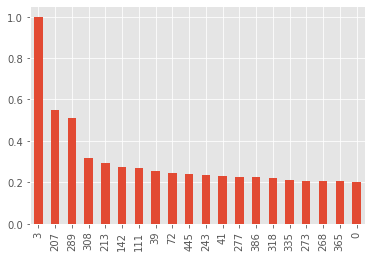

In [242]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [243]:
zel['text'].loc[3]

'Απευθυνόμενος στο Συμβούλιο Ασφαλείας του ΟΗΕ, ο πρόεδρος της Ουκρανίας Βολοντίμιρ Ζελένσκι απαίτησε να εκδιωχθεί η Ρωσία από τις τάξεις του Οργανισμού όσο συνεχίζει την τρομοκρατία εναντίον αμάχων.'

In [244]:
zel['text'].loc[253]

'Οι -δεύτερες- σκέψεις για εμφάνιση του Ουκρανού προέδρου στην τελετή έχουν εξοργίσει τον 61χρονο ηθοποιό και σκηνοθέτη. "Θα καταστρέψω τα βραβεία μου δημόσια".'

# Emolex Zelenski

In [245]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)
emolex_df

word  Positive  Negative  Anger  Anticipation  Disgust  \
0                αφεση       1.0       0.0    0.0           0.0      0.0   
1      ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   
2              εχοντας       0.0       0.0    0.0           0.0      0.0   
3                  εχω       0.0       0.0    0.0           0.0      0.0   
4                 οριο       0.0       0.0    0.0           0.0      0.0   
...                ...       ...       ...    ...           ...      ...   
13156        ουρλιασμα       0.0       1.0    1.0           0.0      0.0   
13157     κροκος αυγου       0.0       0.0    0.0           0.0      0.0   
13158         νεοτερος       1.0       0.0    0.0           0.0      0.0   
13159          ζεφυρος       0.0       0.0    0.0           0.0      0.0   
13160             ζουμ       0.0       0.0    0.0           0.0      0.0   

       Fear  Joy  Sadness  Surprise  Trust  
0       0.0  0.0      0.0       0.0    0.0  
1       0.0  0.0      0.0       0.0    0.0  
2       0.0  0.0      0.0       0.0    0.0  
3       0.0  0.0      0.0       0.0    0.0  
4       0.0  0.0      0.0       0.0    0.0  
...     ...  ...      ...       ...    ...  
13156   1.0  0.0      0.0       1.0    0.0  
13157   0.0  0.0      0.0       0.0    0.0  
13158   0.0  0.0      0.0       0.0    0.0  
13159   0.0  0.0      0.0       0.0    0.0  
13160   0.0  0.0      0.0       0.0    0.0  

[13161 rows x 11 columns]

In [246]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [247]:
zel = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/zelenski.tsv", sep='\t')
zel

Unnamed: 0                                              Title  \
0             0  Ζελένσκι: "Το ρωσικό πλήγμα στην Οδησσό ήταν σ...   
1             1  Η Ουκρανία διακόπτει τις διπλωματικές σχέσεις ...   
2             2  Σύνοδος ΝΑΤΟ: Τι πήρε ο "απομονωμένος" Ερντογά...   
3             3  Ζελένσκι: "Ο ΟΗΕ να απομακρύνει τη Ρωσία από τ...   
4             4  Κρεμλίνο: Θα σταματήσουμε την επίθεση όταν το ...   
..          ...                                                ...   
442         442  Πόλεμος στην Ουκρανία: Η Ρωσία κατακτά, το Κίε...   
443         443  Ουκρανία: Κάτοικοι στο Κίεβο - "Ελπίζουμε οι Ε...   
444         444  Πόλεμος στην Ουκρανία - Ζελένσκι: "Δεν ξέρω γι...   
445         445        Ζελένσκι, ένας κωμικός απέναντι στον Πούτιν   
446         446  Ζελένσκι: Η Ρωσία επιτέθηκε στην Ουκρανία όπως...   

                    created_at  \
0        02 Ιουλίου 2022 08:25   
1        29 Ιουνίου 2022 23:39   
2        29 Ιουνίου 2022 10:22   
3        29 Ιουνίου 2022 08:43   
4        28 Ιουνίου 2022 16:45   
..                         ...   
442  24 Φεβρουαρίου 2022 22:53   
443  24 Φεβρουαρίου 2022 22:12   
444  24 Φεβρουαρίου 2022 18:06   
445  24 Φεβρουαρίου 2022 15:21   
446  24 Φεβρουαρίου 2022 14:41   

                                                   URL  \
0    https://www.news247.gr/kosmos/zelenski-to-rosi...   
1    https://www.news247.gr/kosmos/i-oykrania-diako...   
2    https://www.news247.gr/kosmos/synodos-nato-ti-...   
3    https://www.news247.gr/kosmos/zelenski-o-oie-n...   
4    https://www.news247.gr/kosmos/kremlino-tha-sta...   
..                                                 ...   
442  https://www.news247.gr/kosmos/polemos-stin-oyk...   
443  https://www.news247.gr/kosmos/oykrania-katoiko...   
444  https://www.news247.gr/kosmos/polemos-stin-oyk...   
445  https://www.news247.gr/sunday-edition/zelenski...   
446  https://www.news247.gr/kosmos/zelenski-i-rosia...   

                                                  text             About_text  \
0    Ο Ζελένσκι διατείνεται ότι το ρωσικό πυραυλικό...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
1    Η Ουκρανία προχώρησε σε διακοπή των διπλωματικ...                  ΣΥΡΙΑ   
2    Το "πράσινο φως" της Τουρκίας δίνει "ισχυρή ώθ...                   ΝΑΤΟ   
3    Απευθυνόμενος στο Συμβούλιο Ασφαλείας του ΟΗΕ,...    ΒΟΛΟΝΤΙΜΙΡ ΖΕΛΕΝΣΚΙ   
4    Ο εκπρόσωπος του Βλαντίμιρ Πούτιν τόνισε πως η...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
..                                                 ...                    ...   
442  Η Ρωσία επελαύνει στα εδάφη της Ουκρανίας, έχο...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
443  Τις ανησυχίες τους και τους φόβους τους μετά τ...               ΟΥΚΡΑΝΙΑ   
444  Τους φόβους του για το μέλλον της Ουκρανίας, α...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
445  Το 2019 ο Βολοντίμιρ Ζελένσκι έκανε γυρίσματα ...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
446  Ο Ουκρανός πρόεδρος συνέκρινε την ρωσική εισβο...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   

     Year        Month  Day   Time                 Date  
0    2022      Ιουλίου    2  08:25  2022-07-02 08:25:00  
1    2022      Ιουνίου   29  23:39  2022-06-29 23:39:00  
2    2022      Ιουνίου   29  10:22  2022-06-29 10:22:00  
3    2022      Ιουνίου   29  08:43  2022-06-29 08:43:00  
4    2022      Ιουνίου   28  16:45  2022-06-28 16:45:00  
..    ...          ...  ...    ...                  ...  
442  2022  Φεβρουαρίου   24  22:53  2022-02-24 22:53:00  
443  2022  Φεβρουαρίου   24  22:12  2022-02-24 22:12:00  
444  2022  Φεβρουαρίου   24  18:06  2022-02-24 18:06:00  
445  2022  Φεβρουαρίου   24  15:21  2022-02-24 15:21:00  
446  2022  Φεβρουαρίου   24  14:41  2022-02-24 14:41:00  

[447 rows x 11 columns]

In [248]:
zel.dtypes

Unnamed: 0     int64
Title         object
created_at    object
URL           object
text          object
About_text    object
Year           int64
Month         object
Day            int64
Time          object
Date          object
dtype: object

In [249]:
zel['Year'] = zel.created_at.apply(lambda dt: dt.split(' ')[2])
zel['Month'] = zel.created_at.apply(lambda dt: dt.split(' ')[1])
zel['Day'] = zel.created_at.apply(lambda dt: dt.split(' ')[0])
zel['Time'] = zel.created_at.apply(lambda dt: dt.split(' ')[3])

months = {
    'Ιανουαρίου' : '01',
    'Φεβρουαρίου' : '02', 
    'Μαρτίου' : '03',
    'Απριλίου' : '04',
    'Μαΐου' : '05',
    'Ιουνίου': '06',
    'Ιουλίου' : '07',
    'Αυγούστου' : '08',
    'Σεπτεμβρίου' : '09',
    'Οκτωβρίου' : '10',
    'Νοεμβρίου' : '11',
    'Δεκεμβρίου' : '12',
     
}

zel['Date'] = zel.apply(lambda row: f'{months[row.Month]}/{row.Day}/{row.Year} {row.Time}', axis='columns',result_type='expand')
zel['Date'] = pd.to_datetime(zel['Date'])


zel

Unnamed: 0                                              Title  \
0             0  Ζελένσκι: "Το ρωσικό πλήγμα στην Οδησσό ήταν σ...   
1             1  Η Ουκρανία διακόπτει τις διπλωματικές σχέσεις ...   
2             2  Σύνοδος ΝΑΤΟ: Τι πήρε ο "απομονωμένος" Ερντογά...   
3             3  Ζελένσκι: "Ο ΟΗΕ να απομακρύνει τη Ρωσία από τ...   
4             4  Κρεμλίνο: Θα σταματήσουμε την επίθεση όταν το ...   
..          ...                                                ...   
442         442  Πόλεμος στην Ουκρανία: Η Ρωσία κατακτά, το Κίε...   
443         443  Ουκρανία: Κάτοικοι στο Κίεβο - "Ελπίζουμε οι Ε...   
444         444  Πόλεμος στην Ουκρανία - Ζελένσκι: "Δεν ξέρω γι...   
445         445        Ζελένσκι, ένας κωμικός απέναντι στον Πούτιν   
446         446  Ζελένσκι: Η Ρωσία επιτέθηκε στην Ουκρανία όπως...   

                    created_at  \
0        02 Ιουλίου 2022 08:25   
1        29 Ιουνίου 2022 23:39   
2        29 Ιουνίου 2022 10:22   
3        29 Ιουνίου 2022 08:43   
4        28 Ιουνίου 2022 16:45   
..                         ...   
442  24 Φεβρουαρίου 2022 22:53   
443  24 Φεβρουαρίου 2022 22:12   
444  24 Φεβρουαρίου 2022 18:06   
445  24 Φεβρουαρίου 2022 15:21   
446  24 Φεβρουαρίου 2022 14:41   

                                                   URL  \
0    https://www.news247.gr/kosmos/zelenski-to-rosi...   
1    https://www.news247.gr/kosmos/i-oykrania-diako...   
2    https://www.news247.gr/kosmos/synodos-nato-ti-...   
3    https://www.news247.gr/kosmos/zelenski-o-oie-n...   
4    https://www.news247.gr/kosmos/kremlino-tha-sta...   
..                                                 ...   
442  https://www.news247.gr/kosmos/polemos-stin-oyk...   
443  https://www.news247.gr/kosmos/oykrania-katoiko...   
444  https://www.news247.gr/kosmos/polemos-stin-oyk...   
445  https://www.news247.gr/sunday-edition/zelenski...   
446  https://www.news247.gr/kosmos/zelenski-i-rosia...   

                                                  text             About_text  \
0    Ο Ζελένσκι διατείνεται ότι το ρωσικό πυραυλικό...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
1    Η Ουκρανία προχώρησε σε διακοπή των διπλωματικ...                  ΣΥΡΙΑ   
2    Το "πράσινο φως" της Τουρκίας δίνει "ισχυρή ώθ...                   ΝΑΤΟ   
3    Απευθυνόμενος στο Συμβούλιο Ασφαλείας του ΟΗΕ,...    ΒΟΛΟΝΤΙΜΙΡ ΖΕΛΕΝΣΚΙ   
4    Ο εκπρόσωπος του Βλαντίμιρ Πούτιν τόνισε πως η...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
..                                                 ...                    ...   
442  Η Ρωσία επελαύνει στα εδάφη της Ουκρανίας, έχο...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
443  Τις ανησυχίες τους και τους φόβους τους μετά τ...               ΟΥΚΡΑΝΙΑ   
444  Τους φόβους του για το μέλλον της Ουκρανίας, α...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
445  Το 2019 ο Βολοντίμιρ Ζελένσκι έκανε γυρίσματα ...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
446  Ο Ουκρανός πρόεδρος συνέκρινε την ρωσική εισβο...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   

     Year        Month Day   Time                Date  
0    2022      Ιουλίου  02  08:25 2022-07-02 08:25:00  
1    2022      Ιουνίου  29  23:39 2022-06-29 23:39:00  
2    2022      Ιουνίου  29  10:22 2022-06-29 10:22:00  
3    2022      Ιουνίου  29  08:43 2022-06-29 08:43:00  
4    2022      Ιουνίου  28  16:45 2022-06-28 16:45:00  
..    ...          ...  ..    ...                 ...  
442  2022  Φεβρουαρίου  24  22:53 2022-02-24 22:53:00  
443  2022  Φεβρουαρίου  24  22:12 2022-02-24 22:12:00  
444  2022  Φεβρουαρίου  24  18:06 2022-02-24 18:06:00  
445  2022  Φεβρουαρίου  24  15:21 2022-02-24 15:21:00  
446  2022  Φεβρουαρίου  24  14:41 2022-02-24 14:41:00  

[447 rows x 11 columns]

In [250]:
#zel.dtypes

In [251]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [252]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [253]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#              strip_accents = 'unicode', 
#               token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#               stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(zel['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [254]:
wordcount_df.shape

(447, 13161)

In [255]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [256]:
emolex_df[emolex_df.Anger == 1].tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13094      διεξοδος       0.0       0.0    1.0           0.0      0.0   0.0   
13096        ζωυφια       0.0       1.0    1.0           0.0      1.0   1.0   
13100    θυματοποιω       0.0       1.0    1.0           0.0      1.0   1.0   
13128  αποτυχημενος       0.0       1.0    1.0           0.0      1.0   0.0   
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   

       Joy  Sadness  Surprise  Trust  
13094  0.0      0.0       0.0    0.0  
13096  0.0      0.0       0.0    0.0  
13100  0.0      1.0       1.0    0.0  
13128  0.0      0.0       0.0    0.0  
13156  0.0      0.0       1.0    0.0

In [257]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [258]:
zel.head(3)

Unnamed: 0                                              Title  \
0           0  Ζελένσκι: "Το ρωσικό πλήγμα στην Οδησσό ήταν σ...   
1           1  Η Ουκρανία διακόπτει τις διπλωματικές σχέσεις ...   
2           2  Σύνοδος ΝΑΤΟ: Τι πήρε ο "απομονωμένος" Ερντογά...   

              created_at                                                URL  \
0  02 Ιουλίου 2022 08:25  https://www.news247.gr/kosmos/zelenski-to-rosi...   
1  29 Ιουνίου 2022 23:39  https://www.news247.gr/kosmos/i-oykrania-diako...   
2  29 Ιουνίου 2022 10:22  https://www.news247.gr/kosmos/synodos-nato-ti-...   

                                                text             About_text  \
0  Ο Ζελένσκι διατείνεται ότι το ρωσικό πυραυλικό...  ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
1  Η Ουκρανία προχώρησε σε διακοπή των διπλωματικ...                  ΣΥΡΙΑ   
2  Το "πράσινο φως" της Τουρκίας δίνει "ισχυρή ώθ...                   ΝΑΤΟ   

   Year    Month Day   Time                Date  
0  2022  Ιουλίου  02  08:25 2022-07-02 08:25:00  
1  2022  Ιουνίου  29  23:39 2022-06-29 23:39:00  
2  2022  Ιουνίου  29  10:22 2022-06-29 10:22:00

In [259]:
zel['anger'] = wordcount_df[angry_words].sum(axis=1)
zel['positivity'] = wordcount_df[positive_words].sum(axis=1)
zel['joy'] = wordcount_df[joy_words].sum(axis=1)
zel['disgust'] = wordcount_df[disgust_words].sum(axis=1)
zel['surprise'] = wordcount_df[surprise_words].sum(axis=1)
zel['trust'] = wordcount_df[trust_words].sum(axis=1)
zel['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
zel['sadness'] = wordcount_df[sadness_words].sum(axis=1)
zel['negative'] = wordcount_df[negative_words].sum(axis=1)
zel['fear'] = wordcount_df[fear_words].sum(axis=1)

In [260]:
#zel

In [261]:
max = 0
happiest_tweet = ""
for i in range(0,len(zel)):
  #print(zel.iloc[i]['positivity'])
  if zel.iloc[i]['positivity'] > max:
    happiest_tweet = zel.iloc[i]['text']
    max = zel.iloc[i]['positivity']


happiest_tweet

'Ο Βολοντίμιρ Ζελένσκι ξεκαθάρισε στο πλαίσιο του Παγκόσμιου Οικονομικού Φόρουμ πως ο Βλαντίμιρ Πούτιν είναι ο μοναδικός ρώσος αξιωματούχος με τον οποίο είναι πρόθυμος να συναντηθεί για τον τερματισμό του πόλεμο.'

In [262]:
max = 0
negative_tweet = ""
for i in range(0,len(zel)):
  #print(zel.iloc[i]['positivity'])
  if zel.iloc[i]['negative'] > max:
    negative_tweet = zel.iloc[i]['text']
    max = zel.iloc[i]['negative']


negative_tweet

'Την επιβολή εμπάργκο στο πετρέλαιο ζητά ο Βολοντίμιρ Ζελένσκι, κατηγορώντας τη Δύση για αργοπορία στην επιβολή κυρώσεων στη Ρωσία.'

In [263]:
max = 0
saddest_tweet = ""
for i in range(0,len(zel)):
  #print(zel.iloc[i]['positivity'])
  if zel.iloc[i]['sadness'] > max:
    saddest_tweet = zel.iloc[i]['text']
    max = zel.iloc[i]['sadness']

saddest_tweet

'Ο Ζελένσκι διατείνεται ότι το ρωσικό πυραυλικό πλήγμα σε πολυκατοικία στην περιφέρεια της Οδησσού, που είχε ως αποτέλεσμα να σκοτωθούν τουλάχιστον 21 άνθρωποι, δεν ήταν ατύχημα, αλλά μια στοχευμένη επίθεση κατά αμάχων.'

In [264]:
max = 0
fear_tweet = ""
for i in range(0,len(zel)):
  #print(zel.iloc[i]['positivity'])
  if zel.iloc[i]['fear'] > max:
    fear_tweet = zel.iloc[i]['text']
    max = zel.iloc[i]['fear']

fear_tweet

'Την επιβολή εμπάργκο στο πετρέλαιο ζητά ο Βολοντίμιρ Ζελένσκι, κατηγορώντας τη Δύση για αργοπορία στην επιβολή κυρώσεων στη Ρωσία.'

In [265]:
max = 0
trust_tweet = ""
for i in range(0,len(zel)):
  #print(zel.iloc[i]['positivity'])
  if zel.iloc[i]['trust'] > max:
    trust_tweet = zel.iloc[i]['text']
    max = zel.iloc[i]['trust']

trust_tweet

'Την ώρα που οι ρωσικές δυνάμεις συνεχίζουν να αυξάνουν την πίεση στο Ντονμπάς, στην παγκόσμια οικονομία ο φόβος για μια επισιτιστική κρίση γίνεται συνεχώς μεγαλύτερος.'

In [266]:
zel.set_index('Date' , inplace=True)

In [267]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [268]:
zel

Unnamed: 0  \
Date                              
2022-07-02 08:25:00           0   
2022-06-29 23:39:00           1   
2022-06-29 10:22:00           2   
2022-06-29 08:43:00           3   
2022-06-28 16:45:00           4   
...                         ...   
2022-02-24 22:53:00         442   
2022-02-24 22:12:00         443   
2022-02-24 18:06:00         444   
2022-02-24 15:21:00         445   
2022-02-24 14:41:00         446   

                                                                 Title  \
Date                                                                     
2022-07-02 08:25:00  Ζελένσκι: "Το ρωσικό πλήγμα στην Οδησσό ήταν σ...   
2022-06-29 23:39:00  Η Ουκρανία διακόπτει τις διπλωματικές σχέσεις ...   
2022-06-29 10:22:00  Σύνοδος ΝΑΤΟ: Τι πήρε ο "απομονωμένος" Ερντογά...   
2022-06-29 08:43:00  Ζελένσκι: "Ο ΟΗΕ να απομακρύνει τη Ρωσία από τ...   
2022-06-28 16:45:00  Κρεμλίνο: Θα σταματήσουμε την επίθεση όταν το ...   
...                                                                ...   
2022-02-24 22:53:00  Πόλεμος στην Ουκρανία: Η Ρωσία κατακτά, το Κίε...   
2022-02-24 22:12:00  Ουκρανία: Κάτοικοι στο Κίεβο - "Ελπίζουμε οι Ε...   
2022-02-24 18:06:00  Πόλεμος στην Ουκρανία - Ζελένσκι: "Δεν ξέρω γι...   
2022-02-24 15:21:00        Ζελένσκι, ένας κωμικός απέναντι στον Πούτιν   
2022-02-24 14:41:00  Ζελένσκι: Η Ρωσία επιτέθηκε στην Ουκρανία όπως...   

                                    created_at  \
Date                                             
2022-07-02 08:25:00      02 Ιουλίου 2022 08:25   
2022-06-29 23:39:00      29 Ιουνίου 2022 23:39   
2022-06-29 10:22:00      29 Ιουνίου 2022 10:22   
2022-06-29 08:43:00      29 Ιουνίου 2022 08:43   
2022-06-28 16:45:00      28 Ιουνίου 2022 16:45   
...                                        ...   
2022-02-24 22:53:00  24 Φεβρουαρίου 2022 22:53   
2022-02-24 22:12:00  24 Φεβρουαρίου 2022 22:12   
2022-02-24 18:06:00  24 Φεβρουαρίου 2022 18:06   
2022-02-24 15:21:00  24 Φεβρουαρίου 2022 15:21   
2022-02-24 14:41:00  24 Φεβρουαρίου 2022 14:41   

                                                                   URL  \
Date                                                                     
2022-07-02 08:25:00  https://www.news247.gr/kosmos/zelenski-to-rosi...   
2022-06-29 23:39:00  https://www.news247.gr/kosmos/i-oykrania-diako...   
2022-06-29 10:22:00  https://www.news247.gr/kosmos/synodos-nato-ti-...   
2022-06-29 08:43:00  https://www.news247.gr/kosmos/zelenski-o-oie-n...   
2022-06-28 16:45:00  https://www.news247.gr/kosmos/kremlino-tha-sta...   
...                                                                ...   
2022-02-24 22:53:00  https://www.news247.gr/kosmos/polemos-stin-oyk...   
2022-02-24 22:12:00  https://www.news247.gr/kosmos/oykrania-katoiko...   
2022-02-24 18:06:00  https://www.news247.gr/kosmos/polemos-stin-oyk...   
2022-02-24 15:21:00  https://www.news247.gr/sunday-edition/zelenski...   
2022-02-24 14:41:00  https://www.news247.gr/kosmos/zelenski-i-rosia...   

                                                                  text  \
Date                                                                     
2022-07-02 08:25:00  Ο Ζελένσκι διατείνεται ότι το ρωσικό πυραυλικό...   
2022-06-29 23:39:00  Η Ουκρανία προχώρησε σε διακοπή των διπλωματικ...   
2022-06-29 10:22:00  Το "πράσινο φως" της Τουρκίας δίνει "ισχυρή ώθ...   
2022-06-29 08:43:00  Απευθυνόμενος στο Συμβούλιο Ασφαλείας του ΟΗΕ,...   
2022-06-28 16:45:00  Ο εκπρόσωπος του Βλαντίμιρ Πούτιν τόνισε πως η...   
...                                                                ...   
2022-02-24 22:53:00  Η Ρωσία επελαύνει στα εδάφη της Ουκρανίας, έχο...   
2022-02-24 22:12:00  Τις ανησυχίες τους και τους φόβους τους μετά τ...   
2022-02-24 18:06:00  Τους φόβους του για το μέλλον της Ουκρανίας, α...   
2022-02-24 15:21:00  Το 2019 ο Βολοντίμιρ Ζελένσκι έκανε γυρίσματα ...   
2022-02-24 14:41:00  Ο Ουκρανός πρόεδρος συνέκρινε την ρωσική εισβο...   

                         

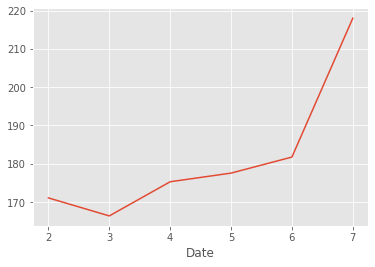

In [269]:
zel['text'].str.len().groupby(by=zel.index.month).mean().plot()

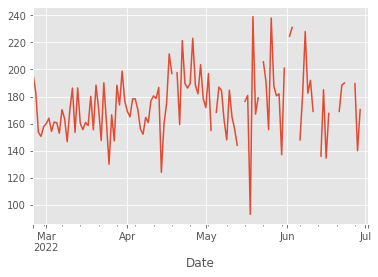

In [270]:
zel['text'].str.len().resample('D').mean().plot() 

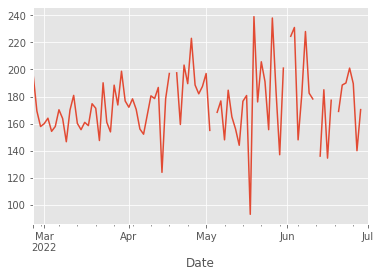

In [271]:
zel['text'].str.len().resample('B').mean().plot() 

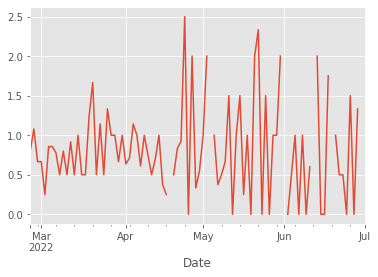

In [272]:
zel['positivity'].resample('B').mean().plot() 

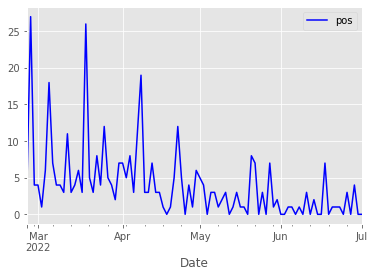

In [273]:
zel['positivity'].resample('B').sum().plot(color = 'b',label = 'pos').legend() 

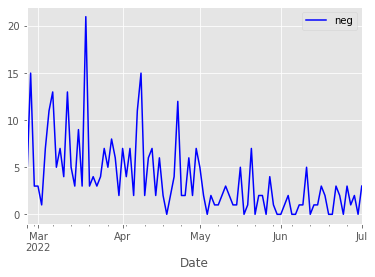

In [274]:
zel['negative'].resample('B').sum().plot(color = 'b',label = 'neg').legend() 

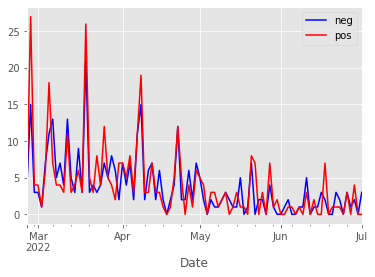

In [275]:
zel['negative'].resample('B').sum().plot(color = 'b',label = 'neg').legend() 
zel['positivity'].resample('B').sum().plot(color = 'r',label = 'pos').legend() 

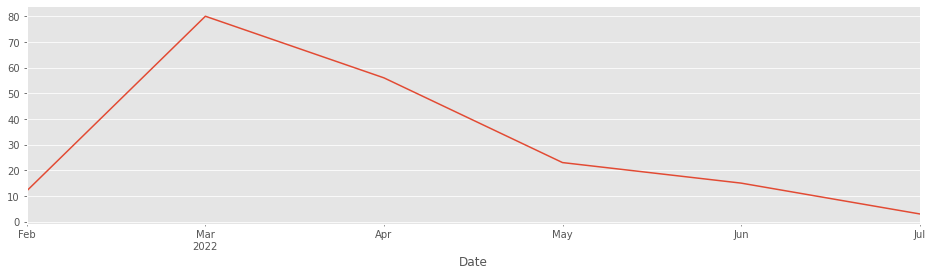

In [276]:
zel['anger'].resample('M').sum().plot(figsize=(16,4))

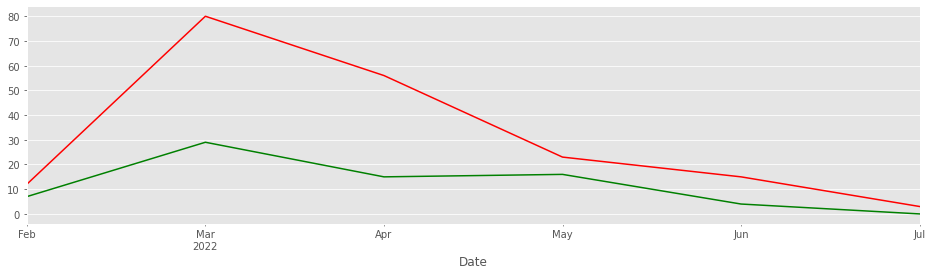

In [277]:
ax = zel['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
zel['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

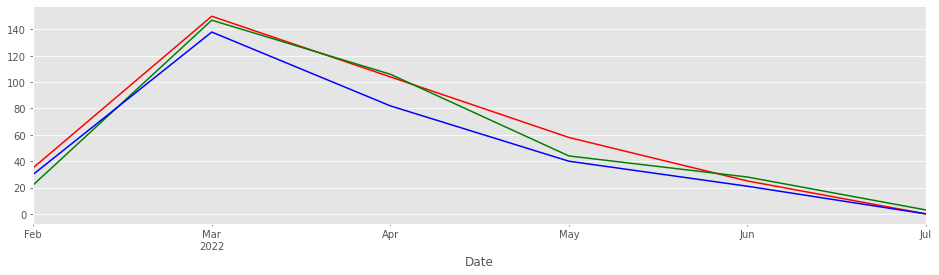

In [278]:
ax = zel['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
zel['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
zel['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

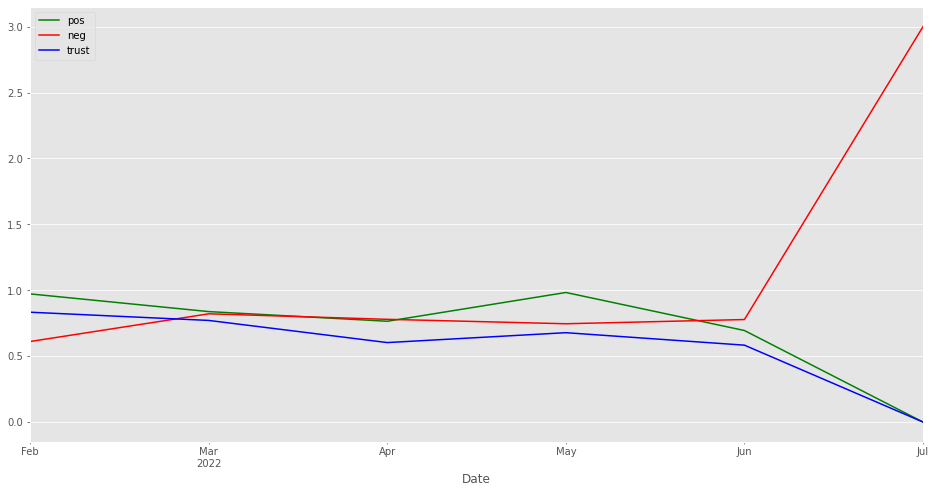

In [281]:
ax = zel['positivity'].resample('M').mean().plot(figsize=(16,8), 
                                                          color = 'g', label='pos')
zel['negative'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                   label = 'neg', color = 'r')
zel['trust'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

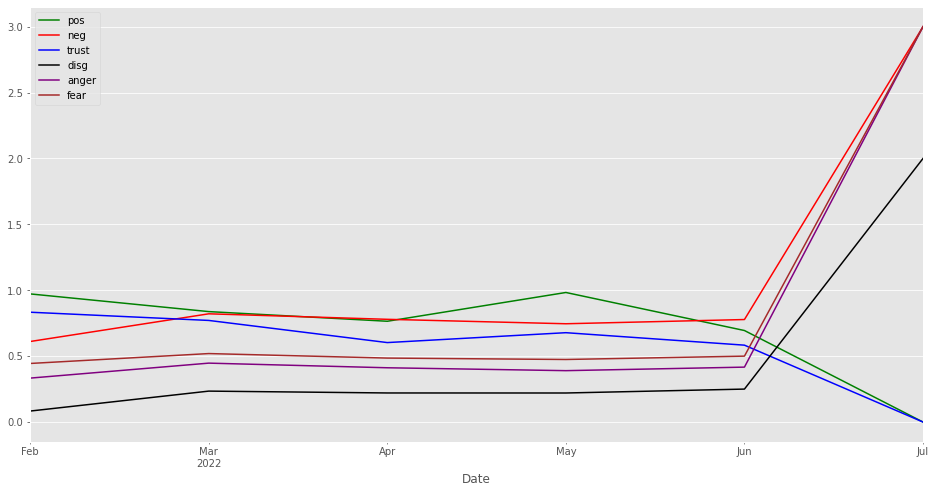

In [282]:
plt.style.use('ggplot')
ax = zel['positivity'].resample('M').mean().plot(figsize=(16,8), 
                                                          color = 'g', label='pos')
zel['negative'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                   label = 'neg', color = 'r')
zel['trust'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

zel['disgust'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                label = 'disg',color = 'black').legend() 

zel['anger'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                label = 'anger',color = 'purple').legend() 

zel['fear'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                label = 'fear',color = 'brown').legend()    

Text(0, 0.5, 'Years')

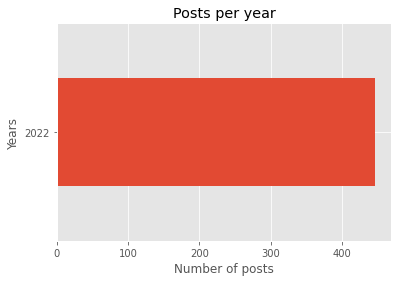

In [283]:
zel['text'].groupby(by=zel.index.year).count().plot(kind='barh')
plt.title("Posts per year")
plt.xlabel("Number of posts")
plt.ylabel("Years")

Text(0, 0.5, 'Hour of the day')

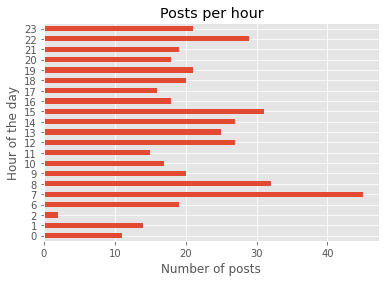

In [284]:
zel['text'].groupby(by=zel.index.hour).count().plot(kind='barh')
plt.title("Posts per hour")
plt.xlabel("Number of posts")
plt.ylabel("Hour of the day")

Text(0, 0.5, 'Months')

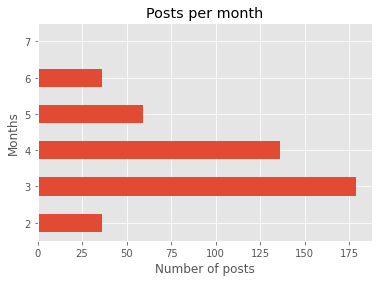

In [285]:
zel['text'].groupby(by=zel.index.month).count().plot(kind='barh')
plt.title("Posts per month")
plt.xlabel("Number of posts")
plt.ylabel("Months")

In [286]:
zel

Unnamed: 0  \
Date                              
2022-07-02 08:25:00           0   
2022-06-29 23:39:00           1   
2022-06-29 10:22:00           2   
2022-06-29 08:43:00           3   
2022-06-28 16:45:00           4   
...                         ...   
2022-02-24 22:53:00         442   
2022-02-24 22:12:00         443   
2022-02-24 18:06:00         444   
2022-02-24 15:21:00         445   
2022-02-24 14:41:00         446   

                                                                 Title  \
Date                                                                     
2022-07-02 08:25:00  Ζελένσκι: "Το ρωσικό πλήγμα στην Οδησσό ήταν σ...   
2022-06-29 23:39:00  Η Ουκρανία διακόπτει τις διπλωματικές σχέσεις ...   
2022-06-29 10:22:00  Σύνοδος ΝΑΤΟ: Τι πήρε ο "απομονωμένος" Ερντογά...   
2022-06-29 08:43:00  Ζελένσκι: "Ο ΟΗΕ να απομακρύνει τη Ρωσία από τ...   
2022-06-28 16:45:00  Κρεμλίνο: Θα σταματήσουμε την επίθεση όταν το ...   
...                                                                ...   
2022-02-24 22:53:00  Πόλεμος στην Ουκρανία: Η Ρωσία κατακτά, το Κίε...   
2022-02-24 22:12:00  Ουκρανία: Κάτοικοι στο Κίεβο - "Ελπίζουμε οι Ε...   
2022-02-24 18:06:00  Πόλεμος στην Ουκρανία - Ζελένσκι: "Δεν ξέρω γι...   
2022-02-24 15:21:00        Ζελένσκι, ένας κωμικός απέναντι στον Πούτιν   
2022-02-24 14:41:00  Ζελένσκι: Η Ρωσία επιτέθηκε στην Ουκρανία όπως...   

                                    created_at  \
Date                                             
2022-07-02 08:25:00      02 Ιουλίου 2022 08:25   
2022-06-29 23:39:00      29 Ιουνίου 2022 23:39   
2022-06-29 10:22:00      29 Ιουνίου 2022 10:22   
2022-06-29 08:43:00      29 Ιουνίου 2022 08:43   
2022-06-28 16:45:00      28 Ιουνίου 2022 16:45   
...                                        ...   
2022-02-24 22:53:00  24 Φεβρουαρίου 2022 22:53   
2022-02-24 22:12:00  24 Φεβρουαρίου 2022 22:12   
2022-02-24 18:06:00  24 Φεβρουαρίου 2022 18:06   
2022-02-24 15:21:00  24 Φεβρουαρίου 2022 15:21   
2022-02-24 14:41:00  24 Φεβρουαρίου 2022 14:41   

                                                                   URL  \
Date                                                                     
2022-07-02 08:25:00  https://www.news247.gr/kosmos/zelenski-to-rosi...   
2022-06-29 23:39:00  https://www.news247.gr/kosmos/i-oykrania-diako...   
2022-06-29 10:22:00  https://www.news247.gr/kosmos/synodos-nato-ti-...   
2022-06-29 08:43:00  https://www.news247.gr/kosmos/zelenski-o-oie-n...   
2022-06-28 16:45:00  https://www.news247.gr/kosmos/kremlino-tha-sta...   
...                                                                ...   
2022-02-24 22:53:00  https://www.news247.gr/kosmos/polemos-stin-oyk...   
2022-02-24 22:12:00  https://www.news247.gr/kosmos/oykrania-katoiko...   
2022-02-24 18:06:00  https://www.news247.gr/kosmos/polemos-stin-oyk...   
2022-02-24 15:21:00  https://www.news247.gr/sunday-edition/zelenski...   
2022-02-24 14:41:00  https://www.news247.gr/kosmos/zelenski-i-rosia...   

                                                                  text  \
Date                                                                     
2022-07-02 08:25:00  Ο Ζελένσκι διατείνεται ότι το ρωσικό πυραυλικό...   
2022-06-29 23:39:00  Η Ουκρανία προχώρησε σε διακοπή των διπλωματικ...   
2022-06-29 10:22:00  Το "πράσινο φως" της Τουρκίας δίνει "ισχυρή ώθ...   
2022-06-29 08:43:00  Απευθυνόμενος στο Συμβούλιο Ασφαλείας του ΟΗΕ,...   
2022-06-28 16:45:00  Ο εκπρόσωπος του Βλαντίμιρ Πούτιν τόνισε πως η...   
...                                                                ...   
2022-02-24 22:53:00  Η Ρωσία επελαύνει στα εδάφη της Ουκρανίας, έχο...   
2022-02-24 22:12:00  Τις ανησυχίες τους και τους φόβους τους μετά τ...   
2022-02-24 18:06:00  Τους φόβους του για το μέλλον της Ουκρανίας, α...   
2022-02-24 15:21:00  Το 2019 ο Βολοντίμιρ Ζελένσκι έκανε γυρίσματα ...   
2022-02-24 14:41:00  Ο Ουκρανός πρόεδρος συνέκρινε την ρωσική εισβο...   

                         

# Zel - Putin

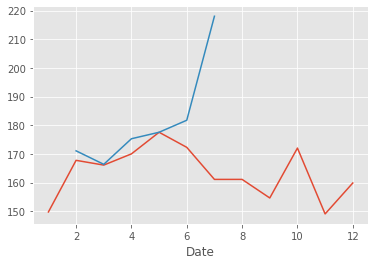

In [287]:
putin_df['text'].str.len().groupby(by=putin_df.index.month).mean().plot()
zel['text'].str.len().groupby(by=zel.index.month).mean().plot()

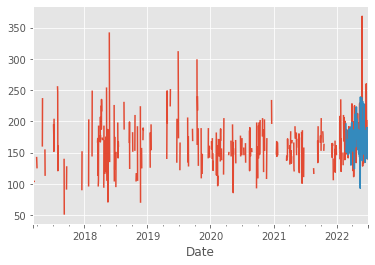

In [288]:
putin_df['text'].str.len().resample('D').mean().plot() 
zel['text'].str.len().resample('D').mean().plot() 

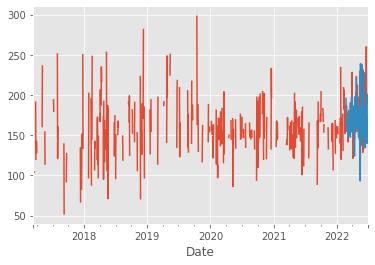

In [289]:
putin_df['text'].str.len().resample('B').mean().plot() 
zel['text'].str.len().resample('B').mean().plot() 

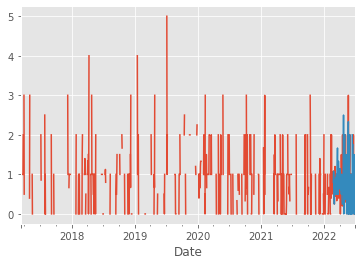

In [290]:
putin_df['positivity'].resample('B').mean().plot() 
zel['positivity'].resample('B').mean().plot() 

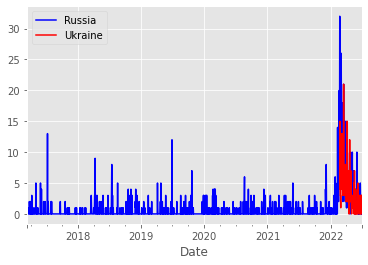

In [291]:
putin_df['negative'].resample('B').sum().plot(color = 'b',label = 'Russia').legend() 
zel['negative'].resample('B').sum().plot(color = 'r',label = 'Ukraine').legend() 

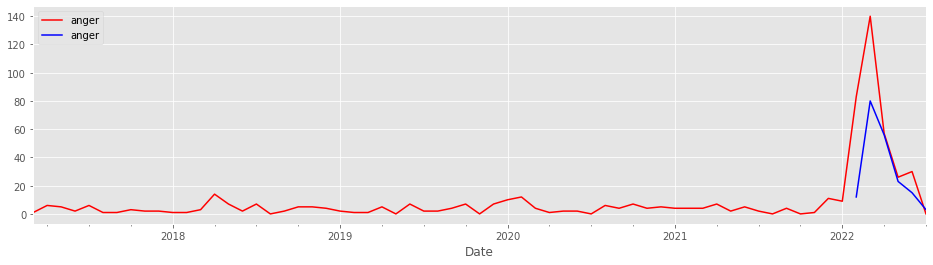

In [292]:
putin_df['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red').legend() 
zel['anger'].resample('M').sum().plot(figsize=(16,4), color = 'blue').legend()

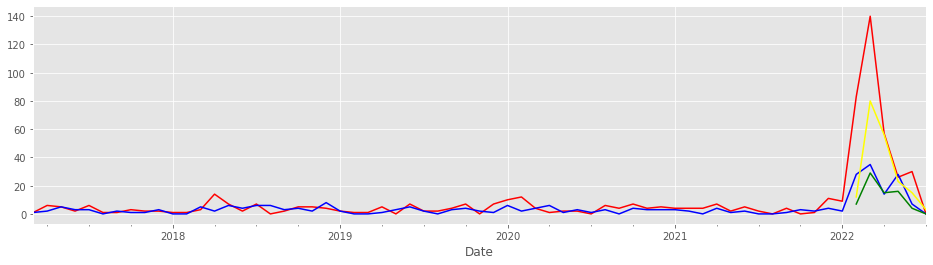

In [293]:
ax = putin_df['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
putin_df['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')
ax = zel['anger'].resample('M').sum().plot(figsize=(16,4), color = 'yellow')
zel['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

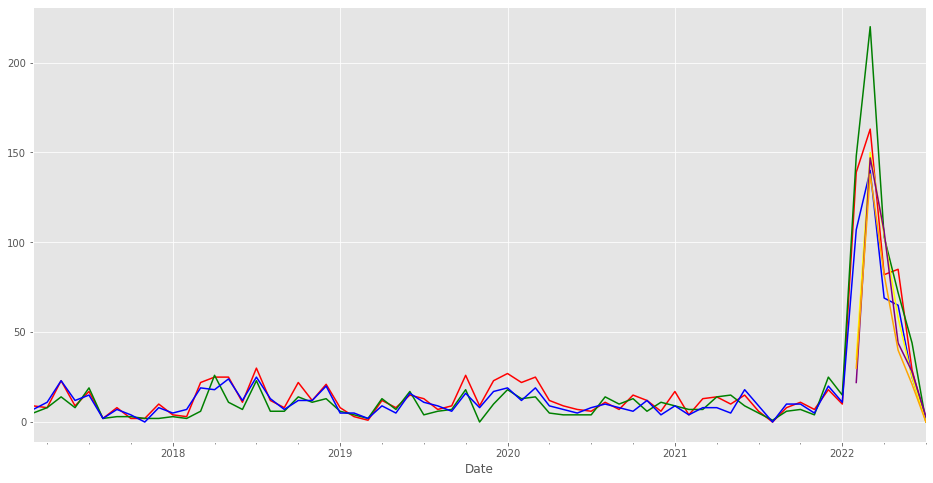

In [294]:
ax = putin_df['positivity'].resample('M').sum().plot(figsize=(16,8), color = 'red')
putin_df['negative'].resample('M').sum().plot(figsize=(16,8), ax = ax, color = 'green')
putin_df['trust'].resample('M').sum().plot(figsize=(16,8), ax = ax, color = 'blue')
ax = zel['positivity'].resample('M').sum().plot(figsize=(16,8), color = 'yellow')
zel['negative'].resample('M').sum().plot(figsize=(16,84), ax = ax, color = 'purple')
zel['trust'].resample('M').sum().plot(figsize=(16,8), ax = ax, color = 'orange')

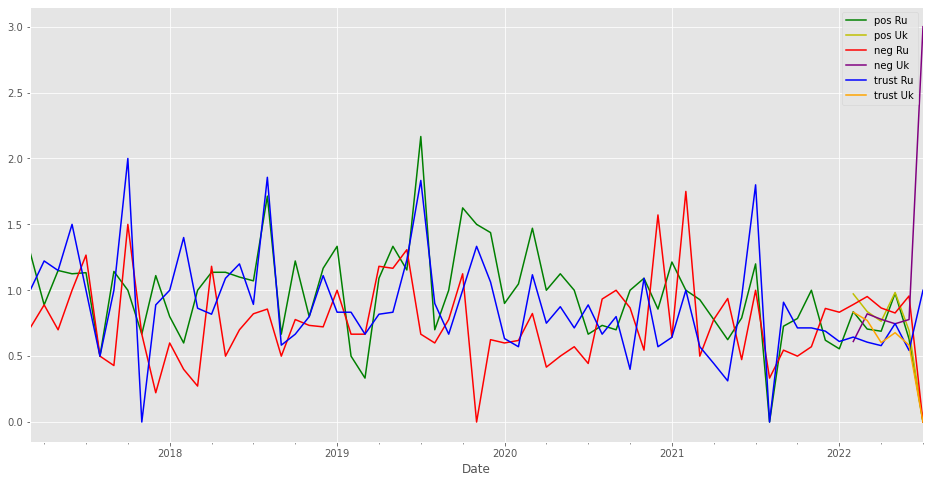

In [295]:
ax = putin_df['positivity'].resample('M').mean().plot(figsize=(16,8), 
                                                          color = 'g', label='pos Ru')
ax = zel['positivity'].resample('M').mean().plot(figsize=(16,8), 
                                                          color = 'y', label='pos Uk')
putin_df['negative'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                   label = 'neg Ru', color = 'r')
zel['negative'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                   label = 'neg Uk', color = 'purple')
putin_df['trust'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                label = 'trust Ru',color = 'blue').legend()
zel['trust'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                label = 'trust Uk',color = 'orange').legend()

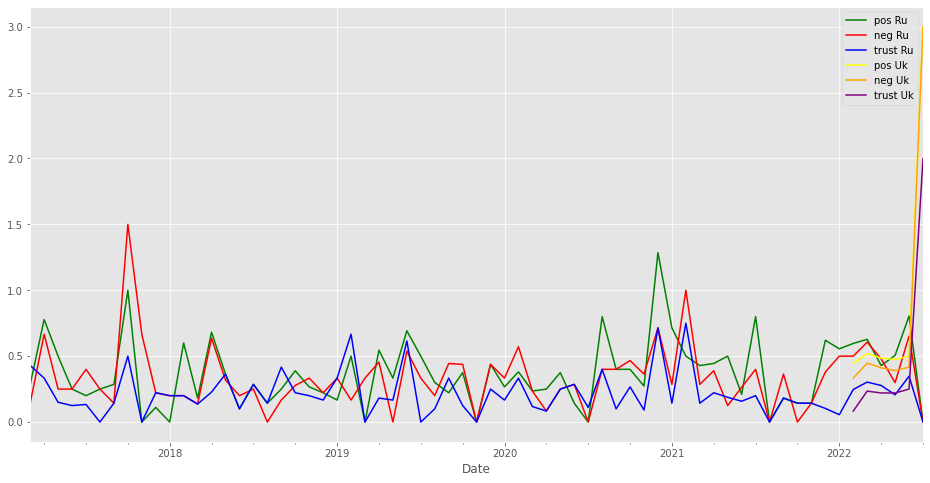

In [296]:
plt.style.use('ggplot')
ax = putin_df['fear'].resample('M').mean().plot(figsize=(16,8), 
                                                          color = 'g', label='pos Ru')
putin_df['anger'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                   label = 'neg Ru', color = 'r')
putin_df['disgust'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                label = 'trust Ru',color = 'blue').legend()    
zel['fear'].resample('M').mean().plot(figsize=(16,8), 
                                                          color = 'yellow', label='pos Uk')
zel['anger'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                   label = 'neg Uk', color = 'orange')
zel['disgust'].resample('M').mean().plot(figsize=(16,8), ax = ax, 
                                                label = 'trust Uk',color = 'purple').legend()                                                